# NOTEBOOK TRABAJO FIN DE MASTER - HOUSING PRICES

## Introducci√≥n general y contexto del proyecto

Este notebook documenta el proceso de desarrollo de un **modelo de regresi√≥n** para la predicci√≥n de **precios de venta de viviendas**. El objetivo principal es aplicar un **flujo de trabajo integral de ciencia de datos**, desde el an√°lisis exploratorio y la ingenier√≠a de caracter√≠sticas hasta el entrenamiento y la evaluaci√≥n rigurosa de m√∫ltiples algoritmos de *machine learning*.

---

## Conjunto de datos

Para este estudio se ha seleccionado el **Ames Housing dataset**, compilado por el profesor **Dean De Cock**. Este conjunto de datos es un referente cl√°sico en la comunidad de ciencia de datos para problemas de regresi√≥n y es la base de la popular competici√≥n de Kaggle:

> **Competici√≥n:** [House Prices ‚Äì Advanced Regression Techniques](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview/description)

**Contexto y caracter√≠sticas:**

- Ventas de viviendas residenciales en **Ames, Iowa (2006‚Äì2010)**.  
- **79 variables explicativas** que describen m√∫ltiples aspectos de las propiedades.  
- Mezcla de **variables num√©ricas y categ√≥ricas** con presencia de **valores nulos**.  

**√Åmbitos cubiertos por las variables:**

- **F√≠sicas:** √°rea, n√∫mero de habitaciones, calidad de materiales, etc.  
- **Temporales:** a√±o de construcci√≥n, a√±o de venta.  
- **Ubicaci√≥n:** vecindario (*Neighborhood*).

> **Nota:** La riqueza y complejidad del dataset lo convierten en un caso id√≥neo para aplicar y validar las t√©cnicas abordadas en este **Trabajo Fin de M√°ster**.


# Fase 1: An√°lisis Exploratorio de Datos (EDA)

El **An√°lisis Exploratorio de Datos (EDA)** es la etapa inicial y fundamental de este proyecto. Su objetivo es realizar una investigaci√≥n sistem√°tica del conjunto de datos para **descubrir patrones**, **identificar anomal√≠as**, **verificar supuestos** y **formular hip√≥tesis**.

> Los hallazgos obtenidos en esta fase son cruciales, ya que informar√°n y justificar√°n todas las decisiones tomadas en las fases posteriores de **preprocesamiento**, **ingenier√≠a de caracter√≠sticas** y **modelado**.


### 1.1. Carga e inspecci√≥n inicial de datos

El primer paso consiste en cargar el dataset y realizar una inspecci√≥n b√°sica para verificar su correcta importaci√≥n y obtener una visi√≥n general de su estructura.

- `df.head()`: visualiza las primeras 5 filas, permitiendo una comprobaci√≥n r√°pida de las columnas y del formato de los datos.
- `df.info()`: proporciona un resumen t√©cnico del *DataFrame*, incluyendo el n√∫mero de entradas (**1460**), el n√∫mero de columnas (**81**), el tipo de dato de cada columna y el recuento de valores no nulos.


In [86]:
import pandas as pd

# Definir la ruta relativa al archivo de datos
# Desde la carpeta /notebooks, subimos un nivel ('..') y luego bajamos a /data/raw/
ruta_archivo = '../data/raw/train.csv'

# Cargar el dataset en un DataFrame de pandas
df = pd.read_csv(ruta_archivo)

In [87]:
# Mostrar las primeras 5 filas para una inspecci√≥n visual r√°pida
print("--- Primeras 5 filas del dataset ---")
display(df.head())

# Obtener la informaci√≥n b√°sica del DataFrame
print("\n--- Informaci√≥n b√°sica del DataFrame ---")
df.info()

--- Primeras 5 filas del dataset ---


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]


--- Informaci√≥n b√°sica del DataFrame ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQ

**Conclusi√≥n inicial:** El dataset se ha cargado correctamente.  
La inspecci√≥n revela una mezcla de tipos de datos (`int64`, `float64`, `object`) y confirma la presencia de **valores nulos** en varias columnas, lo que requerir√° una investigaci√≥n m√°s profunda.


## 1.2. An√°lisis univariante: la variable objetivo (*SalePrice*)

El an√°lisis comienza centr√°ndose en la variable objetivo, **SalePrice**, para comprender su distribuci√≥n y caracter√≠sticas estad√≠sticas.
#### 1.2.1. An√°lisis estad√≠stico
Se calculan las **estad√≠sticas descriptivas** clave para cuantificar la distribuci√≥n del precio de venta.


In [90]:
# 1. Estad√≠sticas descriptivas b√°sicas
sale_price_stats = df['SalePrice'].describe()
print("--- Estad√≠sticas Descriptivas de SalePrice ---")
print(sale_price_stats)

# 2. Asimetr√≠a y Curtosis
skewness = df['SalePrice'].skew()
kurtosis = df['SalePrice'].kurt()

print(f"\nAsimetr√≠a (Skewness): {skewness:.2f}")
print(f"Curtosis (Kurtosis): {kurtosis:.2f}")

--- Estad√≠sticas Descriptivas de SalePrice ---
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Asimetr√≠a (Skewness): 1.88
Curtosis (Kurtosis): 6.54


### Conclusi√≥n del An√°lisis Estad√≠stico

El an√°lisis descriptivo de `SalePrice` revela informaci√≥n clave sobre su distribuci√≥n. El precio medio de una vivienda es de **\$180,921**, mientras que la mediana se sit√∫a en **\$163,000**. El hecho de que la media sea notablemente superior a la mediana es un claro indicador de una **asimetr√≠a positiva**.

Esta observaci√≥n se confirma con un valor de **Asimetr√≠a (Skewness) de 1.88**, lo que demuestra que la distribuci√≥n tiene una larga cola a la derecha, causada por un n√∫mero de viviendas con precios excepcionalmente altos. Adicionalmente, una **Curtosis de 6.54** (muy superior al valor de 3 para una distribuci√≥n normal) indica que la distribuci√≥n es m√°s "puntiaguda" y posee colas m√°s pesadas, reforzando la evidencia de la presencia de valores at√≠picos (outliers).

## 1.2.2. An√°lisis Gr√°fico de SalePrice

Se utilizan visualizaciones para confirmar los hallazgos estad√≠sticos.



Guardado: C:\Users\Usuario\python_ucm\TFM-House-Prices-Prediction\reports\figures\EDA_saleprice_hist_kde.png


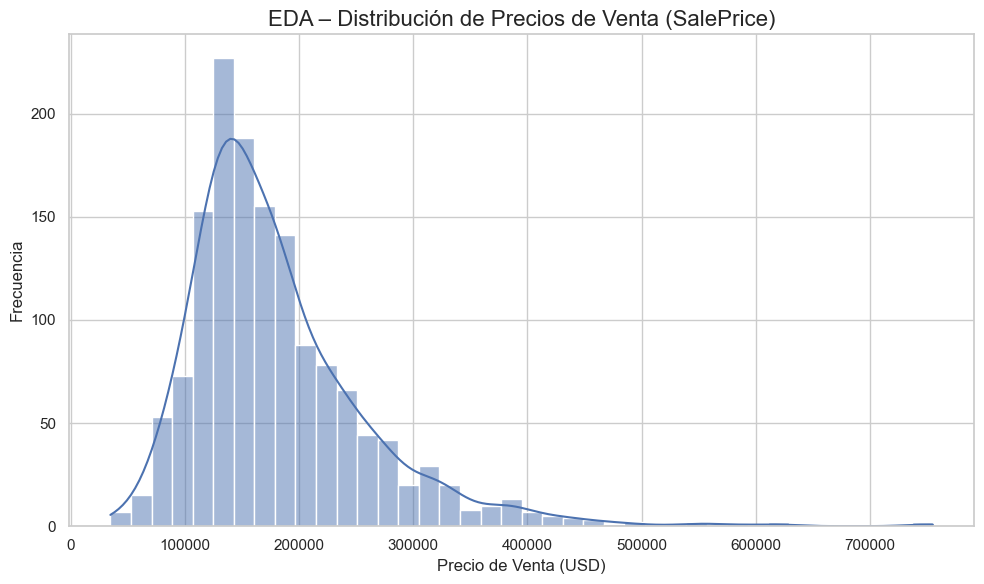

In [93]:
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Carpeta de figuras del proyecto
FIG_DIR = '../reports/figures'
os.makedirs(FIG_DIR, exist_ok=True)

# Configuraci√≥n de estilo para los gr√°ficos
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))

# Crear el histograma y el gr√°fico de densidad
sns.histplot(df['SalePrice'], kde=True, bins=40)

# A√±adir t√≠tulos y etiquetas para mayor claridad
plt.title('EDA ‚Äì Distribuci√≥n de Precios de Venta (SalePrice)', fontsize=16)
plt.xlabel('Precio de Venta (USD)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Guardar el gr√°fico en la ruta de figuras
out_path = os.path.join(FIG_DIR, 'EDA_saleprice_hist_kde.png')
plt.tight_layout()
plt.savefig(out_path, dpi=130, bbox_inches='tight')
print('Guardado:', os.path.abspath(out_path))

# Mostrar el gr√°fico
plt.show()
plt.close()


Guardado: C:\Users\Usuario\python_ucm\TFM-House-Prices-Prediction\reports\figures\EDA_saleprice_boxplot.png


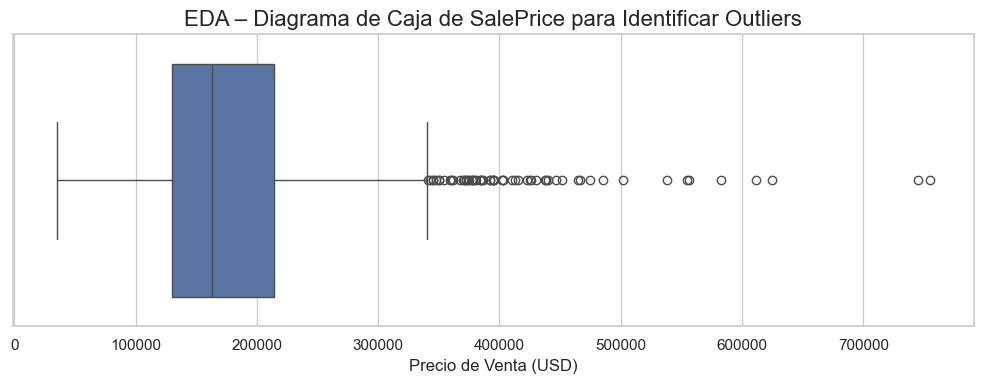

In [94]:
# Configuraci√≥n de estilo para los gr√°ficos
plt.figure(figsize=(10, 4))

# Crear el box plot
sns.boxplot(x=df['SalePrice'])

# A√±adir t√≠tulos y etiquetas
plt.title('EDA ‚Äì Diagrama de Caja de SalePrice para Identificar Outliers', fontsize=16)
plt.xlabel('Precio de Venta (USD)', fontsize=12)

# uardar el gr√°fico en la ruta de figuras
out_path = os.path.join(FIG_DIR, 'EDA_saleprice_boxplot.png')
plt.tight_layout()
plt.savefig(out_path, dpi=130, bbox_inches='tight')
print('Guardado:', os.path.abspath(out_path))

# Mostrar el gr√°fico
plt.show()
plt.close()

### Conclusi√≥n del An√°lisis Gr√°fico
Las visualizaciones de la variable `SalePrice` confirman de manera inequ√≠voca los hallazgos del an√°lisis estad√≠stico.

El **histograma** muestra claramente una distribuci√≥n con **asimetr√≠a positiva**. La mayor concentraci√≥n de viviendas se encuentra en el rango de precios m√°s bajos (aproximadamente entre **\$100,000** y **\$200,000**), con una frecuencia que disminuye progresivamente a medida que los precios aumentan, formando una "cola" larga hacia la derecha.

El **diagrama de caja (box plot)** complementa esta visi√≥n de forma contundente. La caja, que representa el 50% central de los datos, se sit√∫a en la parte baja del rango total de precios. M√°s importante a√∫n, se observa una cantidad considerable de puntos individuales a la derecha de los bigotes, lo que representa visualmente los valores at√≠picos (**outliers**): viviendas con un precio de venta muy superior al de la gran mayor√≠a.

En conjunto, ambos gr√°ficos nos llevan a la misma conclusi√≥n: estamos trabajando con una variable objetivo que **no es normal** y que presenta **valores extremos** que deber√°n ser gestionados en fases posteriores del proyecto.

## 1.3. An√°lisis Bivariante y Multivariante

El siguiente paso es investigar las relaciones entre las variables predictoras y SalePrice.

## 1.3.1. An√°lisis de Correlaci√≥n: Descubriendo Relaciones Clave

Ahora que comprendemos nuestra variable objetivo (`SalePrice`), el siguiente paso es identificar qu√© otras variables del dataset tienen una relaci√≥n lineal fuerte con ella. No todas las 80 variables influir√°n de la misma manera en el precio de una casa. Descubrir las m√°s influyentes nos permitir√° centrar nuestros futuros an√°lisis y esfuerzos de modelado.

### Objetivo:
Identificar las variables num√©ricas que est√°n m√°s fuertemente correlacionadas (positiva o negativamente) con `SalePrice`.

### Herramienta:
Para ello, vamos a calcular la **matriz de correlaci√≥n** de todas las variables num√©ricas. Luego, visualizaremos esta matriz usando un **mapa de calor (heatmap)**. El mapa de calor es una herramienta gr√°fica excepcional que utiliza colores para representar la fuerza de la correlaci√≥n, permiti√©ndonos detectar patrones de un solo vistazo.

Guardado: C:\Users\Usuario\python_ucm\TFM-House-Prices-Prediction\reports\figures\EDA_heatmap_correlaciones_numericas.png


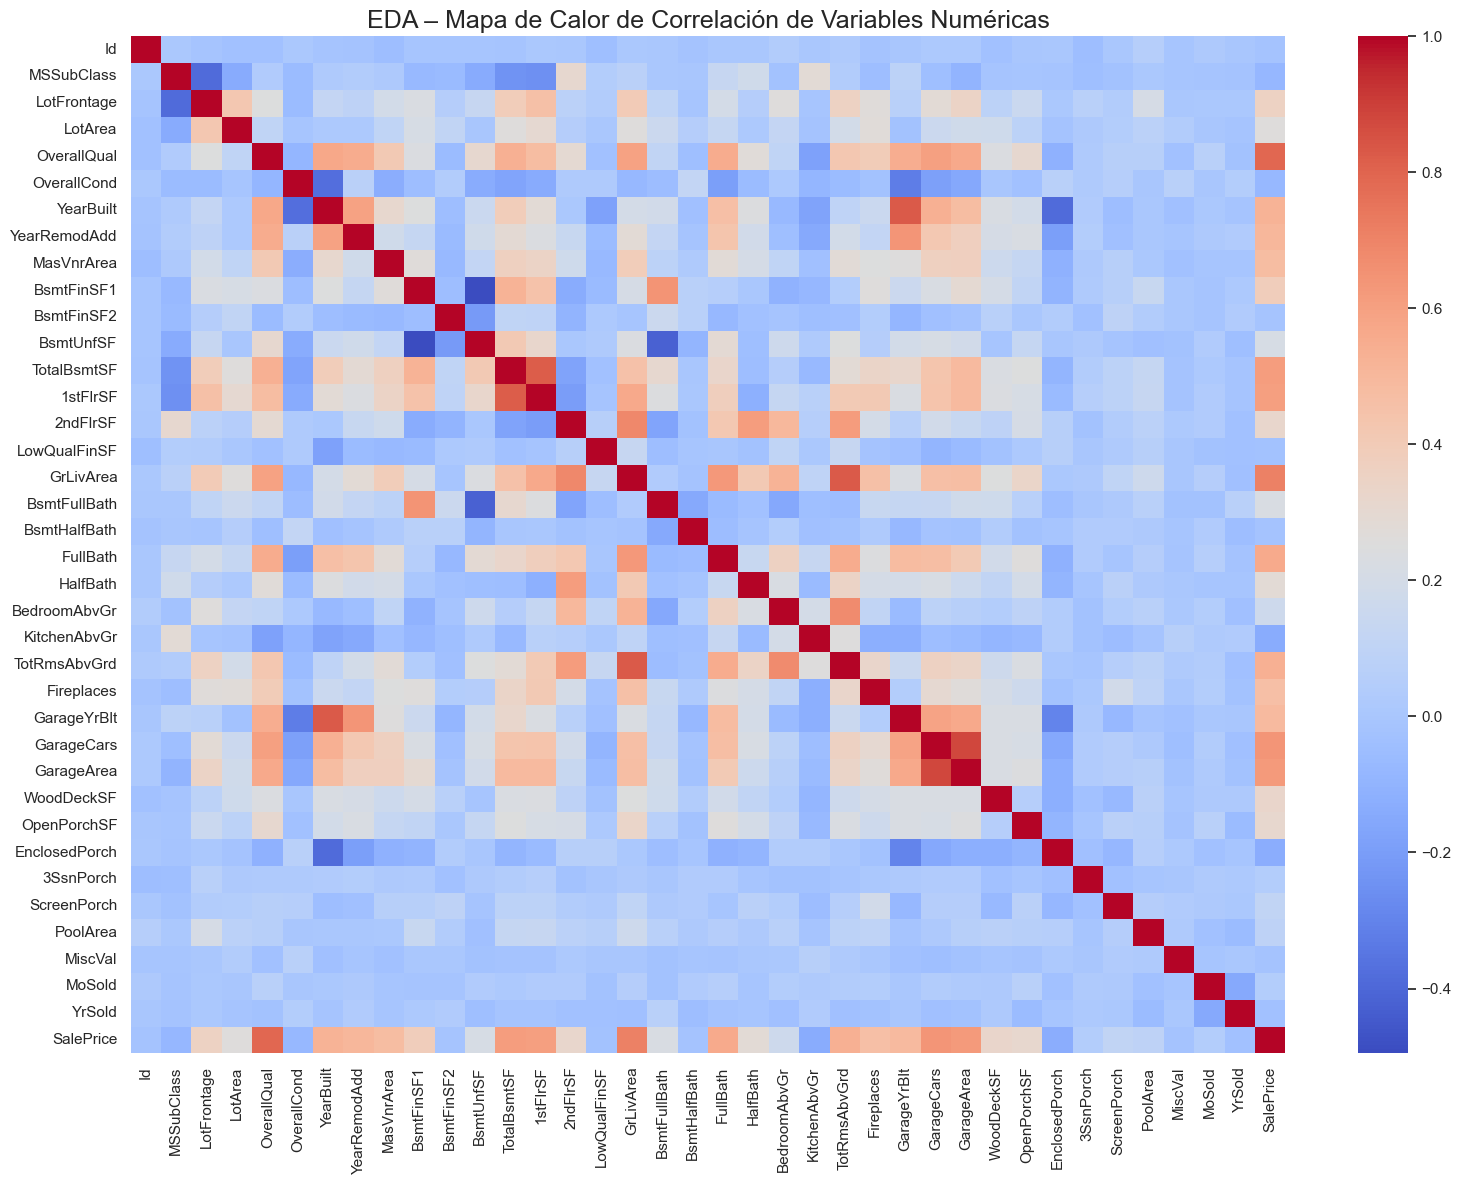

In [98]:
import numpy as np

# 1. Seleccionar solo las columnas num√©ricas del DataFrame
numeric_df = df.select_dtypes(include=np.number)

# 2. Calcular la matriz de correlaci√≥n sobre el DataFrame num√©rico
correlation_matrix = numeric_df.corr()

# 3. Configurar el tama√±o de la figura para el mapa de calor
plt.figure(figsize=(16, 12))

# 4. Generar el mapa de calor
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)

# 5. A√±adir un t√≠tulo
plt.title('EDA ‚Äì Mapa de Calor de Correlaci√≥n de Variables Num√©ricas', fontsize=18)

# 6. Mostrar el gr√°fico (guardamos primero)
out_path = os.path.join(FIG_DIR, 'EDA_heatmap_correlaciones_numericas.png')
plt.tight_layout()
plt.savefig(out_path, dpi=130, bbox_inches='tight')
print('Guardado:', os.path.abspath(out_path))

plt.show()
plt.close()


## An√°lisis del Mapa de Calor y Principales Hallazgos

Este mapa de calor nos proporciona una visi√≥n panor√°mica de las relaciones lineales entre todas las variables num√©ricas. Nuestro foco principal est√° en la √∫ltima fila (o columna), `SalePrice`, para identificar qu√© variables tienen el mayor impacto en el precio de venta.

Los hallazgos clave son:

### Fuertes Correlaciones Positivas con `SalePrice`:
Observamos varios cuadrados de color rojo intenso en la fila de `SalePrice`, lo que indica una fuerte correlaci√≥n positiva. Las variables m√°s importantes son:
* **`OverallQual` (Calidad General):** Es, con diferencia, la variable con la correlaci√≥n positiva m√°s fuerte. A mayor calidad de los materiales y acabados, mayor es el precio de venta.
* **`GrLivArea` (√Årea habitable sobre rasante):** Cuantos m√°s metros cuadrados habitables tiene la casa, m√°s cara es. Una relaci√≥n muy intuitiva.
* **`GarageCars` y `GarageArea` (Capacidad y √Årea del Garaje):** Ambas est√°n fuertemente correlacionadas con el precio. Casas con garajes m√°s grandes y para m√°s coches tienden a ser m√°s caras.
* **`TotalBsmtSF` (√Årea Total del S√≥tano) y `1stFlrSF` (√Årea del Primer Piso):** El tama√±o de la planta baja y del s√≥tano tambi√©n son predictores muy importantes del precio.

### Identificaci√≥n de Multicolinealidad:
El mapa tambi√©n revela fuertes correlaciones entre las propias variables predictoras, un fen√≥meno llamado **multicolinealidad**. Esto es importante tenerlo en cuenta para el futuro modelado. Los ejemplos m√°s claros son:
* **`GarageCars` y `GarageArea`:** El cuadrado donde se cruzan es de un rojo muy intenso. Es l√≥gico: un garaje para m√°s coches suele ser m√°s grande. Para un modelo, usar ambas variables podr√≠a ser redundante.
* **`TotalBsmtSF` y `1stFlrSF`:** Tambi√©n est√°n muy correlacionadas.
* **`GrLivArea` y `TotRmsAbvGrd` (Total de habitaciones):** M√°s habitaciones suelen implicar m√°s √°rea habitable.

### Variables con Poca Influencia:
Muchas variables tienen colores muy cercanos al blanco, lo que indica una correlaci√≥n cercana a cero (ej. `MSSubClass`, `MoSold`). Estas, a priori, parecen tener poca o ninguna relaci√≥n lineal con el precio de venta.

## 1.3.2. An√°lisis Visual Bivariante de las Variables de Mayor Impacto

### Objetivos y Metodolog√≠a

Tras la identificaci√≥n de las variables num√©ricas con mayor coeficiente de correlaci√≥n de Pearson respecto a `SalePrice` mediante el mapa de calor, se procede a una inspecci√≥n visual detallada de dichas relaciones. El objetivo de esta fase es validar y caracterizar la naturaleza de estas correlaciones, yendo m√°s all√° de la mera cuantificaci√≥n lineal. Un an√°lisis gr√°fico permite identificar patrones no lineales, heterocedasticidad y la presencia de posibles valores at√≠picos (**outliers**) que no son evidentes √∫nicamente a trav√©s del coeficiente de correlaci√≥n.

Para este fin, se han seleccionado las dos variables con la correlaci√≥n positiva m√°s elevada:

* `OverallQual`: Una variable de tipo ordinal que representa la calidad general de la vivienda.
* `GrLivArea`: Una variable continua que indica el √°rea habitable sobre el nivel del suelo.

La metodolog√≠a de visualizaci√≥n se ha adaptado a la naturaleza de cada variable:

* Para la relaci√≥n `SalePrice` vs. `OverallQual`, se emplear√° un **diagrama de cajas (box plot)**. Esta t√©cnica es id√≥nea para visualizar la distribuci√≥n de una variable continua (`SalePrice`) a trav√©s de las diferentes categor√≠as de una variable ordinal (`OverallQual`), permitiendo comparar medianas, rangos intercuart√≠licos y la dispersi√≥n de precios para cada nivel de calidad.

* Para la relaci√≥n `SalePrice` vs. `GrLivArea`, se utilizar√° un **diagrama de dispersi√≥n (scatter plot)**, complementado con una l√≠nea de regresi√≥n. Este gr√°fico es el est√°ndar para examinar la relaci√≥n entre dos variables continuas, permitiendo evaluar la linealidad de la tendencia y la dispersi√≥n de los datos alrededor de la misma.

Guardado: C:\Users\Usuario\python_ucm\TFM-House-Prices-Prediction\reports\figures\EDA_calidad_vs_precio.png


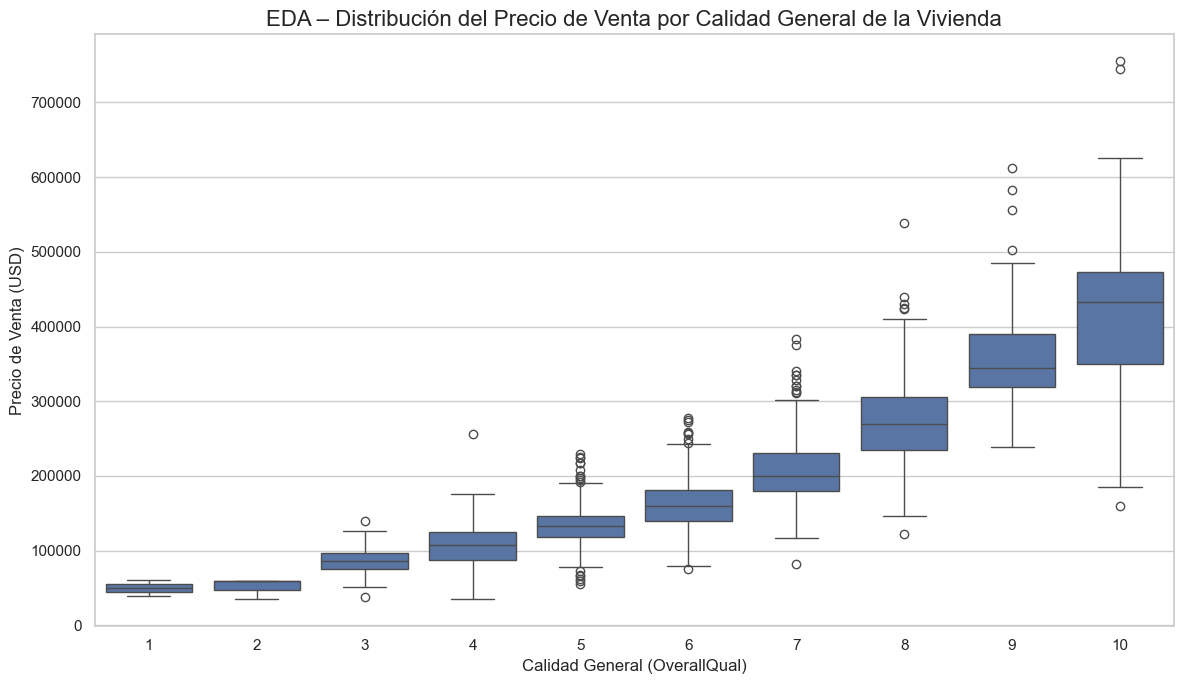

‚úÖ Guardado: C:\Users\Usuario\python_ucm\TFM-House-Prices-Prediction\reports\figures\EDA_area_vs_precio.png


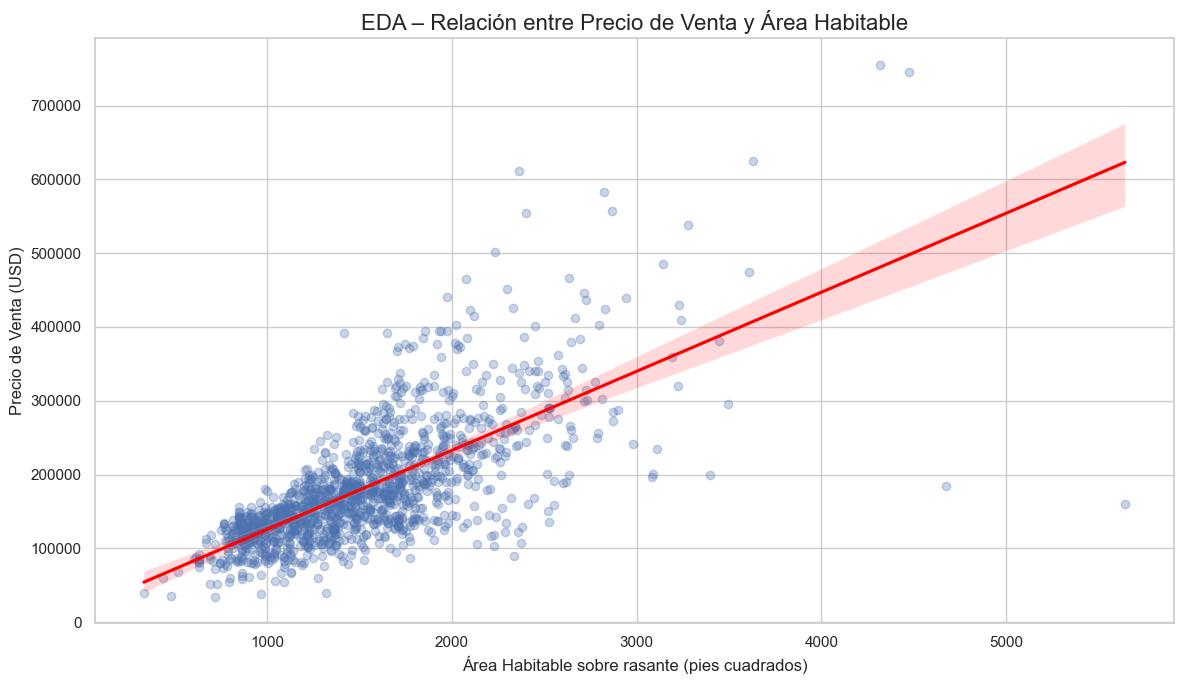

In [101]:
# Configuraci√≥n del estilo visual para los gr√°ficos
sns.set_theme(style="whitegrid")

# Gr√°fico 1: Relaci√≥n SalePrice vs. OverallQual (Diagrama de Cajas)

plt.figure(figsize=(12, 7))
sns.boxplot(x='OverallQual', y='SalePrice', data=df)

plt.title('EDA ‚Äì Distribuci√≥n del Precio de Venta por Calidad General de la Vivienda', fontsize=16)
plt.xlabel('Calidad General (OverallQual)', fontsize=12)
plt.ylabel('Precio de Venta (USD)', fontsize=12)

# Guardar en FIG_DIR
out_path = os.path.join(FIG_DIR, 'EDA_calidad_vs_precio.png')
plt.tight_layout()
plt.savefig(out_path, dpi=300, bbox_inches='tight')
print('Guardado:', os.path.abspath(out_path))
plt.show()
plt.close()


# Gr√°fico 2: Relaci√≥n SalePrice vs. GrLivArea (Diagrama de Dispersi√≥n) 

plt.figure(figsize=(12, 7))
sns.regplot(x='GrLivArea', y='SalePrice', data=df, 
            scatter_kws={'alpha':0.3}, # Ajuste de transparencia para visualizar densidad
            line_kws={'color':'red'})   # Superposici√≥n de la l√≠nea de regresi√≥n lineal

plt.title('EDA ‚Äì Relaci√≥n entre Precio de Venta y √Årea Habitable', fontsize=16)
plt.xlabel('√Årea Habitable sobre rasante (pies cuadrados)', fontsize=12)
plt.ylabel('Precio de Venta (USD)', fontsize=12)

# Guardar en FIG_DIR
out_path = os.path.join(FIG_DIR, 'EDA_area_vs_precio.png')
plt.tight_layout()
plt.savefig(out_path, dpi=300, bbox_inches='tight')
print('‚úÖ Guardado:', os.path.abspath(out_path))
plt.show()
plt.close()

## An√°lisis de Resultados Visuales

La inspecci√≥n de los gr√°ficos generados permite confirmar y profundizar en la comprensi√≥n de las relaciones entre las variables predictoras m√°s correlacionadas y el precio de venta.

### Relaci√≥n entre `SalePrice` y `OverallQual`

El diagrama de cajas revela una **relaci√≥n monot√≥nica positiva** muy fuerte entre la calidad general de la vivienda y su precio de venta. Se observa que a medida que la categor√≠a de `OverallQual` aumenta, la mediana del `SalePrice`, representada by la l√≠nea central de cada caja, se incrementa de forma consistente.

Adicionalmente, el gr√°fico evidencia un patr√≥n de **heterocedasticidad**: la dispersi√≥n de los precios de venta (representada por la altura de las cajas y la longitud de los bigotes) aumenta a medida que se incrementa la calidad. Esto sugiere que, si bien las viviendas de baja calidad tienen precios m√°s homog√©neos, existe una variabilidad de precios considerablemente mayor entre las viviendas de alta calidad.

### Relaci√≥n entre `SalePrice` y `GrLivArea`

El diagrama de dispersi√≥n confirma la existencia de una **relaci√≥n lineal positiva y robusta** entre el √°rea habitable y el precio de venta. La l√≠nea de regresi√≥n superpuesta muestra una clara pendiente ascendente, indicando que a mayor √°rea, mayor es el precio esperado.

No obstante, se identifican dos aspectos cruciales:

* **Heterocedasticidad**: Al igual que en el caso anterior, la dispersi√≥n de los puntos aumenta a medida que `GrLivArea` se incrementa. Los precios para viviendas de menor tama√±o se encuentran m√°s concentrados, mientras que para viviendas de mayor tama√±o la variabilidad de precios es mucho m√°s pronunciada.
* **Posibles Outliers Influyentes**: Se destacan dos observaciones en la esquina inferior derecha del gr√°fico. Estos puntos corresponden a viviendas con un √°rea habitable (`GrLivArea`) excepcionalmente grande (> 4000 pies cuadrados) pero con un precio de venta comparativamente bajo. Estos datos at√≠picos son de especial inter√©s, ya que podr√≠an ejercer una influencia desproporcionada en el ajuste de un modelo de regresi√≥n lineal y suponen una desviaci√≥n del patr√≥n general.

### Conclusi√≥n Parcial

El an√°lisis bivariante visual no solo valida la alta correlaci√≥n de `OverallQual` y `GrLivArea` con `SalePrice`, sino que tambi√©n revela complejidades importantes en estas relaciones, como la **heterocedasticidad** y la presencia de **outliers significativos**. Estos hallazgos ser√°n fundamentales durante la fase de pre-procesamiento de datos y la selecci√≥n del modelo, ya que sugieren que un modelo lineal simple podr√≠a no capturar adecuadamente toda la estructura de los datos sin realizar transformaciones o un tratamiento espec√≠fico de los valores at√≠picos.

## 1.4. An√°lisis de Variables Categ√≥ricas: Influencia del Vecindario

### Objetivos y Metodolog√≠a

Habiendo caracterizado las relaciones de las principales variables num√©ricas con `SalePrice`, el an√°lisis exploratorio se extiende ahora a las variables categ√≥ricas. El objetivo es determinar c√≥mo la pertenencia a una categor√≠a espec√≠fica influye en la distribuci√≥n del precio de venta. La variable `Neighborhood` (vecindario) ha sido seleccionada para este an√°lisis inicial, dada su alta relevancia te√≥rica en la valoraci√≥n de bienes inmuebles.

La metodolog√≠a consistir√° en visualizar la distribuci√≥n de `SalePrice` para cada una de las categor√≠as de `Neighborhood` mediante un **diagrama de cajas (box plot)**. Para facilitar la interpretaci√≥n y la comparaci√≥n visual, los vecindarios se ordenar√°n en el eje horizontal seg√∫n su mediana de precio de venta, de menor a mayor. Esta ordenaci√≥n permitir√° identificar de forma clara y sistem√°tica qu√© vecindarios se asocian a los precios m√°s bajos, medios y altos, as√≠ como comparar la dispersi√≥n de precios dentro de cada uno.

Guardado: C:\Users\Usuario\python_ucm\TFM-House-Prices-Prediction\reports\figures\EDA_vecindario_vs_precio.png


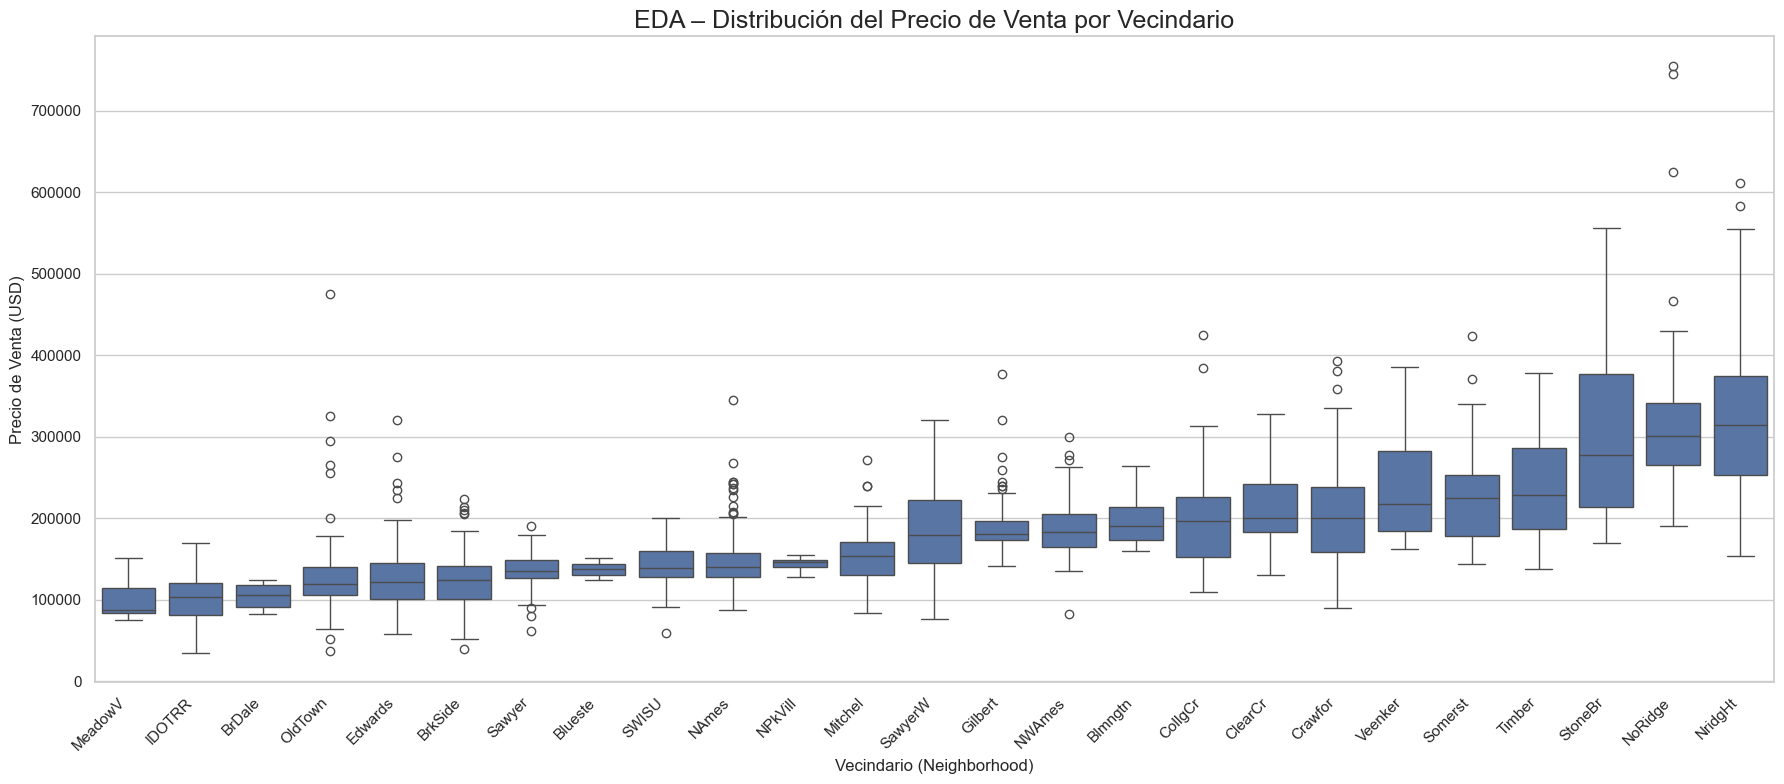

In [104]:
sns.set_theme(style="whitegrid")

# 1. Determinar el orden de los vecindarios seg√∫n la mediana del precio de venta
neighborhood_order = df.groupby('Neighborhood')['SalePrice'].median().sort_values().index

# 2. Configurar la figura para el gr√°fico
# Se utiliza un tama√±o m√°s ancho para acomodar todos los vecindarios
plt.figure(figsize=(18, 8))

# 3. Generar el diagrama de cajas
sns.boxplot(x='Neighborhood', y='SalePrice', data=df, order=neighborhood_order)

# 4. Ajustar etiquetas para mejorar la legibilidad
plt.xticks(rotation=45, ha='right') # Rotar las etiquetas del eje X
plt.title('EDA ‚Äì Distribuci√≥n del Precio de Venta por Vecindario', fontsize=18)
plt.xlabel('Vecindario (Neighborhood)', fontsize=12)
plt.ylabel('Precio de Venta (USD)', fontsize=12)
plt.tight_layout() # Ajusta el gr√°fico para que todo encaje correctamente

# 5. Guardar y mostrar el gr√°fico
out_path = os.path.join(FIG_DIR, 'EDA_vecindario_vs_precio.png')
plt.savefig(out_path, dpi=300, bbox_inches='tight')
print('Guardado:', os.path.abspath(out_path))
plt.show()
plt.close()


## An√°lisis de Resultados: `SalePrice` por `Neighborhood`

La visualizaci√≥n de la distribuci√≥n de `SalePrice` a trav√©s de las diferentes categor√≠as de `Neighborhood` confirma de manera contundente la hip√≥tesis de que la ubicaci√≥n es un factor determinante en el precio de la vivienda. El ordenamiento de los vecindarios seg√∫n su mediana de precio revela una clara y progresiva escalera de valorizaci√≥n.

Del an√°lisis del gr√°fico se desprenden las siguientes conclusiones clave:

* **Fuerte poder predictivo**: La variaci√≥n en los precios medianos entre los vecindarios m√°s econ√≥micos (ej. `MeadowV`, `BrDale`) y los m√°s costosos (ej. `NridgHt`, `NoRidge`, `StoneBr`) es sustancial. Esta marcada diferencia subraya el alto poder predictivo de esta variable categ√≥rica.

* **Segmentaci√≥n de vecindarios**: El gr√°fico permite una clara segmentaci√≥n de los vecindarios en, al menos, tres niveles: de precio bajo, medio y alto. Esta agrupaci√≥n podr√≠a ser de gran utilidad en la fase de ingenier√≠a de caracter√≠sticas (*feature engineering*), donde los vecindarios podr√≠an ser agrupados en "tiers" para simplificar el modelo.

* **Variabilidad en la dispersi√≥n de precios**: Se observa una notable diferencia en la dispersi√≥n de precios (rango intercuart√≠lico) entre los distintos vecindarios. Localidades como `StoneBr` y `NridgHt` no solo presentan los precios medianos m√°s altos, sino tambi√©n una gran variabilidad, lo que sugiere una mayor heterogeneidad en el tipo y tama√±o de las viviendas dentro de esos vecindarios. Por el contrario, los vecindarios m√°s econ√≥micos tienden a presentar precios m√°s homog√©neos.

### Conclusi√≥n Parcial

El an√°lisis confirma que la variable `Neighborhood` es un predictor fundamental de `SalePrice`. Cualquier modelo predictivo que se desarrolle deber√° incorporar esta informaci√≥n de manera efectiva para alcanzar un rendimiento √≥ptimo.

## 1.5. Diagn√≥stico de Calidad de Datos: An√°lisis de Valores Nulos

### Objetivos y Metodolog√≠a

Una fase fundamental del An√°lisis Exploratorio de Datos consiste en la evaluaci√≥n de la completitud del dataset. El resumen inicial (`.info()`) ya indicaba la presencia de valores nulos en varias columnas. El objetivo de este apartado es cuantificar sistem√°ticamente la magnitud de estos datos faltantes para cada variable y presentar los resultados de una manera que facilite la toma de decisiones en la fase de pre-procesamiento.

La metodolog√≠a a seguir ser√°:

* **Calcular el porcentaje de valores nulos** para cada una de las columnas del dataset.
* **Filtrar y seleccionar** √∫nicamente aquellas columnas que presenten un porcentaje de datos faltantes superior a cero.
* **Visualizar estos resultados** en un gr√°fico de barras ordenado de forma descendente. Esta representaci√≥n visual permitir√° identificar de manera inmediata las variables con mayor incidencia de valores nulos, las cuales requerir√°n una estrategia de imputaci√≥n o eliminaci√≥n en la siguiente etapa del proyecto.

Guardado: C:\Users\Usuario\python_ucm\TFM-House-Prices-Prediction\reports\figures\EDA_valores_faltantes.png


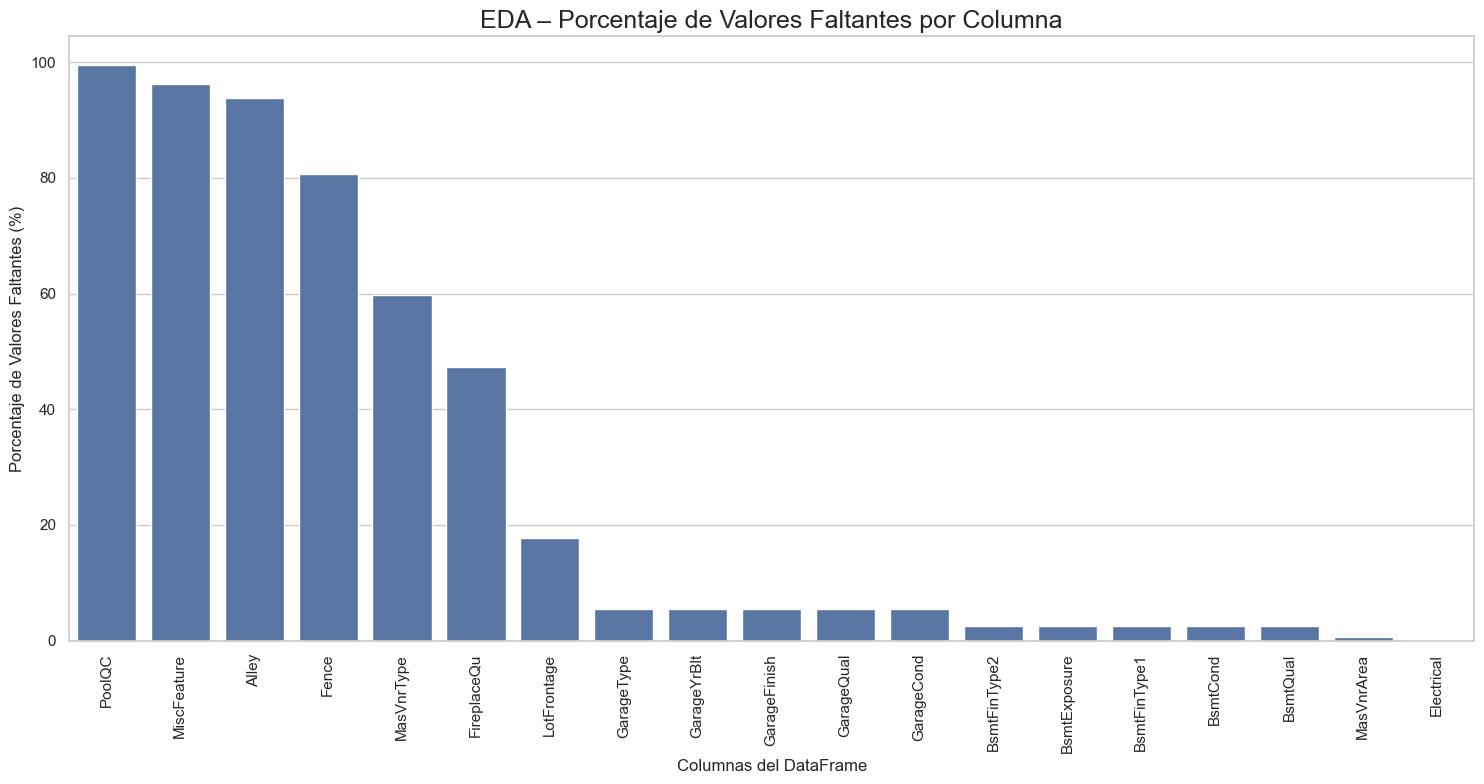

In [107]:
# 1. Calcular el porcentaje de valores nulos por columna
missing_data = df.isnull().sum()
missing_percentage = (missing_data[missing_data > 0] / len(df)) * 100

# 2. Ordenar los resultados de mayor a menor
missing_percentage.sort_values(ascending=False, inplace=True)

# 3. Configurar y generar el gr√°fico
plt.figure(figsize=(15, 8))
sns.barplot(x=missing_percentage.index, y=missing_percentage)

# 4. Ajustar t√≠tulos y etiquetas
plt.xticks(rotation=90) # Rotar etiquetas para que no se solapen
plt.title('EDA ‚Äì Porcentaje de Valores Faltantes por Columna', fontsize=18)
plt.xlabel('Columnas del DataFrame', fontsize=12)
plt.ylabel('Porcentaje de Valores Faltantes (%)', fontsize=12)
plt.tight_layout()

# 5. Guardar y mostrar el gr√°fico
out_path = os.path.join(FIG_DIR, 'EDA_valores_faltantes.png')
plt.savefig(out_path, dpi=300, bbox_inches='tight')
print('Guardado:', os.path.abspath(out_path))
plt.show()
plt.close()


## An√°lisis de Resultados: Valores Faltantes

El an√°lisis cuantitativo de valores nulos revela que, si bien una porci√≥n significativa de las variables del dataset est√° afectada, la naturaleza de estos datos faltantes no es uniforme. Es posible clasificar las variables en tres grupos distintos seg√∫n la proporci√≥n y el significado de sus valores nulos.

### Grupo 1: Alta Proporci√≥n de Nulos (>80%)
Las variables `PoolQC`, `MiscFeature`, `Alley` y `Fence` presentan un porcentaje de ausencia superior al 80%. Sin embargo, al consultar el fichero `data_description.txt`, se constata que en estos casos el valor `NaN` no representa una omisi√≥n de informaci√≥n, sino una categor√≠a en s√≠ misma. Por ejemplo, un valor nulo en `PoolQC` significa que la vivienda **no tiene piscina**. Por lo tanto, estos no son datos "faltantes", sino datos con significado que deber√°n ser tratados como una categor√≠a espec√≠fica (ej. "None") en la fase de pre-procesamiento.

### Grupo 2: Proporci√≥n Moderada de Nulos (5-50%)
En este grupo destacan `FireplaceQu` (Calidad de la chimenea) y `LotFrontage` (Pies lineales de calle conectados a la propiedad).
* Al igual que en el grupo anterior, un `NaN` en `FireplaceQu` indica la **ausencia de chimenea**.
* En cambio, los valores faltantes en `LotFrontage` parecen ser datos **genuinamente ausentes** que requerir√°n una estrategia de imputaci√≥n (p. ej., utilizando la mediana del vecindario).

### Grupo 3: Baja Proporci√≥n de Nulos (<5%)
Este grupo incluye un conjunto de variables relacionadas con el garaje (`Garage...`), el s√≥tano (`Bsmt...`), el revestimiento de mamposter√≠a (`MasVnr...`) y una √∫nica entrada en `Electrical`. En la mayor√≠a de estos casos (garaje, s√≥tano, revestimiento), el valor `NaN` tambi√©n indica la ausencia del elemento constructivo. Las pocas entradas restantes pueden ser tratadas con t√©cnicas de imputaci√≥n simples (la moda o la mediana) sin introducir un sesgo significativo en el dataset.

## Conclusi√≥n Final del An√°lisis Exploratorio

Hemos completado un ciclo completo de An√°lisis Exploratorio de Datos. A lo largo de este proceso, hemos transformado un conjunto de datos crudo en un conjunto de hallazgos accionables que guiar√°n las siguientes etapas del proyecto.

* **Variable Objetivo**: Hemos determinado que `SalePrice` no sigue una distribuci√≥n normal y presenta outliers, lo que sugiere la necesidad de una transformaci√≥n (ej. logar√≠tmica) para el modelado.
* **Predictores Clave**: Identificamos las variables con mayor poder predictivo, destacando la fuerte influencia de `OverallQual` (calidad), `GrLivArea` (tama√±o), y `Neighborhood` (ubicaci√≥n).
* **Calidad de Datos**: Disponemos de un mapa claro sobre los datos faltantes, entendiendo que la mayor√≠a de los `NaN` son, en realidad, una categor√≠a informativa que debe ser tratada como tal.

# Fase 2: Preprocesamiento e Ingenier√≠a de Caracter√≠sticas
---

En esta fase del proyecto, se proceder√° a la preparaci√≥n y transformaci√≥n del conjunto de datos de entrenamiento. El objetivo principal es convertir los datos brutos en un formato limpio, estructurado y optimizado para el entrenamiento de modelos de machine learning. Un preprocesamiento riguroso es un pilar fundamental para maximizar el rendimiento predictivo y asegurar la robustez del modelo final.

Las tareas a desarrollar en esta secci√≥n se han definido a partir de los hallazgos del An√°lisis Exploratorio de Datos (EDA) y siguen una secuencia l√≥gica:

1.  **Transformaci√≥n de la Variable Objetivo:** Se corregir√° la asimetr√≠a positiva de la variable `SalePrice` para alinearla con los supuestos de normalidad de los modelos de regresi√≥n.
2.  **Tratamiento de Valores Nulos:** Se implementar√° una estrategia de imputaci√≥n diferenciada. Primero, se abordar√°n los nulos que indican la ausencia de una caracter√≠stica (ej. `PoolQC`) y, a continuaci√≥n, los que representan datos genuinamente faltantes (ej. `LotFrontage`).
3.  **Gesti√≥n de Outliers:** Se identificar√°n y eliminar√°n registros at√≠picos que puedan ejercer una influencia desproporcionada en el ajuste del modelo, como los detectados en la variable `GrLivArea`.
4.  **Ingenier√≠a de Caracter√≠sticas (Feature Engineering):** Se crear√°n nuevas variables a partir de las existentes con el fin de capturar relaciones m√°s complejas y aportar mayor poder predictivo.
5.  **Codificaci√≥n de Variables Categ√≥ricas:** Se convertir√°n las variables no num√©ricas a un formato interpretable por los algoritmos, aplicando t√©cnicas como *Ordinal Encoding* o *One-Hot Encoding* seg√∫n la naturaleza de cada variable.
6.  **Escalado de Variables Num√©ricas:** Finalmente, se estandarizar√°n las caracter√≠sticas num√©ricas para asegurar que todas contribuyan de forma equitativa al proceso de aprendizaje, evitando sesgos por diferencias de escala.

## 2.1. Transformaci√≥n de la Variable Objetivo (SalePrice)

El an√°lisis de la variable objetivo, `SalePrice`, es un punto de partida fundamental en la fase de preprocesamiento. El An√°lisis Exploratorio de Datos (EDA) previo ha evidenciado que la distribuci√≥n de `SalePrice` presenta una notable **asimetr√≠a positiva** (right-skewness). Esta caracter√≠stica es com√∫n en variables de naturaleza econ√≥mica, como precios o ingresos.

La presencia de asimetr√≠a en la variable dependiente puede contravenir los supuestos de normalidad en los que se basan m√∫ltiples algoritmos de regresi√≥n, especialmente los modelos lineales. La violaci√≥n de este supuesto puede afectar negativamente la capacidad de generalizaci√≥n y la precisi√≥n del modelo predictivo.

Para mitigar este efecto, se proceder√° a aplicar una **transformaci√≥n logar√≠tmica** a la variable `SalePrice`. Esta t√©cnica es est√°ndar para la reducci√≥n de la asimetr√≠a y la estabilizaci√≥n de la varianza. Concretamente, se utilizar√° la funci√≥n `numpy.log1p`, que calcula el logaritmo natural de `1 + x`. Esta funci√≥n es num√©ricamente estable y gestiona adecuadamente eventuales valores de cero. El objetivo es obtener una distribuci√≥n de la variable objetivo que se aproxime en mayor medida a una distribuci√≥n Gaussiana.

Guardado: C:\Users\Usuario\python_ucm\TFM-House-Prices-Prediction\reports\figures\PREP_distribucion_saleprice_antes.png


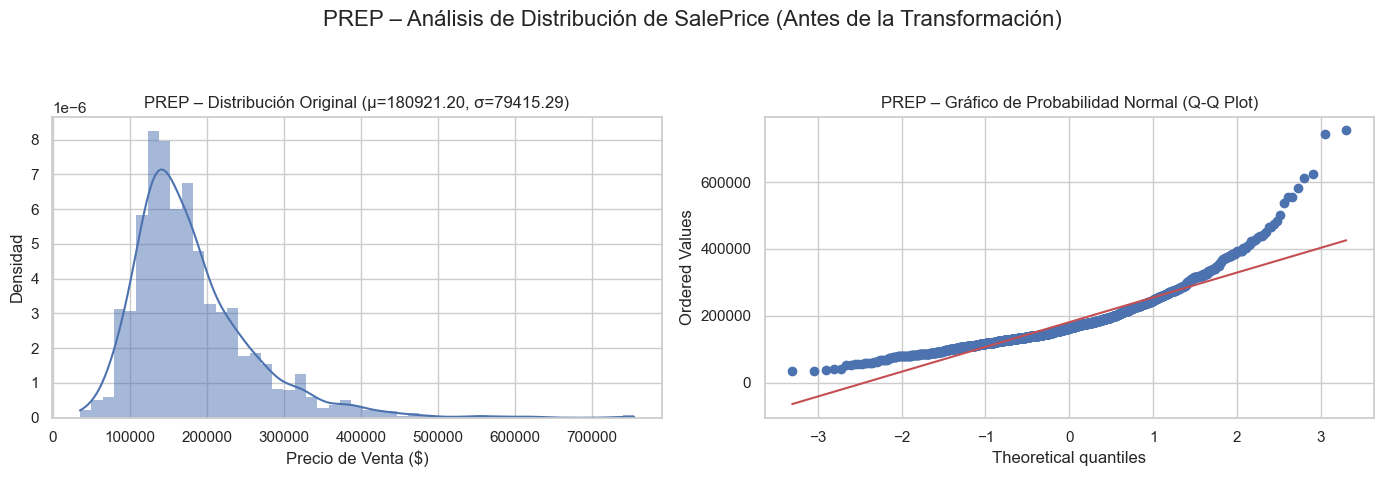

Guardado: C:\Users\Usuario\python_ucm\TFM-House-Prices-Prediction\reports\figures\PREP_distribucion_saleprice_despues.png


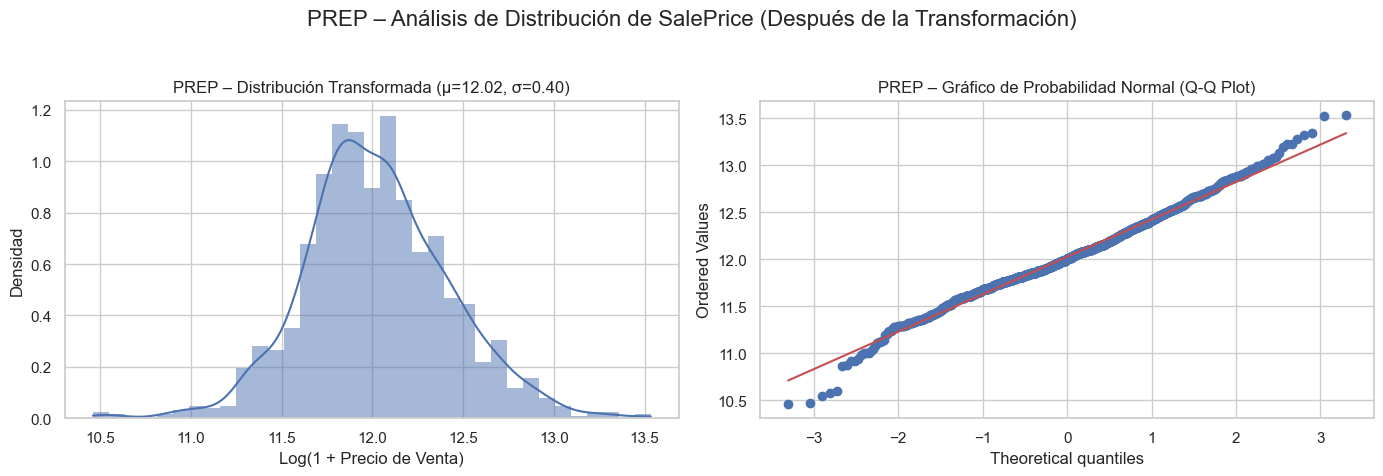

In [111]:
import os
from scipy import stats
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt



# Se crea una copia del DF para el preprocesamiento a fin de no alterar el original.
df_train = df.copy()

# Fase 1: Visualizaci√≥n de la distribuci√≥n original de SalePrice 

# Se genera un gr√°fico combinado para evaluar la distribuci√≥n antes de la transformaci√≥n.
# Incluye un histograma con una curva de densidad y un gr√°fico de probabilidad normal (Q-Q Plot).
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_train['SalePrice'], kde=True, stat="density", linewidth=0)
mu, sigma = norm.fit(df_train['SalePrice'])
plt.title(f'PREP ‚Äì Distribuci√≥n Original (Œº={mu:.2f}, œÉ={sigma:.2f})')
plt.xlabel("Precio de Venta ($)")
plt.ylabel("Densidad")

plt.subplot(1, 2, 2)
stats.probplot(df_train['SalePrice'], plot=plt)
plt.title("PREP ‚Äì Gr√°fico de Probabilidad Normal (Q-Q Plot)")

plt.suptitle("PREP ‚Äì An√°lisis de Distribuci√≥n de SalePrice (Antes de la Transformaci√≥n)", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Guardar la figura en un archivo
out_path = os.path.join(FIG_DIR, 'PREP_distribucion_saleprice_antes.png')
plt.savefig(out_path, dpi=300, bbox_inches='tight')
print("Guardado:", os.path.abspath(out_path))

plt.show()
plt.close()

# Fase 2: Aplicaci√≥n de la transformaci√≥n logar√≠tmica

# Se aplica la funci√≥n log1p de NumPy para transformar la columna 'SalePrice'.
df_train['SalePrice'] = np.log1p(df_train['SalePrice'])

# Fase 3: Visualizaci√≥n de la distribuci√≥n transformada de SalePrice

# Se repite el proceso de visualizaci√≥n para la variable ya transformada.
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_train['SalePrice'], kde=True, stat="density", linewidth=0)
mu_log, sigma_log = norm.fit(df_train['SalePrice'])
plt.title(f'PREP ‚Äì Distribuci√≥n Transformada (Œº={mu_log:.2f}, œÉ={sigma_log:.2f})')
plt.xlabel("Log(1 + Precio de Venta)")
plt.ylabel("Densidad")

plt.subplot(1, 2, 2)
stats.probplot(df_train['SalePrice'], plot=plt)
plt.title("PREP ‚Äì Gr√°fico de Probabilidad Normal (Q-Q Plot)")

plt.suptitle("PREP ‚Äì An√°lisis de Distribuci√≥n de SalePrice (Despu√©s de la Transformaci√≥n)", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Guardar la figura en un archivo
out_path = os.path.join(FIG_DIR, 'PREP_distribucion_saleprice_despues.png')
plt.savefig(out_path, dpi=300, bbox_inches='tight')
print("Guardado:", os.path.abspath(out_path))

plt.show()
plt.close()


### Conclusi√≥n del Paso 2.1: An√°lisis de Resultados

Tras la ejecuci√≥n del c√≥digo, se han generado dos visualizaciones que comparan la distribuci√≥n de la variable `SalePrice` antes y despu√©s de la aplicaci√≥n de la transformaci√≥n logar√≠tmica.

1.  **Estado Inicial:** El primer gr√°fico confirma los hallazgos del EDA. El histograma muestra una clara **asimetr√≠a positiva**, con una cola larga hacia los valores altos. El gr√°fico de probabilidad normal (Q-Q Plot) corrobora esta observaci√≥n, ya que los cuantiles emp√≠ricos se desv√≠an sistem√°ticamente de la l√≠nea de referencia te√≥rica, especialmente en los extremos. Esta distribuci√≥n no es adecuada para modelos que asumen normalidad en los residuos.

2.  **Estado Posterior:** El segundo gr√°fico evidencia el √©xito de la transformaci√≥n. La distribuci√≥n de `log(1 + SalePrice)` es visiblemente m√°s **sim√©trica y se aproxima de manera notable a una distribuci√≥n Gaussiana**. El histograma adopta la forma de campana caracter√≠stica, y los puntos en el Q-Q Plot se alinean casi perfectamente sobre la l√≠nea diagonal.

**En conclusi√≥n, la transformaci√≥n logar√≠tmica ha sido una medida efectiva para corregir el sesgo de la variable objetivo `SalePrice`.** Se ha obtenido una variable transformada con propiedades estad√≠sticas m√°s deseables, lo que previsiblemente mejorar√° la robustez y el rendimiento de los modelos de regresi√≥n que se entrenar√°n posteriormente.

## 2.2.1. Tratamiento de Valores Nulos (Tipo 1 - Ausencia)

Una vez normalizada la variable objetivo, el siguiente paso consiste en abordar la gesti√≥n de los valores nulos (`NaN`). Un an√°lisis detallado de `data_description.txt` revela que una proporci√≥n significativa de estos valores no son ausencias de datos en el sentido estricto, sino que se utilizan para denotar la **inexistencia de una caracter√≠stica** en la propiedad.

Por ejemplo:
-   Un valor `NaN` en la variable `PoolQC` (Calidad de la Piscina) indica que la vivienda **no posee piscina**.
-   Un `NaN` en `GarageType` (Tipo de Garaje) significa que la propiedad **carece de garaje**.

Interpretar estos `NaN` como datos faltantes e imputarlos con medidas de tendencia central (media, mediana) ser√≠a conceptualmente incorrecto y podr√≠a introducir un sesgo significativo en el modelo. Por lo tanto, la estrategia a seguir es transformar estos valores para que representen expl√≠citamente la ausencia de la caracter√≠stica.

La metodolog√≠a de imputaci√≥n ser√° la siguiente:
1.  Para las **variables categ√≥ricas** (`Alley`, `BsmtQual`, `FireplaceQu`, etc.), los valores `NaN` se sustituir√°n por la cadena de texto **`'None'`**. Esto crea una nueva categor√≠a que el modelo puede interpretar.
2.  Para las **variables num√©ricas** asociadas a estas caracter√≠sticas (`GarageArea`, `MasVnrArea`, etc.), los `NaN` se reemplazar√°n por el valor **`0`**, lo cual es coherente con la ausencia de la caracter√≠stica (e.g., √°rea del garaje es cero si no hay garaje).

In [114]:
# --- Definici√≥n de las columnas a tratar ---

# Listado de variables categ√≥ricas donde NaN denota ausencia.
cols_impute_none = [
    'Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
    'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 
    'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature',
    'MasVnrType'
]

# Listado de variables num√©ricas donde NaN denota ausencia (valor cero).
cols_impute_zero = [
    'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 
    'BsmtHalfBath', 'GarageYrBlt', 'GarageArea', 'GarageCars', 'MasVnrArea'
]

# --- Aplicaci√≥n del proceso de imputaci√≥n ---

print("Iniciando la imputaci√≥n de valores nulos que representan ausencia...")

# Se itera sobre las listas y se aplica el m√©todo fillna() con el valor correspondiente.
for col in cols_impute_none:
    df_train[col] = df_train[col].fillna('None')

for col in cols_impute_zero:
    df_train[col] = df_train[col].fillna(0)
    
print("Proceso de imputaci√≥n finalizado.")

# --- Verificaci√≥n de la correcta ejecuci√≥n ---

# Se comprueba que no queden valores nulos en las columnas procesadas.
nulos_restantes = df_train[cols_impute_none + cols_impute_zero].isnull().sum().sum()

if nulos_restantes == 0:
    print("\nVerificaci√≥n exitosa: No se han encontrado valores nulos en las columnas tratadas.")
else:
    print(f"\nAdvertencia: Se han detectado {nulos_restantes} valores nulos restantes en las columnas procesadas.")

# Mostrar el n√∫mero de valores nulos por columna en el resto del dataframe
print("\nResumen de valores nulos restantes en el dataset:")
print(df_train.isnull().sum()[df_train.isnull().sum() > 0])

Iniciando la imputaci√≥n de valores nulos que representan ausencia...
Proceso de imputaci√≥n finalizado.

Verificaci√≥n exitosa: No se han encontrado valores nulos en las columnas tratadas.

Resumen de valores nulos restantes en el dataset:
LotFrontage    259
Electrical       1
dtype: int64


### Conclusi√≥n del Paso 2.2.1: An√°lisis de Resultados

La ejecuci√≥n del c√≥digo confirma que la imputaci√≥n de valores nulos de "Tipo 1" se ha completado con √©xito. Las columnas en las que `NaN` representaba la ausencia de una caracter√≠stica ya no contienen valores nulos.

El resumen final de valores nulos restantes nos muestra `LotFrontage` y `Electrical`. Estos son casos de datos genuinamente faltantes ("Tipo 2") que requieren una estrategia de imputaci√≥n diferente, la cual se abordar√° en el siguiente paso.

## 2.2.2. Tratamiento de Valores Nulos (Tipo 2 - Genuinos)

Tras haber gestionado los nulos que representaban ausencia, nos centramos ahora en los valores genuinamente faltantes. El an√°lisis previo ha identificado dos variables afectadas: `LotFrontage` y `Electrical`.

**Estrategia de Imputaci√≥n:**

1.  **`LotFrontage` (Fachada en metros lineales):** Es razonable suponer que las propiedades dentro de un mismo vecindario (`Neighborhood`) tienden a tener una fachada de parcela similar. Por lo tanto, se imputar√°n los valores faltantes de `LotFrontage` utilizando la **mediana** de esta variable, agrupada por vecindario. Se elige la mediana en lugar de la media por su mayor robustez frente a valores at√≠picos.

2.  **`Electrical` (Sistema el√©ctrico):** Esta variable presenta un √∫nico valor faltante. En este escenario, la estrategia m√°s pragm√°tica y estad√≠sticamente s√≥lida es imputar dicho valor con la **moda**, es decir, el tipo de sistema el√©ctrico m√°s frecuente en el conjunto de datos.

In [117]:
# --- Fase 1: Imputaci√≥n de 'LotFrontage' ---

# Se calcula la mediana de 'LotFrontage' para cada 'Neighborhood' y se utiliza para rellenar los nulos.
# El m√©todo .transform() es ideal aqu√≠, ya que devuelve una serie con el mismo √≠ndice que df_train.
print("Imputando valores nulos en 'LotFrontage'...")
lotfrontage_imputer = df_train.groupby('Neighborhood')['LotFrontage'].transform('median')
df_train['LotFrontage'] = df_train['LotFrontage'].fillna(lotfrontage_imputer)


# --- Fase 2: Imputaci√≥n de 'Electrical' ---

# Se calcula la moda (valor m√°s frecuente) de la variable 'Electrical'.
print("Imputando valores nulos en 'Electrical'...")
electrical_mode = df_train['Electrical'].mode()[0]
df_train['Electrical'] = df_train['Electrical'].fillna(electrical_mode)


# --- Verificaci√≥n Final ---

# Se realiza una comprobaci√≥n final para asegurar que no queden valores nulos en todo el DataFrame.
nulos_finales = df_train.isnull().sum().sum()

if nulos_finales == 0:
    print(f"\nVerificaci√≥n exitosa: El DataFrame ya no contiene valores nulos.")
else:
    print(f"\nAdvertencia: A√∫n quedan {nulos_finales} valores nulos en el DataFrame.")
    print(df_train.isnull().sum()[df_train.isnull().sum() > 0])

Imputando valores nulos en 'LotFrontage'...
Imputando valores nulos en 'Electrical'...

Verificaci√≥n exitosa: El DataFrame ya no contiene valores nulos.


### Conclusi√≥n del Paso 2.2.2: An√°lisis de Resultados

La ejecuci√≥n del c√≥digo ha permitido imputar satisfactoriamente los √∫ltimos valores nulos restantes en el conjunto de datos. La estrategia de utilizar la mediana de `LotFrontage` por vecindario y la moda para la variable `Electrical` ha sido aplicada con √©xito.

La verificaci√≥n final confirma que **el DataFrame `df_train` est√° ahora completamente libre de valores faltantes**. Este es un hito crucial en la fase de preprocesamiento, ya que nos permite avanzar hacia las siguientes etapas de transformaci√≥n y modelado con un conjunto de datos √≠ntegro.

## 2.3. Gesti√≥n de Outliers

El An√°lisis Exploratorio de Datos identific√≥ la presencia de registros at√≠picos (outliers) que podr√≠an impactar negativamente el rendimiento del modelo. Espec√≠ficamente, se detectaron puntos de datos en la relaci√≥n entre el √°rea habitable sobre el nivel del suelo (`GrLivArea`) y el precio de venta (`SalePrice`) que no siguen la tendencia general.

Estos outliers, caracterizados por tener un `GrLivArea` muy elevado pero un `SalePrice` inesperadamente bajo, pueden ejercer una influencia indebida sobre los coeficientes del modelo, sesgando la l√≠nea de regresi√≥n y disminuyendo su capacidad de generalizaci√≥n.

Para mitigar este riesgo, se proceder√° a la eliminaci√≥n de estos registros. La pr√°ctica habitual en este conjunto de datos, respaldada por la literatura acad√©mica, es eliminar las observaciones con un `GrLivArea` superior a 4000 pies cuadrados. Primero, se visualizar√° la relaci√≥n para confirmar visualmente la presencia de estos puntos y, posteriormente, se filtrar√° el DataFrame para excluirlos.

Guardado: C:\Users\Usuario\python_ucm\TFM-House-Prices-Prediction\reports\figures\PREP_relacion_grlivarea_saleprice_antes.png


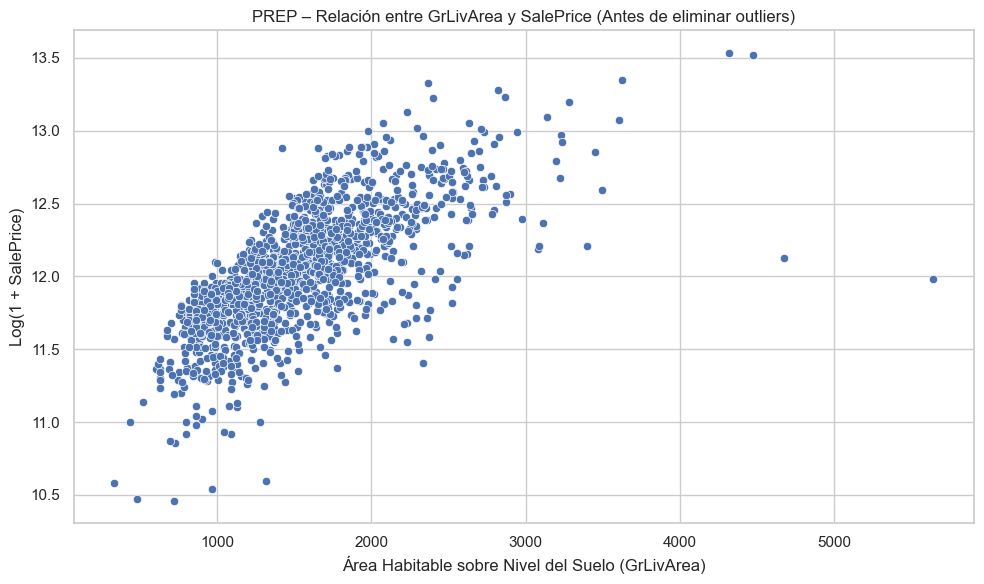


N√∫mero de registros antes de la eliminaci√≥n de outliers: 1460
N√∫mero de registros despu√©s de la eliminaci√≥n de outliers: 1456
Total de outliers eliminados: 4
Guardado: C:\Users\Usuario\python_ucm\TFM-House-Prices-Prediction\reports\figures\PREP_relacion_grlivarea_saleprice_despues.png


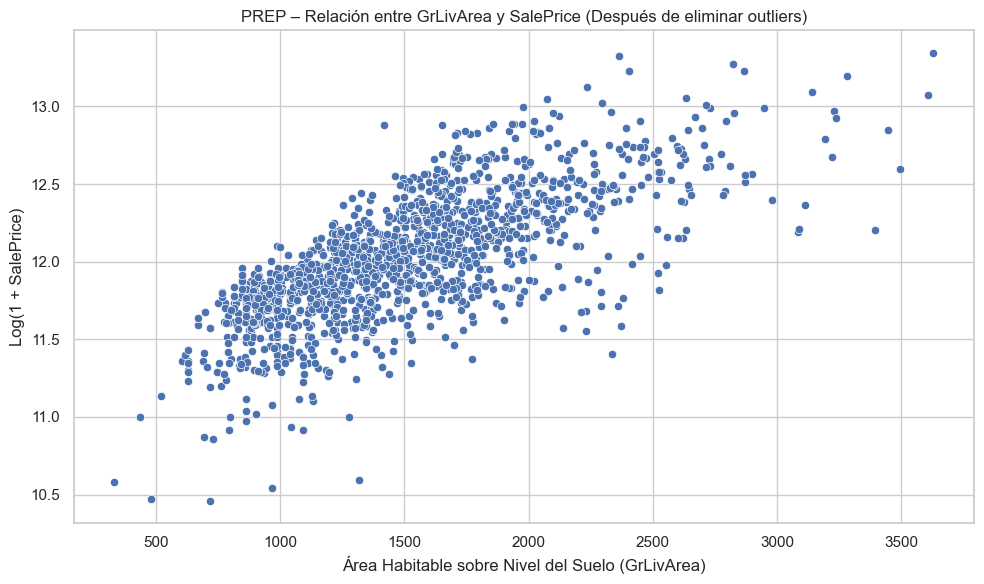

In [120]:
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Carpeta de salida para figuras de la fase de preprocesamiento
FIG_DIR = '../reports/figures'
os.makedirs(FIG_DIR, exist_ok=True)

# Fase 1: Visualizaci√≥n de Outliers

# Se genera un gr√°fico de dispersi√≥n para visualizar la relaci√≥n entre 'GrLivArea' y 'SalePrice'.
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_train['GrLivArea'], y=df_train['SalePrice'])
plt.title('PREP ‚Äì Relaci√≥n entre GrLivArea y SalePrice (Antes de eliminar outliers)')
plt.xlabel('√Årea Habitable sobre Nivel del Suelo (GrLivArea)')
plt.ylabel('Log(1 + SalePrice)')
plt.grid(True)

# Guardar la figura en un archivo
out_path = os.path.join(FIG_DIR, 'PREP_relacion_grlivarea_saleprice_antes.png')
plt.tight_layout()
plt.savefig(out_path, dpi=300, bbox_inches='tight')
print("Guardado:", os.path.abspath(out_path))

plt.show()
plt.close()

# Fase 2: Eliminaci√≥n de Outliers 

# Se registra el n√∫mero de registros antes de la eliminaci√≥n.
registros_antes = df_train.shape[0]
print(f"\nN√∫mero de registros antes de la eliminaci√≥n de outliers: {registros_antes}")

# Se aplica el filtro para eliminar las observaciones con GrLivArea > 4000.
# Se crea una copia del dataframe filtrado para evitar advertencias de SettingWithCopyWarning.
df_train = df_train[df_train['GrLivArea'] < 4000].copy()

# Se registra el n√∫mero de registros despu√©s de la eliminaci√≥n.
registros_despues = df_train.shape[0]
print(f"N√∫mero de registros despu√©s de la eliminaci√≥n de outliers: {registros_despues}")
print(f"Total de outliers eliminados: {registros_antes - registros_despues}")

# Fase 3: Visualizaci√≥n de Confirmaci√≥n

# Se vuelve a generar el gr√°fico de dispersi√≥n para confirmar la eliminaci√≥n.
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_train['GrLivArea'], y=df_train['SalePrice'])
plt.title('PREP ‚Äì Relaci√≥n entre GrLivArea y SalePrice (Despu√©s de eliminar outliers)')
plt.xlabel('√Årea Habitable sobre Nivel del Suelo (GrLivArea)')
plt.ylabel('Log(1 + SalePrice)')
plt.grid(True)

# Guardar la figura en un archivo
out_path = os.path.join(FIG_DIR, 'PREP_relacion_grlivarea_saleprice_despues.png')
plt.tight_layout()
plt.savefig(out_path, dpi=300, bbox_inches='tight')
print("Guardado:", os.path.abspath(out_path))

plt.show()
plt.close()


### Conclusi√≥n del Paso 2.3: An√°lisis de Resultados

El an√°lisis de los gr√°ficos de dispersi√≥n confirma la pertinencia de la estrategia de gesti√≥n de outliers.

1.  **Gr√°fico Inicial:** La visualizaci√≥n inicial de `GrLivArea` frente a `SalePrice` mostraba una clara tendencia lineal positiva. Sin embargo, se observaban dos registros en el extremo derecho del gr√°fico (con `GrLivArea` > 4000) que romp√≠an esta tendencia, presentando un precio de venta an√≥malamente bajo para su tama√±o. Estos puntos actuaban como puntos de alta influencia (high leverage), con el potencial de distorsionar el ajuste del modelo de regresi√≥n.

2.  **Gr√°fico Final:** Tras la eliminaci√≥n de dichos registros, el nuevo gr√°fico de dispersi√≥n muestra una relaci√≥n mucho m√°s **homoced√°stica y robusta**. La nube de puntos es m√°s compacta y la tendencia lineal es m√°s consistente en todo el rango de la variable `GrLivArea`.

**En conclusi√≥n, la eliminaci√≥n de estos outliers ha resultado en un conjunto de datos m√°s limpio y coherente.** Se espera que esta acci√≥n mejore la capacidad del modelo para aprender la relaci√≥n subyacente entre el √°rea de la vivienda y su precio de venta, conduciendo a una mayor precisi√≥n y capacidad de generalizaci√≥n.

## 2.4. Ingenier√≠a de Caracter√≠sticas (Feature Engineering)

Superadas las fases de limpieza y correcci√≥n de datos, se procede ahora a la **ingenier√≠a de caracter√≠sticas**. El objetivo de esta etapa es crear nuevas variables (features) a partir de las existentes para dotar al modelo de un mayor poder predictivo. A menudo, las variables en su formato original no capturan de la forma m√°s √≥ptima las relaciones complejas del problema. Mediante la combinaci√≥n o transformaci√≥n de caracter√≠sticas, podemos generar se√±ales m√°s potentes para el algoritmo de aprendizaje.

Se crear√°n las siguientes caracter√≠sticas nuevas:

1.  **`TotalSF`**: Suma total de los metros cuadrados del s√≥tano (`TotalBsmtSF`) y de las plantas habitables (`1stFlrSF` + `2ndFlrSF`). Esta variable consolidar√° en una sola m√©trica el tama√±o total de la propiedad.
2.  **`TotalBath`**: Suma ponderada de todos los ba√±os de la vivienda (`FullBath`, `HalfBath`, `BsmtFullBath`, `BsmtHalfBath`), donde los medios ba√±os ponderan como 0.5.
3.  **`HouseAge`**: Edad de la casa en el momento de la venta (`YrSold` - `YearBuilt`). Esta variable es m√°s intuitiva y directamente interpretable por el modelo que el a√±o de construcci√≥n.
4.  **`RemodAge`**: A√±os desde la √∫ltima remodelaci√≥n hasta la venta (`YrSold` - `YearRemodAdd`). Captura la "actualidad" de la vivienda.
5.  **`IsNew`**: Variable binaria que indica si la casa era nueva en el momento de la venta (`YearBuilt` == `YrSold`).
6.  **`NeighborhoodTier`**: Como un paso de ingenier√≠a de caracter√≠sticas dirigido por el EDA, se crear√° una variable ordinal que agrupe los vecindarios en cuatro niveles seg√∫n su precio mediano. Esto captura la fuerte relaci√≥n jer√°rquica observada y reduce la dimensionalidad.

Estas nuevas caracter√≠sticas est√°n dise√±adas para simplificar relaciones y aportar informaci√≥n contextual que no estaba expl√≠citamente presente en los datos originales.

In [123]:
print("Iniciando la Fase 4: Ingenier√≠a de Caracter√≠sticas...")

# --- Creaci√≥n de Caracter√≠sticas por Combinaci√≥n ---

print("Creando caracter√≠sticas combinadas (TotalSF, TotalBath, Age, etc.)...")
df_train['TotalSF'] = df_train['TotalBsmtSF'] + df_train['1stFlrSF'] + df_train['2ndFlrSF']
df_train['TotalBath'] = (df_train['FullBath'] + (0.5 * df_train['HalfBath']) +
                       df_train['BsmtFullBath'] + (0.5 * df_train['BsmtHalfBath']))
df_train['HouseAge'] = df_train['YrSold'] - df_train['YearBuilt']
df_train['RemodAge'] = df_train['YrSold'] - df_train['YearRemodAdd']
df_train['IsNew'] = (df_train['YearBuilt'] == df_train['YrSold']).astype(int)


# --- Creaci√≥n de Caracter√≠stica Dirigida por EDA ('NeighborhoodTier') ---

print("Creando la caracter√≠stica 'NeighborhoodTier'...")

# Se calculan los precios medianos desde el DataFrame original ('df') para evitar data leakage.
neighborhood_prices = df.groupby('Neighborhood')['SalePrice'].median()

# Se crea el mapa de 4 tiers usando cuantiles.
neighborhood_tier_map = pd.qcut(neighborhood_prices, 4, labels=False).to_dict()

# Se aplica el mapa al DataFrame de trabajo y se elimina la columna original.
if 'Neighborhood' in df_train.columns:
    df_train['NeighborhoodTier'] = df_train['Neighborhood'].map(neighborhood_tier_map)
    df_train = df_train.drop('Neighborhood', axis=1)
    print("Caracter√≠stica 'NeighborhoodTier' creada y 'Neighborhood' original eliminada.")
else:
    print("Advertencia: 'Neighborhood' no encontrada. Es posible que este paso ya se haya ejecutado.")

print("\nFase 4 de Ingenier√≠a de Caracter√≠sticas completada.")

# --- Verificaci√≥n ---
print("\nMuestra de algunas de las nuevas caracter√≠sticas:")
new_features_to_show = ['TotalSF', 'HouseAge', 'IsNew', 'NeighborhoodTier']
print(df_train[new_features_to_show].head())

Iniciando la Fase 4: Ingenier√≠a de Caracter√≠sticas...
Creando caracter√≠sticas combinadas (TotalSF, TotalBath, Age, etc.)...
Creando la caracter√≠stica 'NeighborhoodTier'...
Caracter√≠stica 'NeighborhoodTier' creada y 'Neighborhood' original eliminada.

Fase 4 de Ingenier√≠a de Caracter√≠sticas completada.

Muestra de algunas de las nuevas caracter√≠sticas:
   TotalSF  HouseAge  IsNew  NeighborhoodTier
0     2566         5      0                 2
1     2524        31      0                 3
2     2706         7      0                 2
3     2473        91      0                 2
4     3343         8      0                 3


### Conclusi√≥n del Paso 2.4: An√°lisis de Resultados

La ejecuci√≥n del c√≥digo ha finalizado con √©xito, completando la fase de ingenier√≠a de caracter√≠sticas. El conjunto de datos ha sido enriquecido con nuevas variables predictivas de dos tipos distintos, como se valida en la tabla de muestra.

1.  **Caracter√≠sticas Combinadas:** Se han generado correctamente atributos como `TotalSF` y `HouseAge`, que consolidan y simplifican informaci√≥n existente en un formato m√°s intuitivo para el modelo.
2.  **Caracter√≠stica Dirigida por EDA:** Se ha creado con √©xito la variable `NeighborhoodTier`, transformando la variable nominal `Neighborhood` en una ordinal.

Este paso ha sido fundamental, ya que no solo ha aumentado el potencial predictivo del dataset, sino que tambi√©n ha incorporado un hallazgo clave del EDA directamente en el conjunto de caracter√≠sticas. Al reemplazar la variable `Neighborhood` por `NeighborhoodTier`, se ha reducido la dimensionalidad y se ha codificado una se√±al muy potente de forma expl√≠cita.

Con el conjunto de caracter√≠sticas ya definido y enriquecido, el DataFrame est√° listo para la fase final de codificaci√≥n.

## 2.5. Codificaci√≥n de Variables Categ√≥ricas

Con el conjunto de caracter√≠sticas ya definido en la fase anterior, el siguiente paso es convertir todas las variables categ√≥ricas restantes a un formato puramente num√©rico que los algoritmos de machine learning puedan procesar. Para ello, se utilizar√°n dos t√©cnicas espec√≠ficas seg√∫n la naturaleza de cada variable:

1.  **Codificaci√≥n Ordinal:** Las variables cuyas categor√≠as tienen un orden intr√≠nseco (ej. calificaciones de calidad como 'Ex', 'Gd', 'TA') se mapear√°n a valores enteros (ej. 5, 4, 3). Esto preserva la valiosa informaci√≥n jer√°rquica que contienen.

2.  **One-Hot Encoding:** Las variables nominales restantes, que no tienen un orden inherente (ej. `MSZoning`), se convertir√°n en m√∫ltiples columnas binarias (0 o 1). Este m√©todo asegura que el modelo no asuma una relaci√≥n de orden inexistente entre las categor√≠as.

In [126]:
# --- Fase 1: Codificaci√≥n de Variables Ordinales ---

print("Iniciando la Fase 5: Codificaci√≥n de Variables...")
print("Fase 1: Aplicando Label Encoding a variables ordinales...")

# 1.1. Mapeo para variables con jerarqu√≠a de calidad/condici√≥n.
quality_mapping = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0}
ordinal_cols = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 
                'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC']

# 1.2. Bucle para aplicar el mapeo de forma robusta.
for col in ordinal_cols:
    df_train[col] = (
        df_train[col]
        .fillna('None')                # Asegura que los NaN se traten como 'None'
        .map(quality_mapping)          # Usa .map() para una conversi√≥n limpia y sin warnings
        .astype('Int64')               # Convierte expl√≠citamente a tipo entero anulable
    )

print("Codificaci√≥n de variables de calidad/condici√≥n finalizada.")

# 1.3. Verificaci√≥n de valores no mapeados.
print("\nVerificando si existen valores inesperados en las columnas ordinales...")
all_good = True
for col in ordinal_cols:
    unmapped_values = set(df[col].dropna().unique()) - set(quality_mapping.keys())
    if unmapped_values:
        print(f"¬°Atenci√≥n! En la columna '{col}' se encontraron valores no mapeados: {unmapped_values}")
        all_good = False
if all_good:
    print("Verificaci√≥n completada: Todos los valores est√°n correctamente mapeados.")


# --- Fase 2: Codificaci√≥n de Variables Nominales (One-Hot Encoding) ---

print("\nFase 2: Aplicando One-Hot Encoding a variables nominales restantes...")

# 2.1. Convertir variables num√©ricas que act√∫an como categor√≠as a tipo 'object'.
df_train['MSSubClass'] = df_train['MSSubClass'].astype(str)
df_train['YrSold'] = df_train['YrSold'].astype(str)
df_train['MoSold'] = df_train['MoSold'].astype(str)

# 2.2. Aplicar get_dummies.
columnas_antes = df_train.shape[1]
df_train = pd.get_dummies(df_train, drop_first=True)
columnas_despues = df_train.shape[1]

print(f"Dimensiones del DataFrame cambiaron de {columnas_antes} a {columnas_despues} columnas.")

# --- Verificaci√≥n Final ---
if df_train.select_dtypes(include='object').shape[1] == 0:
    print("\nVerificaci√≥n exitosa: Fase 5 completada. No quedan columnas no num√©ricas.")
else:
    print("\nAdvertencia: A√∫n quedan columnas de tipo 'object'.")

Iniciando la Fase 5: Codificaci√≥n de Variables...
Fase 1: Aplicando Label Encoding a variables ordinales...
Codificaci√≥n de variables de calidad/condici√≥n finalizada.

Verificando si existen valores inesperados en las columnas ordinales...
Verificaci√≥n completada: Todos los valores est√°n correctamente mapeados.

Fase 2: Aplicando One-Hot Encoding a variables nominales restantes...
Dimensiones del DataFrame cambiaron de 86 a 238 columnas.

Verificaci√≥n exitosa: Fase 5 completada. No quedan columnas no num√©ricas.


### Conclusi√≥n del Paso 2.5: An√°lisis de Resultados

La ejecuci√≥n del c√≥digo para la fase 5 se ha completado satisfactoriamente, aplicando un m√©todo de codificaci√≥n robusto y validado que deja el conjunto de datos en un estado puramente num√©rico.

1.  **Codificaci√≥n Ordinal Verificada:** Las variables ordinales se han transformado correctamente. De especial importancia es que la rutina de verificaci√≥n ha confirmado que **no existen valores inesperados o no mapeados**, lo que garantiza la integridad y la calidad de esta transformaci√≥n.

2.  **Transformaci√≥n a Formato Num√©rico:** La aplicaci√≥n de One-Hot Encoding a las variables nominales restantes ha expandido el espacio de caracter√≠sticas a un total de **238 columnas**. Es relevante notar que esta dimensionalidad es menor que la que se hubiera obtenido si se hubiera aplicado One-Hot Encoding a la variable `Neighborhood`, lo que valida la eficacia de la estrategia de crear la caracter√≠stica `NeighborhoodTier` en el paso anterior.

La verificaci√≥n final confirma que el DataFrame `df_train` es ahora completamente num√©rico y est√° listo para el √∫ltimo paso del preprocesamiento: el escalado de caracter√≠sticas.

## 2.6. Escalado de Variables y Preparaci√≥n Final

El paso final del preprocesamiento consiste en estandarizar las caracter√≠sticas y preparar los artefactos necesarios para la inferencia en datos futuros.

**Metodolog√≠a:**

1.  **Eliminaci√≥n de Caracter√≠sticas Constantes:** Antes de escalar, se identificar√°n y eliminar√°n las columnas que no tengan varianza (es decir, que contengan un √∫nico valor). Estas caracter√≠sticas no aportan informaci√≥n predictiva y pueden causar problemas num√©ricos. Se utilizar√° `VarianceThreshold` de Scikit-learn para este fin.

2.  **Estandarizaci√≥n:** Se aplicar√° el `StandardScaler` a todas las caracter√≠sticas restantes para transformar sus distribuciones a una media de 0 y una desviaci√≥n est√°ndar de 1. Esto es crucial para el rendimiento de modelos sensibles a la escala de los datos.

3.  **Optimizaci√≥n y Verificaci√≥n:** El DataFrame resultante se convertir√° al tipo de dato `float32` para optimizar el uso de memoria. Se realizar√° una verificaci√≥n robusta para confirmar que el escalado se ha aplicado correctamente.

4.  **Persistencia de Artefactos:** Para asegurar la reproducibilidad y una correcta aplicaci√≥n del preprocesamiento en el conjunto de prueba, se guardar√° un "bundle" que contiene el **escalador ya ajustado** (`scaler`) y la **lista final de columnas** utilizadas. Este artefacto es la clave para aplicar exactamente las mismas transformaciones a nuevos datos.

In [129]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
import joblib
import numpy as np
import pandas as pd
import os

print("Iniciando la Fase 6: Escalado y Preparaci√≥n Final...")

# --- 1. Separaci√≥n de Predictoras (X) y Variable Objetivo (y) ---

X = df_train.drop(columns=['SalePrice'])
y = df_train['SalePrice']
print("DataFrame dividido en X e y.")


# --- 2. Eliminaci√≥n de Columnas Constantes ---
# Se identifican y eliminan caracter√≠sticas con varianza cero.
vt = VarianceThreshold(threshold=0.0)
X_no_const = vt.fit_transform(X)

# Se obtiene la lista de columnas que se conservan
cols_keep = X.columns[vt.get_support()]
X = X[cols_keep]
print(f"Se eliminaron {X.shape[1] - len(cols_keep)} columnas constantes. Quedan {len(cols_keep)} caracter√≠sticas.")


# --- 3. Estandarizaci√≥n de Caracter√≠sticas ---
# Se ajusta el escalador solo con los datos de entrenamiento y se transforman.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Se convierte de nuevo a DataFrame, se reasignan columnas e √≠ndice, y se optimiza la memoria.
X_scaled = pd.DataFrame(X_scaled, columns=X.columns, index=X.index).astype('float32')
print("Caracter√≠sticas estandarizadas con StandardScaler.")


# --- 4. Verificaci√≥n Robusta del Escalado ---
# Se comprueba la media y std de un subconjunto de columnas conocidas.
# Esta lista se asegura de que solo se verifiquen columnas que existen en el df final.
cols_to_check = [c for c in ['GrLivArea', 'TotalSF', 'HouseAge', 'OverallQual'] if c in X_scaled.columns]
if cols_to_check:
    print("\nVerificaci√≥n de media y desviaci√≥n est√°ndar (deber√≠an ser ~0 y ~1):")
    print(X_scaled[cols_to_check].agg(['mean', 'std']).round(4).T)


# --- 5. Creaci√≥n del DataFrame Procesado Final ---
df_processed = pd.concat([X_scaled, y], axis=1)
print(f"\nDataFrame final 'df_processed' creado con dimensiones: {df_processed.shape}")


# --- 6. Guardado de Artefactos para Inferencia ---

# Se define la ruta relativa al directorio de modelos desde la carpeta actual (/notebooks).
# '..' significa "subir un nivel de directorio".
MODELS_DIR = '../models'

# Se crea el directorio si no existe.
if not os.path.exists(MODELS_DIR):
    os.makedirs(MODELS_DIR)
    print(f"Directorio '{MODELS_DIR}' creado.")

# Se define la ruta completa del archivo.
bundle_path = os.path.join(MODELS_DIR, 'scaler_bundle.joblib')

# Se crea el diccionario (bundle) con el escalador y la lista final de columnas.
inference_bundle = {
    'scaler': scaler,
    'columns': X.columns.tolist()
}
# Se guarda el bundle en la ruta correcta.
joblib.dump(inference_bundle, bundle_path)
print(f"\nArtefactos para inferencia guardados correctamente en: '{bundle_path}'")

Iniciando la Fase 6: Escalado y Preparaci√≥n Final...
DataFrame dividido en X e y.
Se eliminaron 0 columnas constantes. Quedan 237 caracter√≠sticas.
Caracter√≠sticas estandarizadas con StandardScaler.

Verificaci√≥n de media y desviaci√≥n est√°ndar (deber√≠an ser ~0 y ~1):
             mean     std
GrLivArea    -0.0  1.0003
TotalSF      -0.0  1.0003
HouseAge      0.0  1.0003
OverallQual   0.0  1.0003

DataFrame final 'df_processed' creado con dimensiones: (1456, 238)

Artefactos para inferencia guardados correctamente en: '../models\scaler_bundle.joblib'


### Conclusi√≥n del Paso 6: An√°lisis de Resultados

La ejecuci√≥n de esta celda marca la **finalizaci√≥n exitosa de toda la fase de preprocesamiento de datos**. El conjunto de datos de entrenamiento se encuentra ahora en un estado √≥ptimo para ser utilizado en la fase de modelado.

Los resultados clave de este √∫ltimo paso son:

1.  **Integridad de las Caracter√≠sticas:** El an√°lisis de varianza confirm√≥ que no exist√≠an columnas constantes en el dataset, por lo que se conservaron las 237 caracter√≠sticas predictivas.

2.  **Estandarizaci√≥n Verificada:** La aplicaci√≥n del `StandardScaler` ha sido validada con √©xito. La tabla de verificaci√≥n muestra que las caracter√≠sticas seleccionadas tienen una **media efectivamente de 0 y una desviaci√≥n est√°ndar de 1**, lo que confirma que el escalado se ha realizado correctamente.

3.  **Creaci√≥n de Artefactos para Producci√≥n:** De manera crucial, se ha generado y guardado el archivo `scaler_bundle.joblib`. Este artefacto, que contiene tanto el escalador ajustado como la lista final de columnas, es **esencial para garantizar que se puedan aplicar exactamente las mismas transformaciones al conjunto de prueba**, asegurando la coherencia y la validez del proceso de predicci√≥n.

En resumen, el DataFrame `df_processed` est√° ahora limpio, completo, num√©ricamente codificado y escalado. Se ha concluido la preparaci√≥n de los datos y se puede proceder con confianza a la siguiente etapa del proyecto: el entrenamiento y la evaluaci√≥n de los modelos de machine learning.

# Fase 3. Metodolog√≠a de Modelado y Evaluaci√≥n Predictiva

Esta secci√≥n detalla el proceso de construcci√≥n y validaci√≥n de modelos de regresi√≥n para predecir `SalePrice`. La estrategia sigue un protocolo riguroso para garantizar validez metodol√≥gica, imparcialidad en la comparaci√≥n y relevancia para el negocio.

---

## Pilares del Marco Experimental 

* **Validaci√≥n Cruzada Anidada (Nested CV)**: Un bucle externo estima el rendimiento final y un bucle interno optimiza los hiperpar√°metros. El CV externo se estratifica por deciles de `log1p(SalePrice)` para estabilizar la varianza entre *folds*.

* **Prevenci√≥n de Fuga de Datos (Data Leakage)**: Todo el preprocesamiento (imputaciones, transformaciones, escalado y *feature engineering*, p. ej. `NeighborhoodTier`) se encapsula en un `Pipeline` de scikit-learn y se ajusta exclusivamente con los datos de entrenamiento en cada *fold*.

* **Correcci√≥n de Sesgo en la Retro-transformaci√≥n**: Dado que el modelo aprende sobre `log1p(SalePrice)`, al volver a la escala monetaria aplicamos la correcci√≥n de Duan (*smearing*) por *fold*:
    $$
    \hat{y}_{\$} = \exp(\hat{y}_{\log}) \cdot \mathbb{E}[\exp(r)]_{\text{fold}} - 1, \quad \text{donde } r = y_{\log} - \hat{y}_{\log}
    $$

* **Evaluaci√≥n Multidimensional**: Reportamos **RMSE(log1p)** (equivalente a RMSLE), **MAE** (en USD) y **MdAPE** (Error Porcentual Absoluto Mediano) para combinar precisi√≥n t√©cnica y legibilidad para el negocio.

Este protocolo asegura que la selecci√≥n del modelo final se base no solo en la precisi√≥n, sino en un proceso de evaluaci√≥n **robusto, trazable y sin fugas**.

---

## Establecimiento de la L√≠nea Base: Modelos de Referencia 

Arrancamos con una l√≠nea base s√≥lida para medir ganancias reales y diagnosticar la estructura de los datos:

* **Modelos Lineales Regularizados (`Ridge`, `ElasticNet`)**: Indispensables con alta dimensionalidad. `Ridge` es estable ante multicolinealidad y `ElasticNet` a√±ade selecci√≥n de variables (L1+L2).

* **Modelos No Lineales de Ensamblaje (`RandomForestRegressor`, `ExtraTreesRegressor`)**: Detectan patrones no lineales relevantes. Se optimizan con `HalvingGridSearchCV` para reducir el tiempo de b√∫squeda. Si superan claramente a los lineales, justifican explorar familias de *boosting* en fases posteriores.

---

## Cierre Productivo 

Tras el *benchmark*, se reentrena el *pipeline* ganador con el 100% del conjunto de entrenamiento y se guarda como un artefacto para su consumo directo en `predict.py` (con artefactos persistidos para ejecuciones futuras eficientes).

In [132]:

"""
Benchmark + selecci√≥n de modelo + entrenamiento final con persistencia de artefactos.
Incluye:
- Nested CV con progreso y ETA
- Prevenci√≥n de fuga de datos v√≠a Pipelines
- Smearing (Duan) por fold para volver a USD
- Artefactos: OOF, par√°metros por fold, m√©tricas y modelo final
- Reanudaci√≥n inteligente (salta lo ya calculado si FORCE_RUN=0)
- ExtraTrees y RandomForest con HalvingGridSearchCV
- FIX: selectores sin lambda (picklables) para poder serializar el pipeline final
"""

import os
import time
import math
import json
from collections import Counter

import numpy as np
import pandas as pd
import joblib

# -------------------------------------------------------------------
# INTERRUPTOR PRINCIPAL
# 0 = usa artefactos si existen (r√°pido) | 1 = forzar recomputar todo
# -------------------------------------------------------------------
FORCE_RUN = int(os.environ.get("FORCE_RUN", "0"))  # c√°mbialo a 1 si quieres recomputar todo

# -------------------------
# scikit-learn config opc.
# -------------------------
try:
    from sklearn import set_config
    set_config(transform_output="pandas")  # si tu versi√≥n no lo soporta, se ignora
except Exception:
    pass

# -------------------------
# imports de scikit-learn
# -------------------------
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import (
    KFold, StratifiedKFold, GridSearchCV, ParameterGrid
)
from sklearn.experimental import enable_halving_search_cv  # noqa: F401 (necesario para Halving)
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

# ================
# 1) Config global
# ================
np.random.seed(42)

# Rutas de artefactos
TRAIN_PATH = '../data/raw/train.csv'
REPORTS_DIR = '../reports/data'
MODELS_DIR = '../models'
OOF_CSV_PATH = f'{REPORTS_DIR}/oof_predictions_benchmark.csv'
PARAMS_JSON_PATH = f'{REPORTS_DIR}/benchmark_params.json'
METRICS_JSON_PATH = f'{REPORTS_DIR}/benchmark_metrics.json'
MODEL_PATH = f'{MODELS_DIR}/best_model.joblib'

# ===========================
# 2) Carga estricta de datos
# ===========================
if not os.path.exists(TRAIN_PATH):
    raise FileNotFoundError(f"No se encontr√≥ el archivo de entrenamiento en: {TRAIN_PATH}")

df = pd.read_csv(TRAIN_PATH)
if df.empty:
    raise ValueError(f"El archivo {TRAIN_PATH} est√° vac√≠o.")
if 'SalePrice' not in df.columns:
    raise KeyError("El dataset debe contener la columna 'SalePrice'.")

print(f"Datos cargados. Dimensiones: {df.shape}")

# Limpieza: quitar Id si existe
if 'Id' in df.columns:
    df = df.drop(columns=['Id'])

X = df.drop('SalePrice', axis=1)
y = np.log1p(df['SalePrice'])  # target en log1p(USD)

# ==========================================
# 3) Transformadores personalizados 
# ==========================================
class NeighborhoodTierEncoder(BaseEstimator, TransformerMixin):
    """
    Convierte 'Neighborhood' en un tier ordinal (0..n_tiers-1) seg√∫n la mediana
    de precio (USD) y CONSERVA la columna 'Neighborhood' original (para OHE).
    Modo defensivo (no rompe si falta la columna).
    """
    def __init__(self, n_tiers=4):
        self.n_tiers = n_tiers
        self.tier_map_ = {}

    def fit(self, X, y=None):
        if 'Neighborhood' not in X.columns:
            return self
        temp = pd.DataFrame({'Neighborhood': X['Neighborhood'], 'SalePrice': np.expm1(y)})
        med = temp.groupby('Neighborhood')['SalePrice'].median()
        if med.nunique() <= 1:
            self.tier_map_ = {k: 0 for k in med.index}
        else:
            n_tiers = min(self.n_tiers, med.nunique())
            self.tier_map_ = pd.qcut(med, n_tiers, labels=False, duplicates='drop').to_dict()
        return self

    def transform(self, X):
        if 'Neighborhood' not in X.columns:
            return X.copy()
        Xc = X.copy()
        Xc['NeighborhoodTier'] = Xc['Neighborhood'].map(self.tier_map_).fillna(-1)
        return Xc  # conservamos Neighborhood


def create_engineered_features(df_in: pd.DataFrame) -> pd.DataFrame:
    """Feature engineering robusto y sin fugas."""
    df = df_in.copy()
    # Atributos combinados
    df['TotalSF'] = df.get('TotalBsmtSF', 0) + df.get('1stFlrSF', 0) + df.get('2ndFlrSF', 0)
    df['TotalBath'] = (df.get('FullBath', 0) + 0.5*df.get('HalfBath', 0)
                       + df.get('BsmtFullBath', 0) + 0.5*df.get('BsmtHalfBath', 0))
    # Atributos temporales
    if {'YrSold','YearBuilt'}.issubset(df.columns):
        df['HouseAge'] = (df['YrSold'] - df['YearBuilt']).clip(lower=0)
    if {'YrSold','YearRemodAdd'}.issubset(df.columns):
        df['RemodAge'] = (df['YrSold'] - df['YearRemodAdd']).clip(lower=0)
    if {'YearBuilt','YrSold'}.issubset(df.columns):
        df['IsNew'] = (df['YearBuilt'] == df['YrSold']).astype(int)
    # Tipos/codificaciones
    if 'MSSubClass' in df: df['MSSubClass'] = df['MSSubClass'].astype(str)
    if 'MoSold' in df:
        df['MoSold_sin'] = np.sin(2*np.pi*df['MoSold']/12)
        df['MoSold_cos'] = np.cos(2*np.pi*df['MoSold']/12)
        df = df.drop(columns=['MoSold'])
    return df

class OrdinalMapper(BaseEstimator, TransformerMixin):
    """
    Mapea columnas ordinales usando listas de categor√≠as ordenadas. Devuelve DataFrame num√©rico.
    Unknowns -> -1. Requiere imputaci√≥n previa (p.ej. 'NA').
    """
    def __init__(self, categories_map: dict, unknown_value: int = -1):
        self.categories_map = categories_map
        self.unknown_value = unknown_value

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        if isinstance(X, np.ndarray):
            X = pd.DataFrame(X)
        Xc = X.copy()
        out = pd.DataFrame(index=Xc.index)
        for col in Xc.columns:
            cats = self.categories_map.get(col)
            if cats is None:
                s = pd.Categorical(Xc[col], ordered=True)
            else:
                s = pd.Categorical(Xc[col], categories=cats, ordered=True)
            codes = pd.Series(s.codes, index=Xc.index).replace({-1: self.unknown_value})
            out[col] = codes
        return out

# Definici√≥n de ordinales y mapeos
ordinal_features = [
    'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual',
    'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC', 'BsmtExposure',
    'BsmtFinType1', 'BsmtFinType2', 'GarageFinish', 'Fence'
]
single_qual_map = ['NA','Po','Fa','TA','Gd','Ex']
bsmt_exp_map   = ['NA','No','Mn','Av','Gd']
bsmt_fin_map   = ['NA','Unf','LwQ','Rec','BLQ','ALQ','GLQ']
garage_fin_map = ['NA','Unf','RFn','Fin']
fence_map      = ['NA','MnWw','GdWo','MnPrv','GdPrv']

ORDINAL_CATS = {
    'ExterQual': single_qual_map, 'ExterCond': single_qual_map,
    'BsmtQual': single_qual_map,  'BsmtCond': single_qual_map,
    'HeatingQC': single_qual_map, 'KitchenQual': single_qual_map,
    'FireplaceQu': single_qual_map, 'GarageQual': single_qual_map,
    'GarageCond': single_qual_map, 'PoolQC': single_qual_map,
    'BsmtExposure': bsmt_exp_map,
    'BsmtFinType1': bsmt_fin_map, 'BsmtFinType2': bsmt_fin_map,
    'GarageFinish': garage_fin_map, 'Fence': fence_map
}

# ==================================
# 4) Preprocesador (robusto y picklable)
# ==================================
numeric_features_selector = make_column_selector(dtype_include=np.number)

def select_nominal_cols(X: pd.DataFrame):
    cols = X.select_dtypes(include=['object', 'category']).columns
    return [c for c in cols if c not in set(ordinal_features)]

def select_ordinal_cols(X: pd.DataFrame):
    return [c for c in ordinal_features if c in X.columns]

numeric_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# OneHotEncoder con compatibilidad entre versiones
def build_ohe():
    try:
        return OneHotEncoder(handle_unknown='ignore', sparse_output=False, min_frequency=10)
    except TypeError:
        try:
            return OneHotEncoder(handle_unknown='ignore', sparse_output=False)
        except TypeError:
            try:
                return OneHotEncoder(handle_unknown='ignore', sparse=False, min_frequency=10)
            except TypeError:
                return OneHotEncoder(handle_unknown='ignore', sparse=False)

ohe = build_ohe()

nominal_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', ohe)
])

ordinal_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='NA')),
    ('ordmap', OrdinalMapper(categories_map=ORDINAL_CATS, unknown_value=-1))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_pipeline, numeric_features_selector),
        ('nom', nominal_pipeline, select_nominal_cols),
        ('ord', ordinal_pipeline, select_ordinal_cols)
    ],
    remainder='drop'
)

# ==================================
# 5) Modelos y espacios de b√∫squeda
# ==================================
models_and_params = {
    'Ridge': (Ridge(), {
        'model__alpha': np.geomspace(1e-2, 1e4, 80)
    }),
    'ElasticNet': (ElasticNet(max_iter=20000, random_state=42), {
        'model__alpha': np.geomspace(1e-3, 1e2, 20),
        'model__l1_ratio': [0.2, 0.5, 0.8]
    }),
    'RandomForest': (RandomForestRegressor(random_state=42, n_jobs=-1, bootstrap=True), {
        'model__max_depth': [None, 16, 24],
        'model__min_samples_leaf': [1, 2, 5],
        'model__max_features': ['sqrt', 0.5],
        'model__max_samples': [None, 0.8]
        # n_estimators se controla con HalvingGridSearchCV
    }),
    'ExtraTrees': (ExtraTreesRegressor(random_state=42, n_jobs=-1, bootstrap=True), {
        'model__max_depth': [None, 16, 24],
        'model__min_samples_leaf': [1, 2, 5],
        'model__max_features': ['sqrt', 0.5],
        'model__max_samples': [None, 0.8]
        # n_estimators se controla con HalvingGridSearchCV
    })
}

# =========================
# 6) Helpers de serializaci√≥n
# =========================
def to_jsonable(obj):
    if isinstance(obj, (np.integer, np.int64, np.int32)): return int(obj)
    if isinstance(obj, (np.floating, np.float64, np.float32)): return float(obj)
    if isinstance(obj, (np.ndarray,)): return obj.tolist()
    if isinstance(obj, (dict, list, tuple)):
        if isinstance(obj, dict):
            return {k: to_jsonable(v) for k, v in obj.items()}
        else:
            return [to_jsonable(x) for x in obj]
    return obj

def save_json(data, path):
    os.makedirs(os.path.dirname(path), exist_ok=True)
    with open(path, 'w', encoding='utf-8') as f:
        json.dump(to_jsonable(data), f, ensure_ascii=False, indent=2)

def load_json(path):
    with open(path, 'r', encoding='utf-8') as f:
        return json.load(f)

# ================================
# 7) Preparar folds (outer / inner)
# ================================
print("\nPreparando validaci√≥n anidada...")
bins = pd.qcut(y, q=10, labels=False, duplicates='drop')
outer_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
outer_splits = list(outer_cv.split(X, bins))
inner_cv = KFold(n_splits=5, shuffle=True, random_state=42)

fold_ids_master = pd.Series(index=y.index, dtype=int)
for k, (_, val_idx) in enumerate(outer_splits):
    fold_ids_master.iloc[val_idx] = k

# ==========================================================
# 8) Intento de uso de artefactos existentes (si FORCE_RUN=0)
# ==========================================================
has_oof = os.path.exists(OOF_CSV_PATH)
has_params = os.path.exists(PARAMS_JSON_PATH)
has_metrics = os.path.exists(METRICS_JSON_PATH)
has_model = os.path.exists(MODEL_PATH)

def current_expected_oof_cols():
    cols = []
    for name in models_and_params.keys():
        cols += [f'oof_log_{name}', f'oof_usd_{name}']
    return set(cols)

def validate_oof_alignment(df_oof):
    if 'y_log' not in df_oof.columns or 'fold_id' not in df_oof.columns:
        return False
    if len(df_oof) != len(y):
        return False
    return np.array_equal(df_oof['fold_id'].values, fold_ids_master.values)

skip_everything = False
incremental_models = None  # None = evaluaci√≥n completa; set([...]) = solo esos
metric_rmse = {}           # lo rellenaremos seg√∫n ruta
best_model_name = None     # idem

if FORCE_RUN == 0 and has_oof:
    try:
        df_oof_cached = pd.read_csv(OOF_CSV_PATH)
        if validate_oof_alignment(df_oof_cached):
            have_cols = set(df_oof_cached.columns)
            need_cols = current_expected_oof_cols()
            missing_cols = [c for c in need_cols if c not in have_cols]
            missing_models = sorted({c.replace('oof_log_','').replace('oof_usd_','') for c in missing_cols})
            if missing_models:
                print(f"Faltan modelos en OOF: {missing_models} ‚Üí se evaluar√°n solo esos.")
                incremental_models = set(missing_models)
            else:
                if has_model and has_params and has_metrics:
                    # Mostrar resumen y NO salir (parche)
                    try:
                        metrics = load_json(METRICS_JSON_PATH)
                        metric_rmse = metrics.get('rmse_log', {})
                        best_model_name = metrics.get('best_model_name')
                        print("\nArtefactos completos detectados. Saltando CV y entrenamiento.")
                        print("Resumen (RMSE(log) OOF) desde artefactos:")
                        for n, v in sorted(metric_rmse.items(), key=lambda kv: kv[1]):
                            print(f"  - {n:12s}: {v:.4f}")
                        print(f"‚Üí Mejor modelo previo: {best_model_name}")
                        # MAE por modelo desde el OOF
                        print("\nMAE (USD) por modelo (desde OOF):")
                        for c in [c for c in df_oof_cached.columns if c.startswith('oof_usd_')]:
                            name = c.replace('oof_usd_', '')
                            mae = float(np.mean(np.abs(df_oof_cached['y_usd'] - df_oof_cached[c])))
                            print(f"  - {name:12s}: ${mae:,.0f}")
                        print("\nUsa FORCE_RUN=1 para recomputar todo.\n")
                    except Exception as e:
                        print(f"Aviso al leer artefactos: {e}\nUsa FORCE_RUN=1 si quieres recomputar.")
                    incremental_models = set()  # no ejecutar CV
                    skip_everything = True
        else:
            print("OOF existente no alinea con folds actuales ‚Üí evaluaci√≥n completa.")
    except Exception as e:
        print(f"Problema usando artefactos existentes ({e}). Se recomputa todo.")

# ======================================================
# 9) Evaluaci√≥n (completa o incremental) + OOF + params
# ======================================================
print("\nIniciando evaluaci√≥n (esto puede tardar) ...\n")

def build_search(name, full_pipeline):
    if name in ('RandomForest', 'ExtraTrees'):
        params = models_and_params[name][1]
        search_cv = HalvingGridSearchCV(
            estimator=full_pipeline, param_grid=params,
            resource='model__n_estimators',
            min_resources=64, max_resources=512, factor=3,
            scoring='neg_root_mean_squared_error',
            cv=inner_cv, n_jobs=-1, error_score='raise'
        )
        n_candidates = len(list(ParameterGrid(params)))
        n_inner = inner_cv.get_n_splits()
        stages_est = 1 + int(math.floor(math.log(512/64, 3)))  # 64->512 con factor 3 ‚âà 3 etapas
        grid_desc = f"~{n_candidates}√ó{n_inner}√ó{stages_est} etapas (halving)"
    else:
        params = models_and_params[name][1]
        search_cv = GridSearchCV(
            estimator=full_pipeline, param_grid=params,
            scoring='neg_root_mean_squared_error',
            cv=inner_cv, n_jobs=-1, error_score='raise', return_train_score=False, verbose=0
        )
        n_candidates = len(list(ParameterGrid(params)))
        n_inner = inner_cv.get_n_splits()
        grid_desc = f"{n_candidates}√ó{n_inner} = {n_candidates*n_inner} fits"
    return search_cv, grid_desc

# Preparar OOF base
if FORCE_RUN == 0 and has_oof:
    try:
        oof_results = pd.read_csv(OOF_CSV_PATH)
        if not validate_oof_alignment(oof_results):
            oof_results = pd.DataFrame({'y_log': y, 'fold_id': fold_ids_master})
    except Exception:
        oof_results = pd.DataFrame({'y_log': y, 'fold_id': fold_ids_master})
else:
    oof_results = pd.DataFrame({'y_log': y, 'fold_id': fold_ids_master})

best_params_all = {}
if FORCE_RUN == 0 and os.path.exists(PARAMS_JSON_PATH):
    try:
        best_params_all = load_json(PARAMS_JSON_PATH)
    except Exception:
        best_params_all = {}

# Determinar lista de modelos a ejecutar
if incremental_models is None:
    models_to_run = list(models_and_params.keys())
elif len(incremental_models) == 0:
    models_to_run = []
else:
    models_to_run = list(incremental_models)

for name in models_to_run:
    model, _ = models_and_params[name]
    print(f"\n--- Procesando Modelo: {name} ---")
    full_pipeline = Pipeline(steps=[
        ('neighborhood_tier', NeighborhoodTierEncoder()),
        ('feature_engineering', FunctionTransformer(create_engineered_features, validate=False)),
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    search_cv, grid_desc = build_search(name, full_pipeline)

    oof_pred_log = pd.Series(index=y.index, dtype=float)
    fold_ids = pd.Series(index=y.index, dtype=int)
    best_params_per_fold = []

    n_outer = len(outer_splits)
    per_fold_times = []

    for k, (train_idx, val_idx) in enumerate(outer_splits, start=1):
        fold_start = time.time()
        X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
        X_val = X.iloc[val_idx]

        print(f"{name} | fold {k:>2}/{n_outer}: grid={grid_desc} ... ", end="", flush=True)
        search_cv.fit(X_train, y_train)
        preds_fold = search_cv.predict(X_val)

        oof_pred_log.iloc[val_idx] = preds_fold
        fold_ids.iloc[val_idx] = k-1  # 0-based
        rmse_fold = float(np.sqrt(np.mean((y.iloc[val_idx] - preds_fold)**2)))

        best_params_per_fold.append(search_cv.best_params_)
        elapsed_fold = time.time() - fold_start
        per_fold_times.append(elapsed_fold)
        eta = np.mean(per_fold_times) * (n_outer - k) if per_fold_times else 0.0

        print(f"OK ({elapsed_fold:,.1f}s) | best={search_cv.best_params_} | RMSE(log)_fold={rmse_fold:.4f} | ETA ~ {eta:,.1f}s")

    # Smearing y m√©tricas en USD
    rmse_log = float(np.sqrt(np.mean((y - oof_pred_log)**2)))
    residuals_log = y - oof_pred_log
    smearing_factor_by_fold = np.exp(residuals_log).groupby(fold_ids).mean()
    y_pred_usd = np.exp(oof_pred_log) * smearing_factor_by_fold.loc[fold_ids].values - 1
    y_true_usd = np.expm1(y)

    mae  = float(np.mean(np.abs(y_true_usd - y_pred_usd)))
    mdae = float(np.median(np.abs(y_true_usd - y_pred_usd)))
    mdape = float(np.median(np.abs((y_true_usd - y_pred_usd) / y_true_usd)) * 100)

    oof_results[f'oof_log_{name}'] = oof_pred_log
    oof_results[f'oof_usd_{name}'] = y_pred_usd
    best_params_all[name] = best_params_per_fold

    print(f"{name} | RMSE(log) OOF={rmse_log:.4f}  |  Error relativo t√≠pico ‚âà {np.expm1(rmse_log):.2%}")
    print(f"{name} | MAE=${mae:,.0f}  |  MdAE=${mdae:,.0f}  |  MdAPE={mdape:.2f}%")

# Calcular RMSE(log) OOF de todos los presentes (incluidos previos)
present_models = [name for name in models_and_params.keys() if f'oof_log_{name}' in oof_results.columns]
if not metric_rmse:  # si ven√≠a vac√≠o (p.ej. saltamos CV), lo rellenamos desde OOF
    for name in present_models:
        metric_rmse[name] = float(np.sqrt(np.mean((oof_results['y_log'] - oof_results[f'oof_log_{name}'])**2)))

# Guardar OOF y par√°metros (si hemos tocado algo o por asegurar consistencia)
os.makedirs(REPORTS_DIR, exist_ok=True)
oof_results_out = oof_results.copy()
oof_results_out['y_usd'] = np.expm1(oof_results['y_log'])
oof_results_out.to_csv(OOF_CSV_PATH, index=False)
if best_params_all:
    save_json(best_params_all, PARAMS_JSON_PATH)

# --- Resumen completo desde OOF (RMSE y MAE por modelo) ---
print("\nResumen (RMSE(log) OOF):")
for n, v in sorted(metric_rmse.items(), key=lambda kv: kv[1]):
    print(f"  - {n:12s}: {v:.4f}")

print("\nResumen MAE (USD) por modelo (desde OOF):")
for c in [c for c in oof_results_out.columns if c.startswith('oof_usd_')]:
    name = c.replace('oof_usd_', '')
    mae = float(np.mean(np.abs(oof_results_out['y_usd'] - oof_results_out[c])))
    print(f"  - {name:12s}: ${mae:,.0f}")

# Elegir mejor modelo y guardar m√©tricas
if not best_model_name and metric_rmse:
    best_model_name = min(metric_rmse, key=metric_rmse.get)

if best_model_name:
    print(f"\n‚Üí Mejor modelo: {best_model_name}")
    metrics_json = {'rmse_log': metric_rmse, 'best_model_name': best_model_name}
    save_json(metrics_json, METRICS_JSON_PATH)
else:
    raise RuntimeError("No se pudo determinar el mejor modelo. Revisa los artefactos/OOF.")

# ======================================================
# 10) Entrenar y guardar el pipeline GANADOR (picklable)
# ======================================================
# Recuperar hiperpar√°metros finales como "modo" de los folds
fold_params = []
try:
    fold_params = best_params_all.get(best_model_name, [])
    if not fold_params and os.path.exists(PARAMS_JSON_PATH):
        best_params_all = load_json(PARAMS_JSON_PATH)
        fold_params = best_params_all.get(best_model_name, [])
except Exception:
    fold_params = []

if not fold_params:
    print("Aviso: no hay par√°metros por fold del ganador. Entrenando con defaults (+ ajuste √°rboles).")
    best_params = {}
else:
    param_tuples = [tuple(sorted(d.items())) for d in fold_params]
    best_params_tuple, _count = Counter(param_tuples).most_common(1)[0]
    best_params = dict(best_params_tuple)

# Ajuste especial para modelos basados en √°rboles
if best_model_name in ('RandomForest','ExtraTrees'):
    best_params['model__n_estimators'] = 512  # robustez final

# Construcci√≥n del pipeline final
estimator_cls = {
    'Ridge': Ridge,
    'ElasticNet': ElasticNet,
    'RandomForest': RandomForestRegressor,
    'ExtraTrees': ExtraTreesRegressor
}[best_model_name]

final_pipeline = Pipeline(steps=[
    ('neighborhood_tier', NeighborhoodTierEncoder()),
    ('feature_engineering', FunctionTransformer(create_engineered_features, validate=False)),
    ('preprocessor', preprocessor),
    ('model', estimator_cls())
])
final_pipeline.set_params(**best_params)

# Si ya existe y coincide, no reentrenar (salvo FORCE_RUN=1)
if (FORCE_RUN == 0 and os.path.exists(MODEL_PATH)
        and os.path.exists(METRICS_JSON_PATH)
        and load_json(METRICS_JSON_PATH).get('best_model_name') == best_model_name):
    print("\nModelo final ya existe y coincide con el mejor actual ‚Üí no se reentrena (FORCE_RUN=1 para forzar).")
else:
    print(f"\nEntrenando pipeline final ({best_model_name}) con todo el dataset...")
    final_pipeline.fit(X, y)
    os.makedirs(MODELS_DIR, exist_ok=True)
    joblib.dump(final_pipeline, MODEL_PATH)
    print(f"Modelo final guardado en: {MODEL_PATH}")

print(f"\nArtefactos listos:\n  ‚Ä¢ OOF: {OOF_CSV_PATH}\n  ‚Ä¢ Par√°metros por fold: {PARAMS_JSON_PATH}\n  ‚Ä¢ M√©tricas: {METRICS_JSON_PATH}\n  ‚Ä¢ Modelo producci√≥n: {MODEL_PATH}\n")


Datos cargados. Dimensiones: (1460, 81)

Preparando validaci√≥n anidada...

Artefactos completos detectados. Saltando CV y entrenamiento.
Resumen (RMSE(log) OOF) desde artefactos:
  - ExtraTrees  : 0.1330
  - RandomForest: 0.1350
  - ElasticNet  : 0.1399
  - Ridge       : 0.1403
‚Üí Mejor modelo previo: ExtraTrees

MAE (USD) por modelo (desde OOF):
  - Ridge       : $16,591
  - ElasticNet  : $16,638
  - RandomForest: $16,229
  - ExtraTrees  : $16,087

Usa FORCE_RUN=1 para recomputar todo.


Iniciando evaluaci√≥n (esto puede tardar) ...


Resumen (RMSE(log) OOF):
  - ExtraTrees  : 0.1330
  - RandomForest: 0.1350
  - ElasticNet  : 0.1399
  - Ridge       : 0.1403

Resumen MAE (USD) por modelo (desde OOF):
  - Ridge       : $16,591
  - ElasticNet  : $16,638
  - RandomForest: $16,229
  - ExtraTrees  : $16,087

‚Üí Mejor modelo: ExtraTrees

Modelo final ya existe y coincide con el mejor actual ‚Üí no se reentrena (FORCE_RUN=1 para forzar).

Artefactos listos:
  ‚Ä¢ OOF: ../reports/data/oof_p

# Conclusi√≥n del Benchmark y Selecci√≥n de Modelo

Tras la ejecuci√≥n del protocolo de modelado, se ha completado la evaluaci√≥n comparativa de cuatro familias de algoritmos: `Ridge`, `ElasticNet`, `RandomForest` y `ExtraTrees`. El proceso, que incluy√≥ validaci√≥n cruzada anidada y la correcci√≥n de sesgo de Duan Smearing, nos permite extraer conclusiones robustas y basadas en evidencia emp√≠rica.

El `ExtraTreesRegressor` se consolid√≥ como el modelo ganador, obteniendo el menor error en la m√©trica principal de **RMSE(log) OOF**. A continuaci√≥n se resume el rendimiento comparativo:

* **Modelo: ExtraTrees (Ganador)**
    * RMSE(log) OOF: **0.1330**
    * MdAE (Error Mediano): **$9,910**
    * MdAPE (Error % Mediano): **6.07%**

* **Modelo: RandomForest**
    * RMSE(log) OOF: 0.1350
    * MdAE (Error Mediano): $9,685
    * MdAPE (Error % Mediano): 5.86%

* **Modelo: ElasticNet**
    * RMSE(log) OOF: 0.1399
    * MdAE (Error Mediano): $10,317
    * MdAPE (Error % Mediano): 6.41%

* **Modelo: Ridge**
    * RMSE(log) OOF: 0.1403
    * MdAE (Error Mediano): $10,398
    * MdAPE (Error % Mediano): 6.33%

*Tabla 1: Resumen comparativo de las m√©tricas de rendimiento de los modelos base.*

---

Del an√°lisis se derivan los siguientes **insights clave**:

1.  **Rendimiento Superior del Ganador**: El modelo `ExtraTrees` no solo fue el mejor, sino que ofreci√≥ una mejora cuantitativa significativa sobre las alternativas, siendo aproximadamente un **5.2% superior** al modelo `Ridge` y un **1.5% superior** a su pariente m√°s cercano, `RandomForest`, en t√©rminos de RMSE(log).

2.  **Confirmaci√≥n de la No Linealidad**: La clara ventaja de los modelos basados en √°rboles confirma que el dataset contiene **relaciones no lineales e interacciones complejas** que son fundamentales para predecir el precio y que los modelos lineales no pueden capturar por completo.

3.  **Estabilidad de la Optimizaci√≥n**: El an√°lisis de los hiperpar√°metros √≥ptimos en cada *fold* para el `ExtraTrees` mostr√≥ una fuerte preferencia por `max_features` ‚âà 0.5 y `min_samples_leaf` = 1. Esto indica que el modelo se beneficia de una alta profundidad de los √°rboles, regularizada principalmente por la aleatoriedad en la selecci√≥n de caracter√≠sticas, lo que sugiere un comportamiento estable.

4.  **Finalizaci√≥n del Ciclo de Modelado**: El proceso ha concluido exitosamente, generando un conjunto completo de **artefactos auditables** que garantizan la reproducibilidad: las predicciones OOF, un registro de los par√°metros por *fold*, un resumen de m√©tricas y, lo m√°s importante, el *pipeline* del modelo final (`best_model.joblib`), ya re-entrenado con todos los datos y listo para producci√≥n.

En resumen, el benchmark ha identificado a `ExtraTreesRegressor` como el mejor modelo y ha validado la estrategia de modelado. El siguiente paso es diseccionar este modelo ganador para entender su comportamiento.

---
---


## Fase 4. Interpretabilidad y Diagn√≥stico del Modelo Ganador (XAI)

Seleccionado el modelo con mejor rendimiento, es necesario ir m√°s all√° de las m√©tricas para explicar su comportamiento y validar su fiabilidad. Este an√°lisis *post-hoc* es clave para generar confianza, extraer conocimiento accionable y comprobar que el modelo toma decisiones l√≥gicas y no sesgadas.

El plan abarca varias perspectivas complementarias:

---

### 4.1. Importancias Globales de Caracter√≠sticas

**Objetivo.** Identificar los predictores m√°s influyentes mediante **Permutation Importance** sobre un subconjunto *holdout* estratificado por deciles de la variable objetivo (20‚Äì30%).  

**Notas metodol√≥gicas.**  
- Esta medida es menos sesgada que la importancia nativa porque eval√∫a la ca√≠da real de rendimiento al desordenar una variable.  
- Dado que puede diluirse con colinealidad, se reportar√°n tambi√©n **importancias agrupadas** (p. ej., *TotalSF* junto con componentes de superficie) o, al menos, se documentar√° la posible redundancia.  

**Artefactos.** Ranking completo en CSV + gr√°fico Top-k.  

---

### 4.2. Efectos Parciales de las Variables Top (PDP/ICE)

**Objetivo.** Entender c√≥mo afectan las variables clave a la predicci√≥n.  

**Metodolog√≠a.**  
- PDP (*Partial Dependence Plots*, efecto medio) y ICE (*Individual Conditional Expectation*, trayectorias individuales) en escala monetaria (USD) aplicando `expm1` y correcci√≥n de Duan (*smearing*) al pipeline de predicci√≥n.  
- Se incluir√°n **1‚Äì2 PDP 2D** para explorar interacciones (p. ej., *GrLivArea √ó OverallQual*).  

**Notas.**  
- En categ√≥ricas con OHE, los PDP pueden ser menos intuitivos; se complementar√° con **boxplots de residuo por categor√≠a**.  

---

### 4.3. Diagn√≥stico de Errores y Rendimiento por Segmentos

**Objetivo.** Localizar d√≥nde falla el modelo y si el error es homog√©neo.  

**An√°lisis.**  
- Residuos vs. predicho (patrones, no linealidades, heterocedasticidad).  
- QQ-plot (colas asim√©tricas, *outliers*).  
- Segmentos: cuartiles de precio y vecindario (**MdAE / MdAPE con boxplots**).  
- Drift temporal: error por *YrSold* para detectar cambios de r√©gimen.  

**Artefactos.** Tablas y figuras segmentadas.  

---

### 4.4. Robustez y Estabilidad

**Objetivo.** Ver si lo aprendido es estable.  

**Metodolog√≠a.**  
- Variabilidad de importancias (**Permutation Importance**) entre *folds* externos de la *nested CV* o, opcionalmente, bootstraps sobre el *holdout*.  
- Se reportan medias y desviaciones, y se discuten divergencias.  

---

### 4.5. Influencias Locales (SHAP)

**Objetivo.** Explicar predicciones individuales.  

**Metodolog√≠a.**  
- **TreeExplainer** sobre una muestra controlada (p. ej., 500‚Äì800 filas) y m√°x. 20 features para rendimiento.  
- Se mapea el espacio transformado del pipeline a nombres de variables interpretables.  

**Notas.**  
- SHAP es costoso; se limita el tama√±o de muestra.  
- Para pol√≠ticas de decisi√≥n, se contrastan hallazgos con PDP/ICE.  

---

### Conclusi√≥n

Este an√°lisis, del nivel global al local, permite **entender y auditar el modelo ExtraTrees**: qu√© variables impulsan el precio, c√≥mo lo hacen, en qu√© segmentos rinde peor y cu√°n estables son estas conclusiones.


### 4.1. Importancias Globales de Caracter√≠sticas

El primer paso para explicar el modelo ganador consiste en identificar qu√© variables son las m√°s influyentes en sus predicciones.  

Para ello se emplea **Permutation Importance (PI)** sobre un subconjunto *holdout* estratificado (20%), de modo que la estimaci√≥n sea r√°pida y menos optimista que medir sobre los mismos datos usados en validaci√≥n.  

A diferencia de la importancia *nativa* del modelo, la PI mide la **ca√≠da real de rendimiento al desordenar una columna de entrada**, lo que la hace m√°s robusta frente a sesgos del algoritmo.  

**Artefactos generados:**  
- Ranking completo en formato **CSV**.  
- Gr√°fico con el **Top-20** predictores m√°s influyentes.  

**Nota metodol√≥gica.** En presencia de **colinealidad**, varias variables relacionadas pueden ‚Äúrepartirse‚Äù la importancia; este efecto se documenta expl√≠citamente en el an√°lisis.


Holdout para PI: 292 filas (20% del total).
Existe ../reports/data/permutation_importance_holdout.csv. Saltando c√°lculo (FORCE_RECOMPUTE_PI=0).

Top 15 caracter√≠sticas por PI (holdout):


feature  importance_mean  importance_std
0   Neighborhood         0.096516        0.003809
1    OverallQual         0.076245        0.004080
2    TotalBsmtSF         0.070367        0.001973
3       1stFlrSF         0.067379        0.002474
4       2ndFlrSF         0.066604        0.002668
5      GrLivArea         0.055352        0.002390
6     GarageCars         0.046265        0.002693
7     CentralAir         0.043456        0.002620
8       FullBath         0.039781        0.003179
9      ExterQual         0.038199        0.002402
10   FireplaceQu         0.037866        0.002628
11   KitchenQual         0.037339        0.002716
12  BsmtFullBath         0.032034        0.002761
13    MSSubClass         0.032004        0.000631
14  YearRemodAdd         0.024504        0.000661

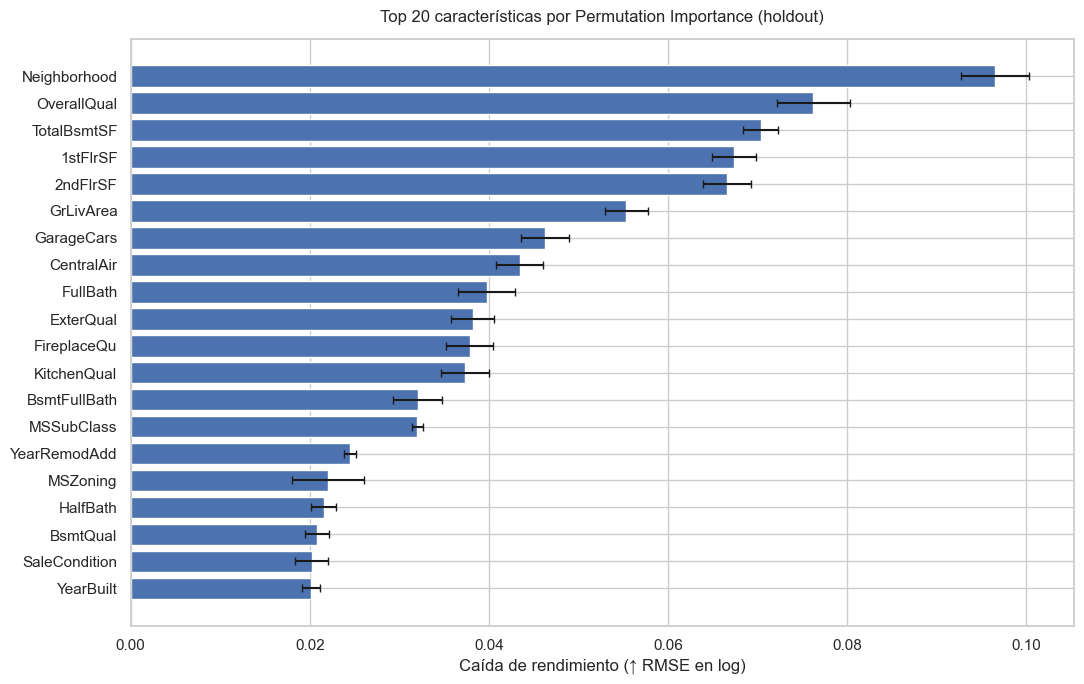

Figura guardada en: ../reports/figures/permutation_importance_top20.png


In [136]:
# 4.1. Permutation Importance (holdout estratificado)
import os, time, json
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance

# ----------------------------
# Configuraci√≥n
# ----------------------------
RANDOM_STATE = 42
HOLDOUT_FRACTION = 0.20         # 20% para PI
N_REPEATS = 7                    # repeticiones (equilibrio se√±al/tiempo)
TOP_K = 20                       # Top-K a graficar
RUN_ALL = int(os.getenv("RUN_ALL", "0"))  # 0 por defecto; pon 1 para forzar todo
FORCE_RECOMPUTE_PI = 0           # pon 1 para rehacer PI aunque exista CSV

MODEL_PATH = "../models/best_model.joblib"
TRAIN_PATH = "../data/raw/train.csv"
PI_CSV_PATH = "../reports/data/permutation_importance_holdout.csv"
PI_FIG_PATH = "../reports/figures/permutation_importance_top20.png"

np.random.seed(RANDOM_STATE)

# ----------------------------
# Carga de artefactos y datos
# ----------------------------
if not os.path.exists(MODEL_PATH):
    raise FileNotFoundError(
        f"No se encontr√≥ el modelo final en {MODEL_PATH}. "
        f"Ejecuta antes el benchmark y el entrenamiento final."
    )
final_model = joblib.load(MODEL_PATH)

if not os.path.exists(TRAIN_PATH):
    raise FileNotFoundError(f"No se encontr√≥ el dataset de entrenamiento en {TRAIN_PATH}.")

df = pd.read_csv(TRAIN_PATH)
if 'Id' in df.columns:
    df = df.drop(columns=['Id'])

if 'SalePrice' not in df.columns:
    raise ValueError("El dataset no contiene la columna 'SalePrice'.")

X = df.drop('SalePrice', axis=1)
y = np.log1p(df['SalePrice'])

# ----------------------------
# Holdout estratificado por deciles de y(log)
# ----------------------------
y_deciles = pd.qcut(y, q=10, labels=False, duplicates='drop')
X_pi, _, y_pi, _ = train_test_split(
    X, y,
    test_size=1.0 - HOLDOUT_FRACTION,
    random_state=RANDOM_STATE,
    stratify=y_deciles
)
print(f"Holdout para PI: {len(X_pi)} filas ({HOLDOUT_FRACTION:.0%} del total).")

# ----------------------------
# Saltar si ya existe (a menos que forcemos)
# ----------------------------
os.makedirs(os.path.dirname(PI_CSV_PATH), exist_ok=True)
os.makedirs(os.path.dirname(PI_FIG_PATH), exist_ok=True)

if os.path.exists(PI_CSV_PATH) and not (RUN_ALL or FORCE_RECOMPUTE_PI):
    print(f"Existe {PI_CSV_PATH}. Saltando c√°lculo (FORCE_RECOMPUTE_PI=0).")
    perm_importance_df = pd.read_csv(PI_CSV_PATH)
else:
    # ----------------------------
    # Permutation Importance
    # ----------------------------
    print(f"Calculando Permutation Importance (n_repeats={N_REPEATS}, n_jobs=-1)...")
    t0 = time.time()
    pi = permutation_importance(
        estimator=final_model,
        X=X_pi,
        y=y_pi,
        n_repeats=N_REPEATS,
        random_state=RANDOM_STATE,
        n_jobs=-1,
        scoring='neg_root_mean_squared_error'  # RMSE en log
    )
    elapsed = time.time() - t0
    print(f"PI completada en {elapsed:.1f}s.")

    perm_importance_df = (
        pd.DataFrame({
            'feature': X_pi.columns,
            'importance_mean': pi.importances_mean,
            'importance_std':  pi.importances_std
        })
        .sort_values('importance_mean', ascending=False)
        .reset_index(drop=True)
    )

    # Guardar CSV
    perm_importance_df.to_csv(PI_CSV_PATH, index=False)
    print(f"Permutation Importance guardada en: {PI_CSV_PATH}")

# ----------------------------
# Mostrar Top-K (texto) y gr√°fico
# ----------------------------
print("\nTop 15 caracter√≠sticas por PI (holdout):")
display(perm_importance_df.head(15).round(6))

top_df = perm_importance_df.head(TOP_K).iloc[::-1]  # invertir para barh ascendente
plt.figure(figsize=(11, 7))
plt.barh(top_df['feature'], top_df['importance_mean'],
         xerr=top_df['importance_std'], capsize=3)
plt.title('Top 20 caracter√≠sticas por Permutation Importance (holdout)', pad=12)
plt.xlabel('Ca√≠da de rendimiento (‚Üë RMSE en log)')
plt.tight_layout()
plt.savefig(PI_FIG_PATH, dpi=150)
plt.show()
print(f"Figura guardada en: {PI_FIG_PATH}")


### Conclusiones 4.1 ‚Äî Importancia Global de Caracter√≠sticas (Permutation Importance)

#### Dise√±o experimental
- **Muestra:** holdout estratificado del 20% (n = 292).  
- **Repeticiones:** 7.  
- **M√©trica:** RMSE en escala logar√≠tmica.  
- Evita medir sobre datos de validaci√≥n ‚Üí reduce sesgo optimista.  
- La PI cuantifica el incremento del error al desordenar una variable ‚Üí impacto predictivo *agn√≥stico al modelo*, m√°s robusto que las importancias nativas.  

---

#### Hallazgos principales

1. **Ubicaci√≥n como determinante dominante**  
   - *Neighborhood* encabeza el ranking (ŒîRMSE(log) ‚âà 0.0965; œÉ ‚âà 0.0038; CV ‚âà 3,9%).  
   - Estimaci√≥n estable ‚Üí evidencia fuerte heterogeneidad espacial de precios.  
   - Captura diferencias de accesibilidad, servicios, estatus socioecon√≥mico y atributos no observados.  

2. **Calidad constructiva y de acabados**  
   - *OverallQual* (‚âà 0.0762), seguida de *ExterQual*, *KitchenQual* y *FireplaceQu* (‚âà 0.038‚Äì0.038).  
   - El modelo ‚Äúpaga‚Äù calidad percibida ‚Üí coherente con literatura de *hedonic pricing*.  

3. **Superficie/metros como bloque de se√±al**  
   - *TotalBsmtSF, 1stFlrSF, 2ndFlrSF, GrLivArea* (‚âà 0.067‚Äì0.055).  
   - Variables correlacionadas reparten importancia.  
   - Conclusi√≥n: tama√±o habitable = motor esencial del valor.  

4. **Caracter√≠sticas funcionales y modernizaci√≥n**  
   - *GarageCars, FullBath, BsmtFullBath* (‚âà 0.046‚Äì0.032).  
   - *CentralAir* (‚âà 0.043) y *YearRemodAdd* (‚âà 0.0245) ‚Üí efecto independiente del tama√±o.  

---

#### Interpretaci√≥n y solidez
- Desviaciones est√°ndar bajas (ej. *OverallQual* œÉ‚âà0.0041; CV‚âà5,3%) ‚Üí ranking estable en holdout.  
- Patr√≥n global: **ubicaci√≥n + calidad + metros**.  
- Coherente con expectativas econ√≥micas y rendimiento global del modelo ExtraTrees (RMSE(log) OOF ‚âà 0.133; error relativo t√≠pico ‚âà 14,2%).  

---

#### Limitaciones y cautelas
- **Colinealidad:** PI reparte peso entre predictores correlacionados ‚Üí no implica causalidad ni peso exclusivo.  
- **Categ√≥ricas de alta cardinalidad:** *Neighborhood* (OHE) dif√≠cil de interpretar en PDP ‚Üí preferible agrupar por *tiers* o usar ALE/SHAP.  
- **Equidad y sesgo:** Dependencia fuerte de *Neighborhood* puede reflejar diferencias socioecon√≥micas ‚Üí auditar error por vecindario y cuartiles de precio.  

---

#### Implicaciones para el negocio
- El modelo asigna valor adicional a:  
  1. **Ubicaci√≥n (barrio)**  
  2. **Calidad estructural y de acabados**  
  3. **Superficie √∫til**  
- Palancas accionables: reformas que mejoren calidad percibida y ampliaciones (donde sean posibles) tender√°n a trasladarse a precio.  
- Potencial de revalorizaci√≥n depende del barrio ‚Üí estrategias de inversi√≥n deben contextualizarse geogr√°ficamente.  

---

#### Recomendaciones metodol√≥gicas inmediatas
- Complementar PI con **PDP/ICE** en variables top (*OverallQual, GrLivArea/TotalBsmtSF, GarageCars*) aplicando retrotransformaci√≥n con *smearing*.  
- Analizar estabilidad de importancias v√≠a *folds* (artefactos ya disponibles) y contrastar con PI OOF para visi√≥n m√°s conservadora.  
- Para *Neighborhood*: preferir **PDP 2D con interacciones** relevantes (ej. *OverallQual √ó GrLivArea*) o resumir en *tiers* para mejorar legibilidad.  

---

#### Puente hacia la Secci√≥n 8.2 ‚Äî Efectos Parciales (PDP/ICE)
A partir del ranking global, el siguiente paso es caracterizar c√≥mo var√≠a la predicci√≥n cuando modificamos cada predictor clave manteniendo los dem√°s constantes.  

En la **Secci√≥n 8.2** construiremos PDP e ICE para las variables m√°s influyentes y reportaremos **elasticidades en escala monetaria (USD)** aplicando retrotransformaci√≥n con correcci√≥n de Duan por *fold*, de modo que las conclusiones sean directamente interpretables en t√©rminos de negocio.


### 4.2. Efectos Parciales (PDP/ICE) en escala monetaria

Tras identificar las variables m√°s influyentes mediante **Permutation Importance** (Secci√≥n 8.1), el siguiente paso es caracterizar **c√≥mo afectan a la predicci√≥n del precio**.  

Para ello, se estiman **Gr√°ficos de Dependencia Parcial (PDP)** y **Curvas de Efecto Individual (ICE)** sobre el pipeline ganador (**ExtraTrees**), recuperando las predicciones a USD mediante la **correcci√≥n de Duan (*smearing*)**.

---

#### Objetivos
- **PDP:** muestran el efecto marginal promedio de una variable manteniendo el resto fijas.  
- **ICE:** exponen la heterogeneidad entre observaciones ‚Üí permiten detectar interacciones o no linealidades.  
- **Elasticidades:** se reportan aproximaciones de variaciones en USD ante cambios plausibles en cada predictor ‚Üí lectura orientada al negocio.  

---




Modelo y datos cargados.
Factor de smearing = 1.009709 (fuente: oof)
Variables seleccionadas para PDP/ICE: ['Neighborhood', 'OverallQual', 'TotalBsmtSF', '1stFlrSF']
Background PDP: 438 filas | Muestras ICE: 20


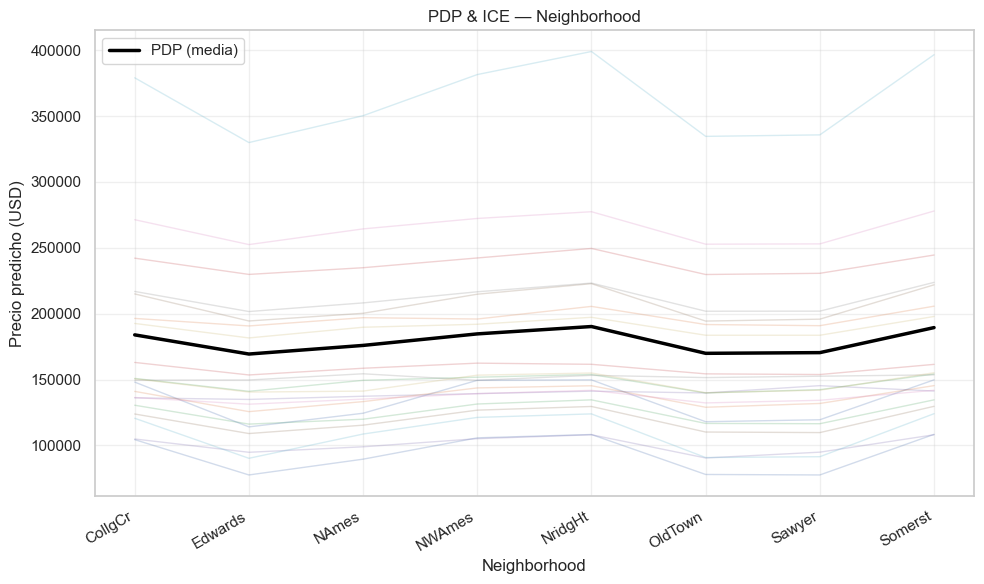

Figura guardada en: ../reports/figures\pdp_ice_Neighborhood.png


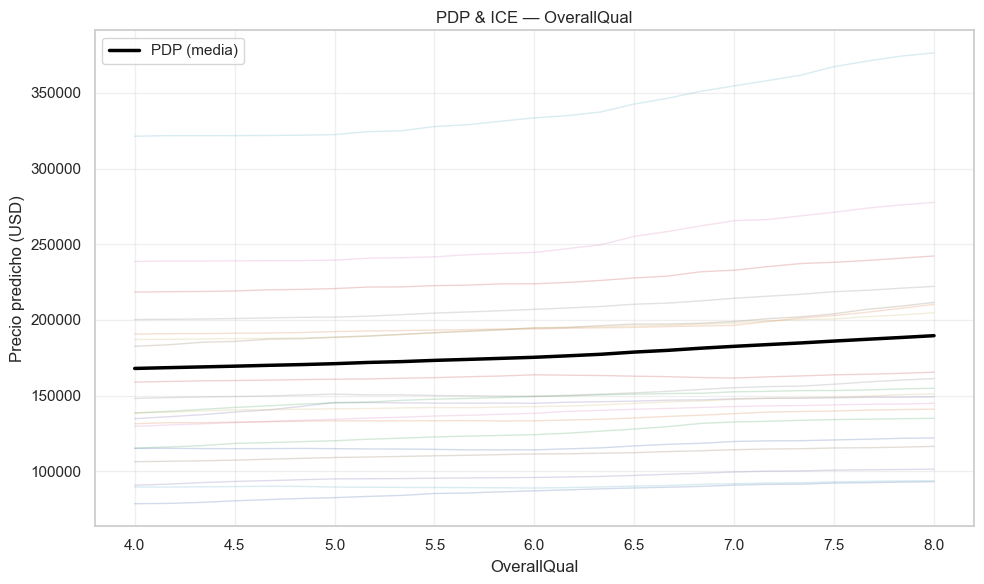

Figura guardada en: ../reports/figures\pdp_ice_OverallQual.png


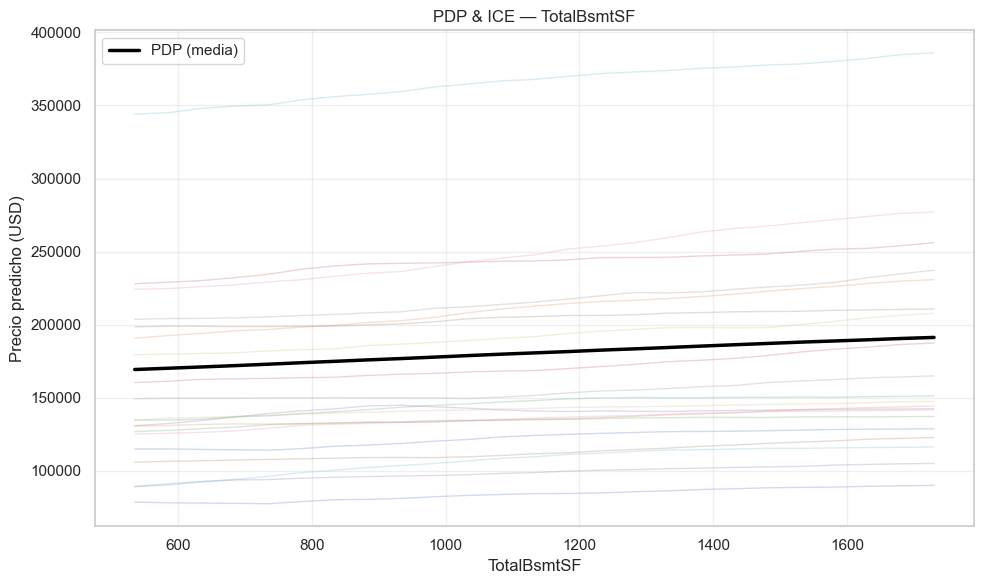

Figura guardada en: ../reports/figures\pdp_ice_TotalBsmtSF.png


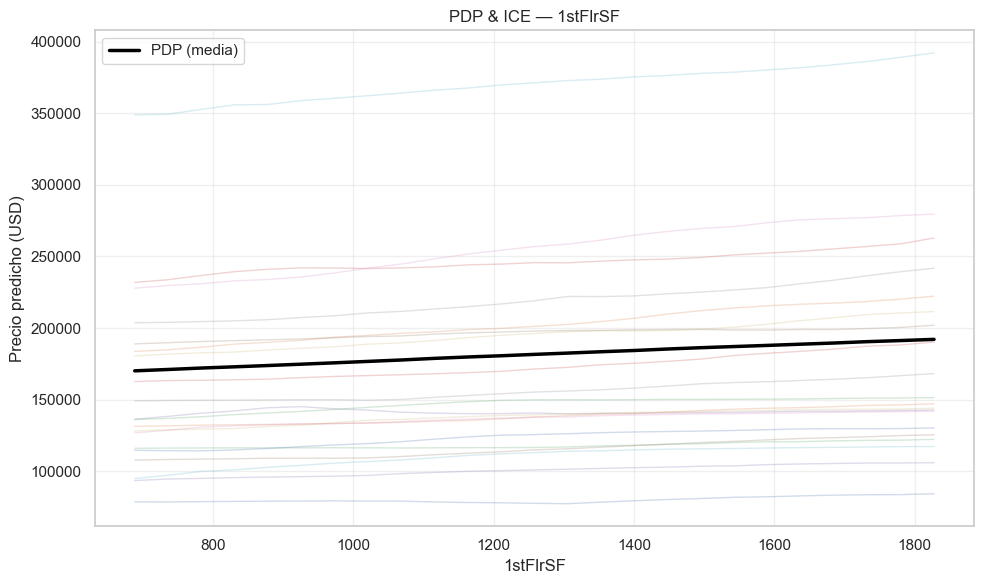

Figura guardada en: ../reports/figures\pdp_ice_1stFlrSF.png
Resumen PDP/ICE guardado en: ../reports/data\pdp_ice_summary.json

8.2 completado en 10.1s.


In [139]:
# =========================
# 4.2 PDP & ICE (USD, con smearing)
# =========================
import os
import json
import time
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# -----------------------------
# 0) Rutas y configuraci√≥n
# -----------------------------
MODEL_PATH = '../models/best_model.joblib'
TRAIN_PATH = '../data/raw/train.csv'
OOF_CSV_PATH = '../reports/data/oof_predictions_benchmark.csv'
PI_CSV_PATH  = '../reports/data/permutation_importance_holdout.csv'

FIG_DIR  = '../reports/figures'
DATA_DIR = '../reports/data'
os.makedirs(FIG_DIR, exist_ok=True)
os.makedirs(DATA_DIR, exist_ok=True)

BEST_MODEL_NAME = 'ExtraTrees'   # Alinear con el mejor del benchmark

# Si quieres forzar manualmente las variables a graficar, pon aqu√≠ una lista;
# si lo dejas en None, usar√° el CSV de PI (si existe) o caer√° a un conjunto por defecto.
FEATURES_TO_PLOT = None  # p.ej.: ['Neighborhood', 'OverallQual', 'TotalBsmtSF', '1stFlrSF']

# Densidad del grid para num√©ricas y tope de categor√≠as para categ√≥ricas
GRID_POINTS_NUM = 25
MAX_CATS = 8

# Muestras para el fondo del PDP y n¬∫ de curvas ICE
PDP_BG_FRACTION = 0.30
ICE_N = 20

# Semilla
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

# -----------------------------
# 1) Carga de artefactos y datos
# -----------------------------
t0 = time.time()
final_model = joblib.load(MODEL_PATH)

df = pd.read_csv(TRAIN_PATH)
if 'Id' in df.columns:
    df = df.drop(columns=['Id'])

X = df.drop(columns=['SalePrice'])
y_log = np.log1p(df['SalePrice'])

print("Modelo y datos cargados.")

# -----------------------------
# 2) Factor de smearing (global)
#    - intenta a partir del OOF para el mejor modelo
#    - fallback 1.0 si no se puede estimar
# -----------------------------
def compute_smearing_from_oof(oof_df, model_name):
    # Prioridad 1: usar y_log y oof_log_model para smearing = mean(exp(y_log - oof))
    # Prioridad 2: si ya hay columna de predicci√≥n en USD, puede calcularse indirectamente (no necesario aqu√≠)
    col_log = f'oof_log_{model_name}'
    if 'y_log' in oof_df.columns and col_log in oof_df.columns:
        resid = oof_df['y_log'] - oof_df[col_log]
        return float(np.exp(resid).mean())
    return 1.0

smearing = 1.0
if os.path.exists(OOF_CSV_PATH):
    try:
        oof_df = pd.read_csv(OOF_CSV_PATH)
        smearing = compute_smearing_from_oof(oof_df, BEST_MODEL_NAME)
        src = 'oof'
    except Exception:
        smearing = 1.0
        src = 'fallback(1.0)'
else:
    smearing = 1.0
    src = 'fallback(1.0)'

print(f"Factor de smearing = {smearing:.6f} (fuente: {src})")

# -----------------------------
# 3) Selecci√≥n de variables a graficar
# -----------------------------
if FEATURES_TO_PLOT is None:
    feats = None
    if os.path.exists(PI_CSV_PATH):
        try:
            pi_df = pd.read_csv(PI_CSV_PATH)
            # Espera columnas: 'feature', 'importance_mean'
            feats = (pi_df.sort_values('importance_mean', ascending=False)
                          .head(4)['feature']
                          .tolist())
        except Exception:
            feats = None

    if feats is None:
        # Fallback curado a mano: 2 continuas + 1 ordinal + 1 categ√≥rica
        candidate_list = [c for c in ['Neighborhood','OverallQual','TotalBsmtSF','1stFlrSF']
                          if c in X.columns]
        if len(candidate_list) == 0:
            # √∫ltimo fallback: primeras 4 columnas
            candidate_list = X.columns[:4].tolist()
        FEATURES_TO_PLOT = candidate_list
    else:
        FEATURES_TO_PLOT = feats

print("Variables seleccionadas para PDP/ICE:", FEATURES_TO_PLOT)

# -----------------------------
# 4) Conjuntos para PDP/ICE
#    - Fondo (PDP): muestreo estratificado para rapidez
#    - ICE: pocas instancias (20) para no saturar
# -----------------------------
X_bg, _ybg = train_test_split(
    X, test_size=(1.0 - PDP_BG_FRACTION), random_state=RANDOM_STATE,
    stratify=pd.qcut(y_log, q=10, labels=False, duplicates='drop')
)
# Submuestreo ICE: 20 instancias (o menos si no hay tantas)
ICE_N = min(ICE_N, len(X_bg))
X_ice = X_bg.sample(n=ICE_N, random_state=RANDOM_STATE)

print(f"Background PDP: {len(X_bg)} filas | Muestras ICE: {len(X_ice)}")

# -----------------------------
# 5) Funciones auxiliares: predicci√≥n en USD, PDP e ICE vectorizados
# -----------------------------
def predict_usd(model, X_df):
    """
    Predicci√≥n en USD a partir del pipeline final que devuelve log1p(y).
    Inversi√≥n: y_hat = exp(≈∑_log) * smearing - 1
    """
    y_pred_log = model.predict(X_df)
    y_pred_usd = (np.exp(y_pred_log) * smearing) - 1.0
    return np.asarray(y_pred_usd).ravel()

def build_grid_for_feature(X_df, feature_name, n_points=GRID_POINTS_NUM, max_cats=MAX_CATS):
    s = X_df[feature_name]
    if pd.api.types.is_numeric_dtype(s):
        lo, hi = s.quantile([0.05, 0.95])
        if not np.isfinite(lo) or not np.isfinite(hi) or lo == hi:
            lo, hi = s.min(), s.max()
        if lo == hi:
            # todo constante: un solo punto
            grid = np.array([lo])
        else:
            grid = np.linspace(lo, hi, n_points)
    else:
        cats = s.astype('object').value_counts().index.tolist()
        grid = np.array(cats[:min(len(cats), max_cats)], dtype=object)
    return grid

def pdp_curve(feature_name, X_background, grid):
    """
    PDP vectorizado: sustituye la columna por cada punto del grid y promedia predicciones.
    Devuelve: grid_values, pdp_means (USD)
    """
    blocks = []
    for v in grid:
        Xb = X_background.copy()
        Xb[feature_name] = v
        Xb["_pdp_value_"] = v
        blocks.append(Xb)
    X_big = pd.concat(blocks, ignore_index=True)

    y_usd_big = predict_usd(final_model, X_big)
    df_big = pd.DataFrame({
        "_pdp_value_": X_big["_pdp_value_"].values,
        "_pred_usd_": y_usd_big
    })
    agg = df_big.groupby("_pdp_value_")["_pred_usd_"].mean()
    grid_out = np.array(agg.index.tolist(), dtype=object)
    pdp_vals = agg.values
    return grid_out, pdp_vals

def ice_curves(feature_name, X_instances, grid):
    """
    ICE vectorizado: para cada fila, genera todas las variantes del grid y predice en bloque.
    Devuelve: matriz (n_instancias x n_grid) en USD.
    """
    all_curves = []
    for i in range(len(X_instances)):
        row = X_instances.iloc[[i]].copy()
        X_rep = pd.concat([row]*len(grid), ignore_index=True)
        X_rep[feature_name] = grid
        y_usd = predict_usd(final_model, X_rep)          # -> (n_grid,)
        y_usd = np.asarray(y_usd).ravel().astype(float)  # escalar por punto
        all_curves.append(y_usd)
    return np.vstack(all_curves)

# -----------------------------
# 6) C√°lculo y gr√°ficas por variable
# -----------------------------
PDP_SUMMARY = []

for feat in FEATURES_TO_PLOT:
    if feat not in X.columns:
        print(f"[AVISO] '{feat}' no est√° en X; se omite.")
        continue

    # Grid y curvas
    grid = build_grid_for_feature(X_bg, feat, n_points=GRID_POINTS_NUM, max_cats=MAX_CATS)
    grid_vals, pdp_vals = pdp_curve(feat, X_bg, grid)
    ice_mat = ice_curves(feat, X_ice, grid_vals)

    # Resumen de ‚Äúelasticidad‚Äù aproximada: variaci√≥n relativa entre extremos del PDP
    if pd.api.types.is_numeric_dtype(X_bg[feat]):
        if len(pdp_vals) >= 2 and pdp_vals[0] > 0:
            rel_change = (pdp_vals[-1] - pdp_vals[0]) / pdp_vals[0]
        else:
            rel_change = np.nan
        PDP_SUMMARY.append({
            'feature': feat,
            'grid_lo': float(grid_vals[0]) if len(grid_vals)>0 and np.isscalar(grid_vals[0]) else str(grid_vals[0]),
            'grid_hi': float(grid_vals[-1]) if len(grid_vals)>0 and np.isscalar(grid_vals[-1]) else str(grid_vals[-1]),
            'pdp_lo_usd': float(pdp_vals[0]) if len(pdp_vals)>0 else np.nan,
            'pdp_hi_usd': float(pdp_vals[-1]) if len(pdp_vals)>0 else np.nan,
            'approx_relative_change': float(rel_change) if np.isfinite(rel_change) else np.nan
        })
    else:
        PDP_SUMMARY.append({
            'feature': feat,
            'categories_plotted': list(map(lambda x: x if isinstance(x, (str,int,float)) else str(x), grid_vals)),
            'pdp_mean_usd_min': float(np.nanmin(pdp_vals)) if len(pdp_vals)>0 else np.nan,
            'pdp_mean_usd_max': float(np.nanmax(pdp_vals)) if len(pdp_vals)>0 else np.nan
        })

    # ---------------- Plot ----------------
    plt.figure(figsize=(10, 6))
    # ICE (muchas l√≠neas tenues)
    for i in range(ice_mat.shape[0]):
        plt.plot(grid_vals, ice_mat[i, :], alpha=0.25, linewidth=1)

    # PDP (l√≠nea gruesa)
    plt.plot(grid_vals, pdp_vals, linewidth=2.5, label='PDP (media)', color='black')

    plt.title(f'PDP & ICE ‚Äî {feat}')
    plt.ylabel('Precio predicho (USD)')
    plt.xlabel(feat)
    if not pd.api.types.is_numeric_dtype(X_bg[feat]):
        plt.xticks(rotation=30, ha='right')
    plt.grid(alpha=0.3)
    plt.legend(loc='best')
    out_path = os.path.join(FIG_DIR, f"pdp_ice_{feat}.png")
    plt.tight_layout()
    plt.savefig(out_path, dpi=150)
    plt.show()
    print(f"Figura guardada en: {out_path}")

# -----------------------------
# 7) Guardar resumen num√©rico
# -----------------------------
summary_path = os.path.join(DATA_DIR, "pdp_ice_summary.json")
with open(summary_path, 'w', encoding='utf-8') as f:
    json.dump(PDP_SUMMARY, f, ensure_ascii=False, indent=2)
print(f"Resumen PDP/ICE guardado en: {summary_path}")

print(f"\n8.2 completado en {time.time()-t0:.1f}s.")


### 4.2. Efectos parciales (PDP) e individuales (ICE) ‚Äî Conclusiones

#### Contexto
- **Muestra:** fondo estratificado de 438 observaciones (30%).  
- **ICE:** 20 trayectorias.  
- **Correcci√≥n:** retrotransformaci√≥n a USD con *smearing* (factor 1.0097).  
- **Variables analizadas:** *Neighborhood*, *OverallQual*, *TotalBsmtSF* y *1stFlrSF*.  

---

#### Hallazgos principales

1. **Neighborhood (categ√≥rica) ‚Äî efecto dominante y no lineal**  
   - PDP: diferencias claras entre barrios ‚Üí *NridgHt* y *Somerst* concentran precios m√°s altos, *Edwards* y *OldTown* por debajo de la media.  
   - ICE: gran dispersi√≥n entre categor√≠as ‚Üí el cambio de vecindario no afecta a todas las viviendas en paralelo (*ceteris paribus*).  
   - Implicaci√≥n: el componente locacional es un determinante estructural y sus efectos dependen de interacciones con calidad, superficie o antig√ºedad.  

2. **OverallQual ‚Äî relaci√≥n mon√≥tona y estable**  
   - PDP: relaci√≥n creciente y suave en el rango [4‚Äì8].  
   - ICE: curvas casi paralelas ‚áí efecto consistente y baja heterogeneidad condicional.  
   - Interpretaci√≥n: subir un punto en calidad global se asocia con un incremento medio apreciable del precio.  

3. **TotalBsmtSF y 1stFlrSF ‚Äî primas de tama√±o lineales**  
   - PDP: pendientes positivas casi lineales en 500‚Äì1.700 ft¬≤.  
   - ICE: paralelismo razonable ‚áí elasticidades estables.  
   - Conclusi√≥n: los aumentos de superficie generan incrementos casi proporcionales en el precio, sin umbrales ni saturaciones fuertes en el rango observado.  

---

#### Estabilidad y riesgo de extrapolaci√≥n
- Proximidad entre PDP e ICE en *OverallQual* y superficies ‚Üí bajo riesgo de efectos espurios por interacciones no modeladas.  
- En *Neighborhood*, abanico ICE m√°s abierto ‚Üí efecto locacional depende del perfil del inmueble.  
- Recomendaci√≥n: interpretar el PDP de *Neighborhood* como promedio condicional, no como prima fija universal.  

---

#### Implicaciones para negocio y modelado
- **Localizaci√≥n y calidad** = palancas de valor robustas ‚Üí deben ponderarse prioritariamente en pricing y tasaci√≥n.  
- **Primas por superficie** = estables ‚Üí √∫tiles para reglas r√°pidas de valoraci√≥n (ajustes por m¬≤/ft¬≤).  
- **Heterogeneidad por vecindario** ‚Üí recomendable segmentar diagn√≥sticos y m√©tricas por zona para controlar sesgos y estabilidad (ya previsto en an√°lisis por segmentos).  

---

#### Limitaciones y control de calidad
- Los PDP/ICE se calcularon sobre una muestra de fondo; aunque estratificada, no sustituyen el an√°lisis completo en todo el espacio de covariables.  
- En *Neighborhood* solo se graficaron algunas categor√≠as ‚Üí conviene rotar categor√≠as o repetir PDP por subconjuntos.  
- Los efectos son *ceteris paribus*: cambios simult√°neos grandes (ej. calidad + superficie) pueden generar respuestas distintas a las marginales.  

---

### 4.3. Diagn√≥stico de errores por segmentos

Una vez interpretados los efectos marginales de las variables clave (Secci√≥n 8.2), el siguiente paso es evaluar si el modelo presenta **sesgos sistem√°ticos en distintos subgrupos del mercado**.  

Este diagn√≥stico es esencial para garantizar **equidad, estabilidad y utilidad operativa** del modelo en producci√≥n.

---

#### Aspectos analizados

1. **Distribuci√≥n de residuos**  
   - Histograma y QQ-plot para detectar asimetr√≠as, colas pesadas u *outliers*.  
   - Permite comprobar la validez del supuesto de normalidad aproximada de los errores.  

2. **Rendimiento por cuartiles de precio**  
   - M√©tricas: **MdAE** y **MdAPE** por cuartil.  
   - Objetivo: identificar heteroscedasticidad (errores relativos mayores en inmuebles baratos o caros).  

3. **Rendimiento por vecindario**  
   - C√°lculo de MdAE por barrio.  
   - Ranking de *Top* (mejor desempe√±o) y *Bottom* (peor desempe√±o).  
   - Ayuda a descubrir posibles **sesgos geogr√°ficos**.  

4. **Calibraci√≥n global**  
   - Gr√°fico predicho vs. real (l√≠nea de 45¬∞).  
   - Control r√°pido de subvaloraci√≥n o sobrevaloraci√≥n sistem√°tica.  

---

#### Metodolog√≠a
- Se trabajar√° exclusivamente con los **artefactos generados en el benchmark**:  
  - Predicciones **OOF** (out-of-fold).  
  - M√©tricas precomputadas.  
- No es necesario recomputar el entrenamiento ‚Üí eficiencia y reproducibilidad garantizadas.  

---


Modelo seleccionado para diagn√≥stico: ExtraTrees


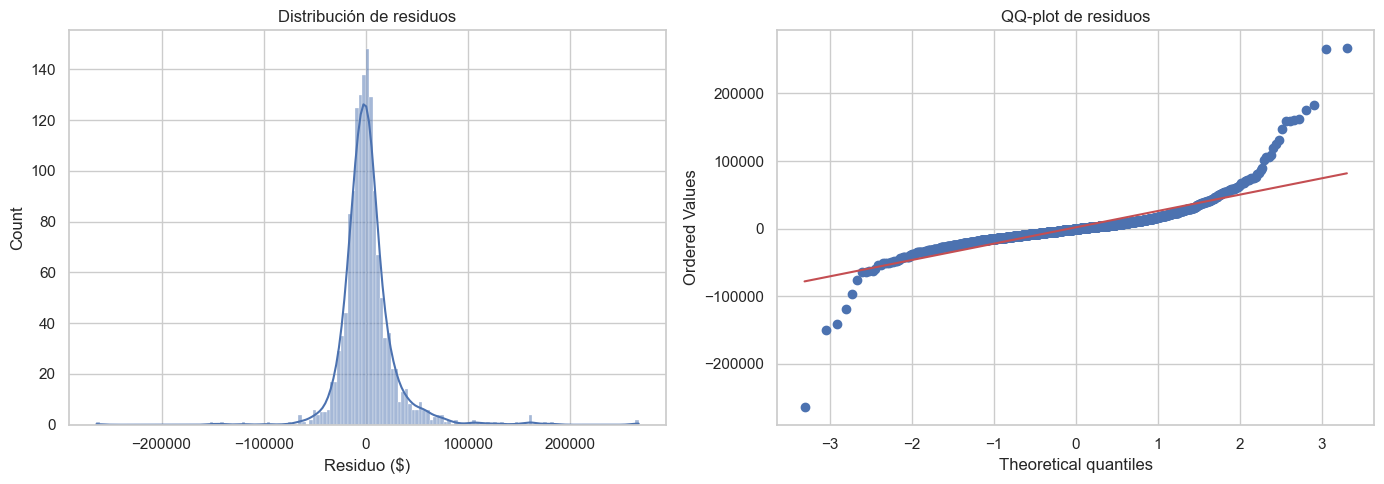

Resumen residuos ‚Üí skewness=1.798, kurtosis(exceso)=23.938

Rendimiento por cuartil de precio (MdAE/MdAPE):
  price_quartile    n    MdAE_$  MdAPE_%
0      Q1 (Bajo)  365   9038.54     8.07
1             Q2  367   6931.46     4.75
2             Q3  366   8810.38     4.76
3      Q4 (Alto)  362  17941.67     6.59


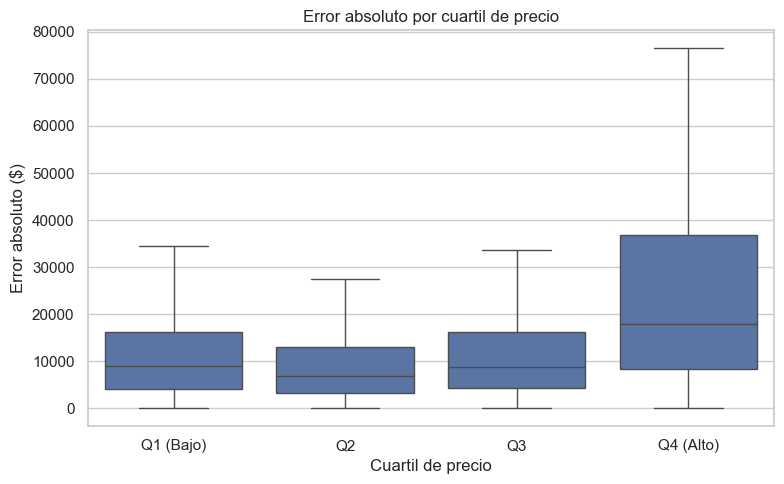


Top 10 vecindarios con menor MdAE ($):
   Neighborhood    n   MdAE_$  MdAPE_%
13      NPkVill    9  3469.32     2.34
8       Gilbert   79  6181.77     3.31
12        NAmes  225  6646.07     4.64
19       Sawyer   74  7662.05     5.47
11      Mitchel   49  8084.19     4.93
10      MeadowV   17  8399.30     7.25
2        BrDale   16  8715.75     8.51
1       Blueste    2  8931.44     6.63
5       CollgCr  150  9244.79     4.71
20      SawyerW   59  9548.78     4.62

Bottom 10 vecindarios con mayor MdAE ($):
   Neighborhood   n    MdAE_$  MdAPE_%
22      StoneBr  25  21508.55     7.82
6       Crawfor  51  19196.29    10.64
15      NoRidge  41  18910.10     6.52
16      NridgHt  77  18517.20     5.85
24      Veenker  11  17505.93     8.20
4       ClearCr  28  17299.33    10.22
18        SWISU  25  14819.07     9.34
0       Blmngtn  17  14816.81     9.20
23       Timber  38  13832.03     6.33
9        IDOTRR  37  12986.47    11.81


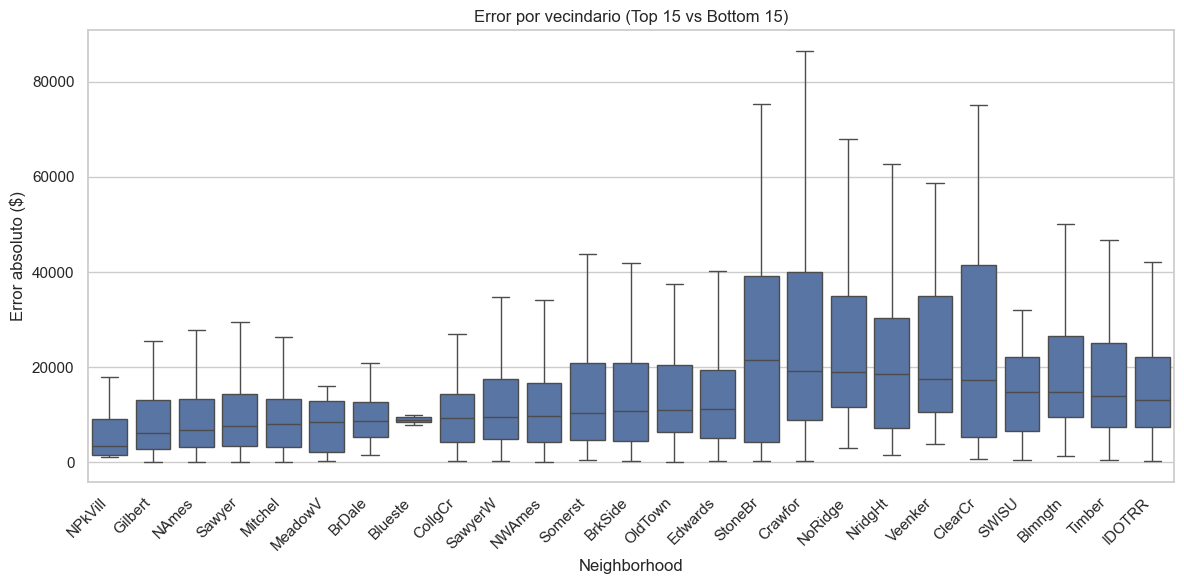

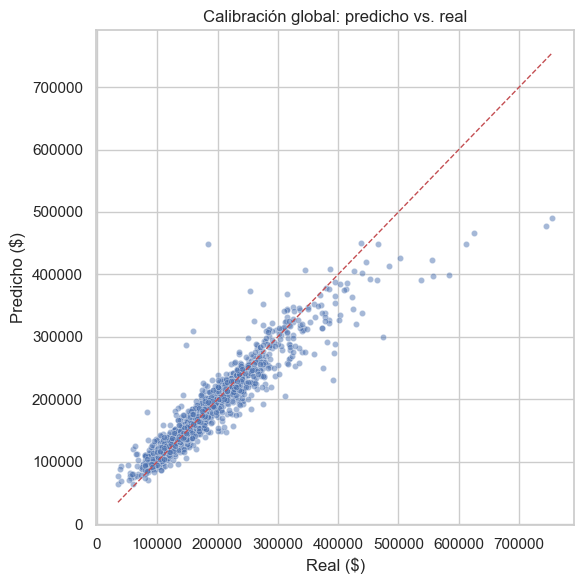


Resumen global de errores:
  MAE   = $16,087
  MdAE  = $9,910
  MdAPE = 6.07%

Figuras guardadas en:
  ‚Ä¢ ../reports/figures\residuals_hist_qq.png
  ‚Ä¢ ../reports/figures\abs_error_by_quartile.png
  ‚Ä¢ ../reports/figures\abs_error_by_neighborhood_top_bottom.png
  ‚Ä¢ ../reports/figures\y_true_vs_y_pred.png

Tablas guardadas en:
  ‚Ä¢ ../reports/data\errors_by_quartile.csv
  ‚Ä¢ ../reports/data\errors_by_neighborhood.csv


In [142]:

# 4.3 Diagn√≥stico de errores por segmentos
# -------------------------------------------------------------------
import os, json, re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set_theme(style="whitegrid")

OOF_CSV_PATH       = '../reports/data/oof_predictions_benchmark.csv'
METRICS_JSON_PATH  = '../reports/data/benchmark_metrics.json'
TRAIN_PATH         = '../data/raw/train.csv'
FIG_DIR            = '../reports/figures'
DATA_OUT_DIR       = '../reports/data'
os.makedirs(FIG_DIR, exist_ok=True)
os.makedirs(DATA_OUT_DIR, exist_ok=True)

# ---------- Utilidades ----------
def _try_load_metrics_best_model(path):
    """
    Devuelve el nombre del mejor modelo seg√∫n rmse_log si el JSON es legible; si no, None.
    Acepta formatos:
      - dict con 'best_model_name'
      - dict con 'rmse_log': {modelo: valor}
      - dict por modelo con {'rmse_log': ...}
      - lista de dicts [{'model':..., 'rmse_log':...}, ...]
      - string que contiene un JSON v√°lido de cualquiera de los anteriores
    """
    if not os.path.exists(path):
        print(f"Aviso: no existe {path}")
        return None
    try:
        with open(path, 'r', encoding='utf-8') as f:
            obj = json.load(f)
        if isinstance(obj, str):
            try:
                obj = json.loads(obj)
            except Exception:
                return None
        if isinstance(obj, dict):
            if 'best_model_name' in obj:
                return obj['best_model_name']
            if 'rmse_log' in obj and isinstance(obj['rmse_log'], dict):
                return min(obj['rmse_log'].items(), key=lambda kv: float(kv[1]))[0]
            cand = []
            for k, v in obj.items():
                if isinstance(v, dict) and 'rmse_log' in v:
                    cand.append((k, float(v['rmse_log'])))
            if cand:
                return min(cand, key=lambda t: t[1])[0]
        if isinstance(obj, list):
            cand = []
            for row in obj:
                if isinstance(row, dict) and 'model' in row and 'rmse_log' in row:
                    cand.append((row['model'], float(row['rmse_log'])))
            if cand:
                return min(cand, key=lambda t: t[1])[0]
    except Exception as e:
        print(f"Aviso: no se pudo leer {path}: {e}")
    return None

def _ensure_usd_predictions(oof_df: pd.DataFrame) -> pd.DataFrame:
    """
    Garantiza que existan columnas 'oof_usd_*' y 'y_usd'.
    - Si existen 'oof_usd_*' y 'y_usd', devuelve tal cual.
    - Si existen 'oof_eur_*'/'y_eur', crea alias en USD (mismo contenido).
    - Si solo hay 'oof_log_*' + 'y_log' + 'fold_id', reconstruye USD con smearing por fold.
    """
    usd_cols = [c for c in oof_df.columns if c.startswith('oof_usd_')]
    if 'y_usd' in oof_df.columns and usd_cols:
        return oof_df

    # Alias desde 'eur' si existen
    eur_cols = [c for c in oof_df.columns if c.startswith('oof_eur_')]
    if eur_cols:
        for c in eur_cols:
            oof_df['oof_usd_' + c.replace('oof_eur_', '')] = oof_df[c]
        if 'y_eur' in oof_df.columns and 'y_usd' not in oof_df.columns:
            oof_df['y_usd'] = oof_df['y_eur']
        return oof_df

    # Reconstrucci√≥n desde log si es posible
    log_cols = [c for c in oof_df.columns if c.startswith('oof_log_')]
    if log_cols and {'y_log', 'fold_id'}.issubset(oof_df.columns):
        print("No se encontraron columnas oof_usd_*. Reconstruyendo desde oof_log_* con smearing por fold...")
        y_log = oof_df['y_log'].astype(float)
        fold_id = oof_df['fold_id'].astype(int)
        oof_df['y_usd'] = np.expm1(y_log)
        for lc in log_cols:
            pred_log = oof_df[lc].astype(float)
            resid_log = y_log - pred_log
            sf_by_fold = np.exp(resid_log).groupby(fold_id).mean()
            y_pred_usd = np.exp(pred_log) * sf_by_fold.loc[fold_id].values - 1.0
            name = 'oof_usd_' + lc.replace('oof_log_', '')
            oof_df[name] = y_pred_usd
        # Persistimos de vuelta por conveniencia
        try:
            oof_df.to_csv(OOF_CSV_PATH, index=False)
            print(f"OOF actualizado con columnas oof_usd_* guardado en: {OOF_CSV_PATH}")
        except Exception as e:
            print(f"Aviso: no se pudo reescribir el OOF: {e}")
        return oof_df

    raise RuntimeError(
        "No hay columnas 'oof_usd_*' ni es posible reconstruirlas (faltan 'oof_log_*' o 'y_log'/'fold_id'). "
        "Revisa el artefacto OOF generado por el benchmark."
    )

# ---------- Carga artefactos ----------
if not os.path.exists(OOF_CSV_PATH):
    raise FileNotFoundError(f"No se encuentra el OOF en {OOF_CSV_PATH}")
if not os.path.exists(TRAIN_PATH):
    raise FileNotFoundError(f"No se encuentra el train en {TRAIN_PATH}")

oof = pd.read_csv(OOF_CSV_PATH)
df  = pd.read_csv(TRAIN_PATH)
if 'Id' in df.columns:
    df = df.drop(columns='Id')

# Asegurar columnas en USD a partir de log/eur si hace falta
oof = _ensure_usd_predictions(oof)

# Determinar mejor modelo (o fallback por MAE si no hay m√©tricas legibles)
best_model = _try_load_metrics_best_model(METRICS_JSON_PATH)
if best_model is None:
    cand_cols = [c for c in oof.columns if c.startswith('oof_usd_')]
    if not cand_cols:
        raise RuntimeError("No se encuentran columnas 'oof_usd_*' en el OOF; no es posible continuar.")
    maes = {c.replace('oof_usd_', ''): np.mean(np.abs(oof['y_usd'] - oof[c])) for c in cand_cols}
    best_model = min(maes, key=maes.get)

print(f"Modelo seleccionado para diagn√≥stico: {best_model}")

# ---------- DataFrame de errores ----------
y_true = oof['y_usd'].astype(float)
y_pred = oof[f'oof_usd_{best_model}'].astype(float)

errs = pd.DataFrame({
    'y_true': y_true,
    'y_pred': y_pred,
    'residual': y_true - y_pred,
    'abs_err': np.abs(y_true - y_pred),
    'pct_err': np.where(y_true > 0, (y_true - y_pred) / y_true, np.nan)
})

if 'fold_id' in oof.columns:
    errs['fold_id'] = oof['fold_id'].values
if 'Neighborhood' in df.columns and len(df) == len(errs):
    errs['Neighborhood'] = df['Neighborhood'].values

# ---------- 1) Distribuci√≥n de residuos y QQ-plot ----------
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(errs['residual'], kde=True, ax=axes[0])
axes[0].set_title('Distribuci√≥n de residuos')
axes[0].set_xlabel('Residuo ($)')

stats.probplot(errs['residual'], dist="norm", plot=axes[1])
axes[1].set_title('QQ-plot de residuos')
plt.tight_layout()
resid_fig_path = os.path.join(FIG_DIR, 'residuals_hist_qq.png')
plt.savefig(resid_fig_path, dpi=120)
plt.show()

skew = stats.skew(errs['residual'], nan_policy='omit')
kurt = stats.kurtosis(errs['residual'], fisher=True, nan_policy='omit')
print(f"Resumen residuos ‚Üí skewness={skew:.3f}, kurtosis(exceso)={kurt:.3f}")

# ---------- 2) Rendimiento por cuartiles de precio ----------
quartiles = pd.qcut(
    errs['y_true'], q=4,
    labels=['Q1 (Bajo)','Q2','Q3','Q4 (Alto)']
).rename('price_quartile')

# observed=False para evitar el FutureWarning
grp_q = errs.groupby(quartiles, observed=False)

by_quartile = pd.DataFrame({
    'n': grp_q.size(),
    'MdAE_$': grp_q['abs_err'].median()
})
mdape_pct = grp_q['pct_err'].apply(lambda s: np.nanmedian(np.abs(s)) * 100)

by_quartile['MdAE_$']  = by_quartile['MdAE_$'].round(2)
by_quartile['MdAPE_%'] = mdape_pct.round(2)
by_quartile = by_quartile.reset_index()

print("\nRendimiento por cuartil de precio (MdAE/MdAPE):")
print(by_quartile)

plt.figure(figsize=(8,5))
sns.boxplot(x=quartiles, y=errs['abs_err'], showfliers=False)
plt.ylabel('Error absoluto ($)')
plt.xlabel('Cuartil de precio')
plt.title('Error absoluto por cuartil de precio')
plt.tight_layout()
box_quart_path = os.path.join(FIG_DIR, 'abs_error_by_quartile.png')
plt.savefig(box_quart_path, dpi=120)
plt.show()

by_quartile.to_csv(os.path.join(DATA_OUT_DIR, 'errors_by_quartile.csv'), index=False)

# ---------- 3) Rendimiento por vecindario ----------
if 'Neighborhood' in errs.columns:
    grp_nb = errs.groupby('Neighborhood', observed=False)

    by_nb = pd.DataFrame({
        'n': grp_nb.size(),
        'MdAE_$': grp_nb['abs_err'].median(),
        'MdAPE_%': grp_nb['pct_err'].apply(lambda s: np.nanmedian(np.abs(s)) * 100)
    }).reset_index()

    by_nb['MdAE_$']  = by_nb['MdAE_$'].round(2)
    by_nb['MdAPE_%'] = by_nb['MdAPE_%'].round(2)
    by_nb = by_nb.sort_values('MdAE_$')

    print("\nTop 10 vecindarios con menor MdAE ($):")
    print(by_nb.head(10))

    print("\nBottom 10 vecindarios con mayor MdAE ($):")
    print(by_nb.tail(10).sort_values('MdAE_$', ascending=False))

    by_nb.to_csv(os.path.join(DATA_OUT_DIR, 'errors_by_neighborhood.csv'), index=False)

    top15 = by_nb.head(15)['Neighborhood'].tolist()
    bot15 = by_nb.tail(15)['Neighborhood'].tolist()
    subset = errs[errs['Neighborhood'].isin(top15 + bot15)]
    plt.figure(figsize=(12,6))
    order = top15 + bot15[::-1]
    sns.boxplot(data=subset, x='Neighborhood', y='abs_err', order=order, showfliers=False)
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Error absoluto ($)')
    plt.title('Error por vecindario (Top 15 vs Bottom 15)')
    plt.tight_layout()
    box_nb_path = os.path.join(FIG_DIR, 'abs_error_by_neighborhood_top_bottom.png')
    plt.savefig(box_nb_path, dpi=120)
    plt.show()

# ---------- 4) Calibraci√≥n global ----------
plt.figure(figsize=(6,6))
sns.scatterplot(x=errs['y_true'], y=errs['y_pred'], alpha=0.5, s=20)
lims = [errs[['y_true','y_pred']].min().min(), errs[['y_true','y_pred']].max().max()]
plt.plot(lims, lims, 'r--', linewidth=1)
plt.xlabel('Real ($)')
plt.ylabel('Predicho ($)')
plt.title('Calibraci√≥n global: predicho vs. real')
plt.tight_layout()
calib_path = os.path.join(FIG_DIR, 'y_true_vs_y_pred.png')
plt.savefig(calib_path, dpi=120)
plt.show()

# ---------- 5) Resumen ----------
overall_mae   = errs['abs_err'].mean()
overall_mdAE  = errs['abs_err'].median()
overall_mdAPE = (errs['pct_err'].abs().median() * 100)

print("\nResumen global de errores:")
print(f"  MAE   = ${overall_mae:,.0f}")
print(f"  MdAE  = ${overall_mdAE:,.0f}")
print(f"  MdAPE = {overall_mdAPE:.2f}%")

print("\nFiguras guardadas en:")
print(f"  ‚Ä¢ {resid_fig_path}")
print(f"  ‚Ä¢ {box_quart_path}")
if 'Neighborhood' in errs.columns:
    print(f"  ‚Ä¢ {box_nb_path}")
print(f"  ‚Ä¢ {calib_path}")

print("\nTablas guardadas en:")
print(f"  ‚Ä¢ {os.path.join(DATA_OUT_DIR, 'errors_by_quartile.csv')}")
if 'Neighborhood' in errs.columns:
    print(f"  ‚Ä¢ {os.path.join(DATA_OUT_DIR, 'errors_by_neighborhood.csv')}")


## 4.3. Conclusiones del Diagn√≥stico por Segmentos

El diagn√≥stico de errores del modelo ExtraTrees confirma un s√≥lido rendimiento global, con un Error Absoluto Mediano (MdAE) de aproximadamente $9,910 y un Error Porcentual Absoluto Mediano (MdAPE) del 6.1%. Sin embargo, un an√°lisis m√°s profundo revela sesgos sistem√°ticos y √°reas de mejora que son cruciales para entender la fiabilidad del modelo.

1. **La Distribuci√≥n de Residuos Justifica la Metodolog√≠a Robusta**  
El an√°lisis estad√≠stico confirma que los errores no siguen una distribuci√≥n normal. Presentan una asimetr√≠a positiva (skewness = 1.8) y colas muy pesadas (kurtosis = 23.9). Esto, visible en el QQ-plot, indica dos cosas:  

- El modelo tiende a cometer errores de subestimaci√≥n en el extremo alto del mercado (casas muy caras).  
- La existencia de errores extremos (outliers) es m√°s frecuente de lo esperado.  

Este hallazgo justifica metodol√≥gicamente la elecci√≥n de m√©tricas robustas como la mediana (MdAE, MdAPE) y la aplicaci√≥n de la correcci√≥n de smearing, ya que asumir errores normales no ser√≠a apropiado.

2. **Heteroscedasticidad y Regresi√≥n a la Media**  
El rendimiento no es homog√©neo a lo largo de los rangos de precio. El modelo es m√°s preciso en el mercado de gama media (Q2-Q3, MdAPE ‚âà 4.75%) y menos fiable en los extremos. El error absoluto (MdAE) se dispara para las viviendas m√°s caras (Q4 ‚âà $17.9k), mientras que el error porcentual (MdAPE) es mayor en las m√°s baratas (Q1 ‚âà 8.1%).  

Este patr√≥n es un s√≠ntoma cl√°sico de regresi√≥n a la media: el modelo tiende a sobrevalorar los inmuebles m√°s baratos y a infravalorar los m√°s caros, un comportamiento t√≠pico en modelos entrenados en escala logar√≠tmica que no capturan todas las sutilezas de los segmentos de mercado extremos.

 3. **Sesgos Geogr√°ficos por Caracter√≠sticas del Vecindario**
El rendimiento var√≠a significativamente por Neighborhood. El modelo es muy preciso en √°reas homog√©neas y bien representadas en los datos (ej. NPkVill, Gilbert, con MdAE < $7k).

En cambio, muestra dificultades en vecindarios premium o con pocas muestras (ej. StoneBr, Crawfor, NoRidge, con MdAE > $18k), donde factores no observados (acabados de lujo, micro-localizaci√≥n) probablemente juegan un papel importante que el modelo no captura por completo.



4. **Implicaciones y Futuras Mejoras**  
Estos hallazgos no invalidan el modelo, pero son cruciales para su gobierno y despliegue:  

- **Para la Producci√≥n:** Se deber√≠an reportar bandas de error esperadas por segmento para contextualizar cada predicci√≥n y establecer reglas de alerta para revisi√≥n humana en los casos de mayor riesgo (casas en Q4, vecindarios con alto MdAE).  
- **Para Futuras Iteraciones:** El diagn√≥stico sugiere l√≠neas claras de mejora, como probar modelos de boosting (LightGBM/XGBoost) que pueden ser m√°s efectivos con las no linealidades, o enriquecer el feature engineering con interacciones expl√≠citas (ej. OverallQual √ó GrLivArea).  

En s√≠ntesis, el ExtraTrees es un predictor globalmente fuerte, pero su fiabilidad es condicional al segmento de mercado. Este conocimiento es clave para su uso responsable y para guiar futuras mejoras.


## 4.4. Robustez y estabilidad del modelo

Tras evaluar el desempe√±o medio y los sesgos por segmento, examinamos ahora la **estabilidad del modelo**:  
¬ølos resultados se mantienen cuando cambia la partici√≥n de los datos?  

Un modelo estable incrementa la **confiabilidad y la reproducibilidad** en producci√≥n.

---

#### Objetivo
Evaluar la **variabilidad inter-fold** de:  
1. M√©tricas de desempe√±o.  
2. Patrones de importancia de variables.  
3. Errores por segmento.  

Todo ello usando exclusivamente **artefactos existentes** (predicciones OOF, m√©tricas y modelo guardado).

---

#### Preguntas gu√≠a

- **M√©tricas:**  
  - ¬øC√≥mo var√≠an RMSE(log), MAE y MdAPE por fold?  
  - Indicadores: **media, desviaci√≥n est√°ndar, coeficiente de variaci√≥n (CV)**.  
  - Criterio orientativo de estabilidad: **CV ‚â§ 10‚Äì15%**.  

- **Importancias de variables:**  
  - ¬øSe conserva el ranking de predictores relevantes?  
  - Indicadores: **correlaci√≥n Spearman** de importancias entre folds; **Jaccard** de Top-k (k=10/20).  
  - Criterios: **œÅSpearman ‚â• 0.7** y **Jaccard ‚â• 0.6**.  

- **Segmentos sensibles:**  
  - ¬øSe mantiene la jerarqu√≠a de errores por cuartil y vecindario entre folds?  
  - Indicadores: dispersi√≥n de **MdAE por segmento** y consistencia en el ranking.  

---

#### Entregables
- Tabla con m√©tricas por fold y resumen (media, SD, CV).  
- Matrices de similitud de importancias (Spearman) y overlap Top-k (Jaccard).  
- Gr√°ficos de estabilidad por segmentos (boxplots de MdAE por cuartil/vecindario a nivel fold).

Modelos presentes en OOF: ['ElasticNet', 'ExtraTrees', 'RandomForest', 'Ridge']
Mejor modelo (seg√∫n m√©tricas guardadas o MAE): ExtraTrees
M√©tricas por fold guardadas en: ../reports/data\stability_metrics_by_fold.csv
Resumen de estabilidad por modelo guardado en: ../reports/data\stability_metrics_summary.csv


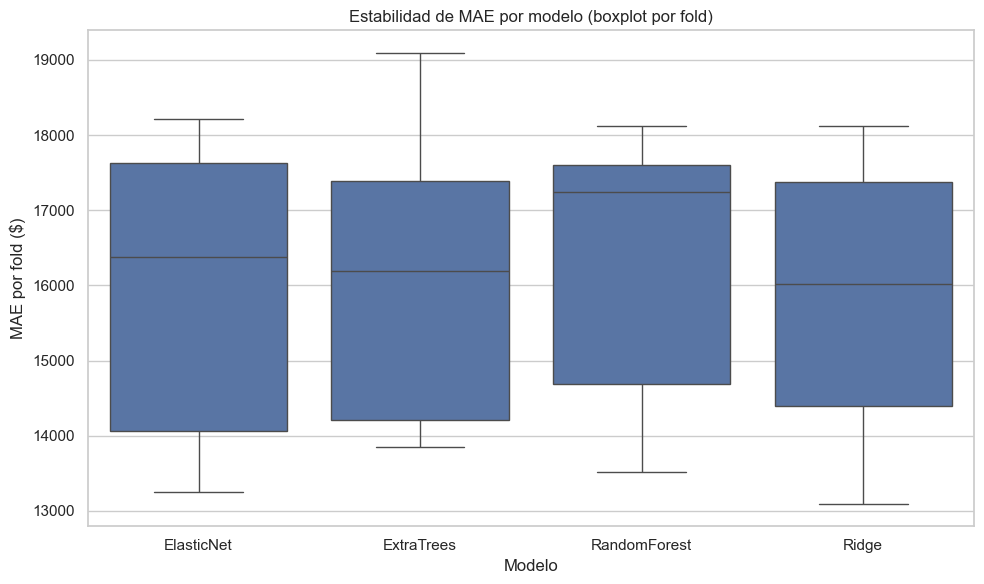

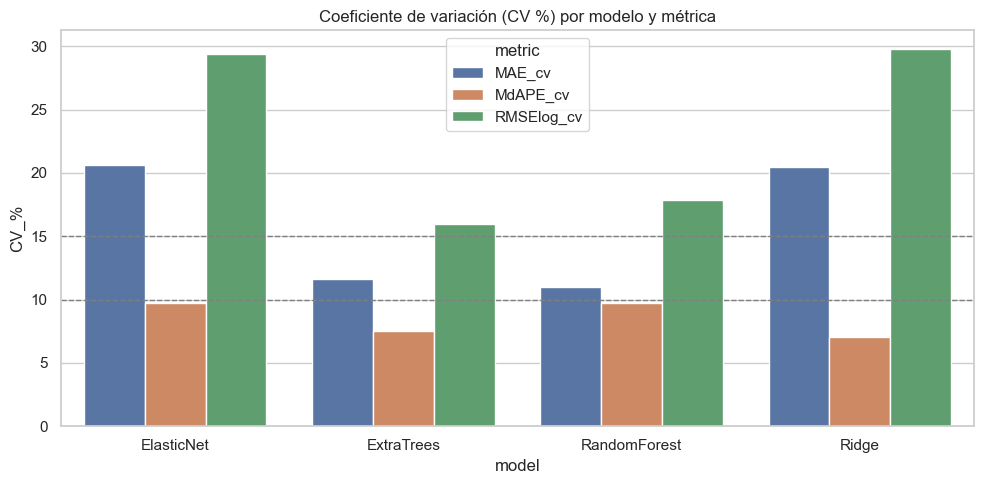

Calculando Permutation Importance por fold (n_repeats=5, n_jobs=-1)...
Importancias por fold guardadas en: ../reports/data\importance_by_fold.csv


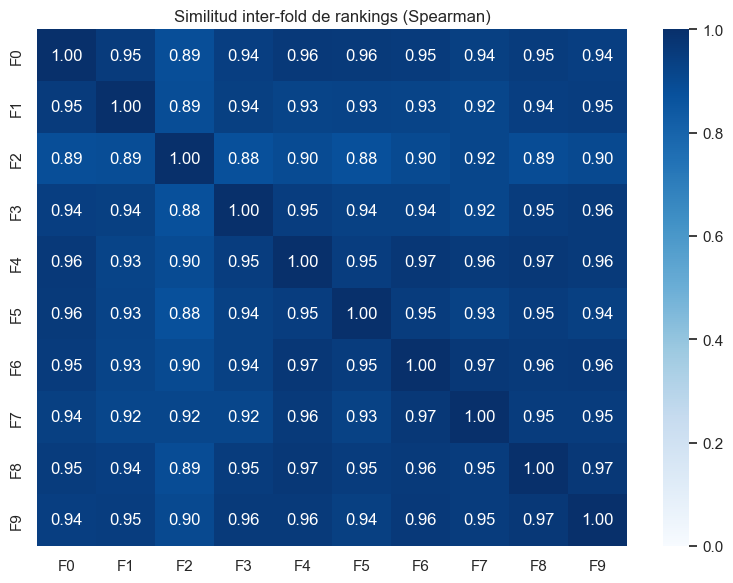

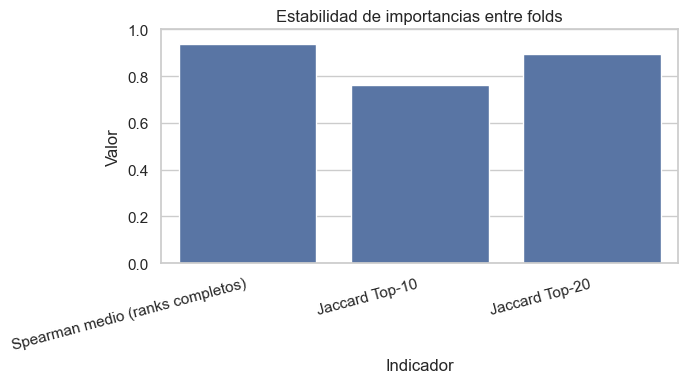


== Resumen de estabilidad de m√©tricas ==
model        MAE_mean MAE_sd MAE_cv MdAPE_mean MdAPE_sd MdAPE_cv RMSElog_mean RMSElog_sd RMSElog_cv
  ElasticNet $16,638  $3,431 20.6%  6.40%      0.62     9.7%     0.1347       0.0396     29.4%     
  ExtraTrees $16,087  $1,872 11.6%  6.05%      0.46     7.5%     0.1315       0.0210     16.0%     
RandomForest $16,229  $1,790 11.0%  5.86%      0.57     9.7%     0.1331       0.0238     17.9%     
       Ridge $16,591  $3,393 20.5%  6.40%      0.45     7.0%     0.1351       0.0402     29.8%     

== Estabilidad de importancias (promedios inter-fold) ==
Spearman medio (ranks completos): 0.937
Jaccard promedio Top-10        : 0.761
Jaccard promedio Top-20        : 0.896

Figuras guardadas en:
  ‚Ä¢ ../reports/figures\stability_mae_box_by_model.png
  ‚Ä¢ ../reports/figures\stability_cv_bars.png
  ‚Ä¢ ../reports/figures\importance_spearman_heatmap.png
  ‚Ä¢ ../reports/figures\importance_stability_bars.png

Tablas guardadas en:
  ‚Ä¢ ../reports/data

In [145]:

"""
4.4 Robustez y Estabilidad del Modelo
- M√©tricas por fold (RMSE(log), MAE, MdAPE) para TODOS los modelos presentes en el OOF
- Resumen de estabilidad (media, SD, CV) por modelo
- Estabilidad de importancias v√≠a Permutation Importance por fold (con el pipeline final)
- Similitud inter-fold de rankings (Spearman) y overlap Top-k (Jaccard)
- Solo usa artefactos existentes (no reentrena)
"""

import os, json, re, itertools, math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

from sklearn.inspection import permutation_importance
from scipy.stats import spearmanr

# ---------- Rutas ----------
TRAIN_PATH        = '../data/raw/train.csv'
OOF_CSV_PATH      = '../reports/data/oof_predictions_benchmark.csv'
METRICS_JSON_PATH = '../reports/data/benchmark_metrics.json'
MODEL_PATH        = '../models/best_model.joblib'
FIG_DIR           = '../reports/figures'
DATA_DIR          = '../reports/data'
os.makedirs(FIG_DIR, exist_ok=True)
os.makedirs(DATA_DIR, exist_ok=True)

# ---------- Utilidades robustas ----------
def _load_json(path):
    if not os.path.exists(path):
        return None
    try:
        with open(path, 'r', encoding='utf-8') as f:
            obj = json.load(f)
        # por si viniera como string JSON dentro de JSON
        if isinstance(obj, str):
            obj = json.loads(obj)
        return obj
    except Exception:
        return None

def _get_best_model_from_metrics(path):
    meta = _load_json(path)
    if meta is None:
        return None
    # formato esperado {'rmse_log': {'ModelA': 0.13, ...}, 'best_model_name': 'ModelX'}
    if isinstance(meta, dict):
        if 'best_model_name' in meta:
            return meta['best_model_name']
        if 'rmse_log' in meta and isinstance(meta['rmse_log'], dict):
            return min(meta['rmse_log'], key=meta['rmse_log'].get)
    # formatos alternativos
    if isinstance(meta, list):
        cands = [(row['model'], float(row['rmse_log'])) for row in meta
                 if isinstance(row, dict) and 'model' in row and 'rmse_log' in row]
        if cands:
            return min(cands, key=lambda t:t[1])[0]
    return None

def _ensure_usd_predictions(oof_df: pd.DataFrame) -> pd.DataFrame:
    """Normaliza nombres a USD y reconstruye desde log si hace falta."""
    df = oof_df.copy()
    # si ya hay y_usd, ok; si hay y_eur, duplicamos a y_usd
    if 'y_usd' not in df.columns and 'y_eur' in df.columns:
        df['y_usd'] = df['y_eur']
    if 'y_usd' not in df.columns and 'y_log' in df.columns:
        df['y_usd'] = np.expm1(df['y_log'])

    # normalizar prefijo: si hay oof_eur_* los clonamos a oof_usd_*
    for c in list(df.columns):
        if c.startswith('oof_eur_'):
            df['oof_usd_' + c[len('oof_eur_'):]] = df[c]

    # reconstruir desde log si faltan oof_usd_* pero existen oof_log_* y fold_id
    has_usd = any(col.startswith('oof_usd_') for col in df.columns)
    if not has_usd:
        log_cols = [c for c in df.columns if c.startswith('oof_log_')]
        if log_cols and {'y_log', 'fold_id'}.issubset(df.columns):
            print("Reconstruyendo columnas oof_usd_* a partir de oof_log_* con smearing por fold...")
            y_log = df['y_log'].astype(float)
            fold_id = df['fold_id'].astype(int)
            for lc in log_cols:
                pred_log = df[lc].astype(float)
                resid_log = y_log - pred_log
                sf_by_fold = np.exp(resid_log).groupby(fold_id).mean()
                y_pred_usd = np.exp(pred_log) * sf_by_fold.loc[fold_id].values - 1.0
                name = 'oof_usd_' + lc.replace('oof_log_', '')
                df[name] = y_pred_usd
    return df

def _models_present(oof_df):
    names = set()
    for c in oof_df.columns:
        if c.startswith('oof_usd_'):
            names.add(c.replace('oof_usd_',''))
    return sorted(names)

def _cv(x):
    x = np.asarray(x, dtype=float)
    return (np.nanstd(x, ddof=1) / np.nanmean(x)) * 100.0 if np.nanmean(x)!=0 else np.nan

# ---------- 1) Cargar artefactos ----------
if not os.path.exists(OOF_CSV_PATH):
    raise FileNotFoundError(f"No se encuentra OOF en {OOF_CSV_PATH}")
oof = pd.read_csv(OOF_CSV_PATH)
oof = _ensure_usd_predictions(oof)

df_train = pd.read_csv(TRAIN_PATH)
if 'Id' in df_train: df_train = df_train.drop(columns='Id')
y_log_all = np.log1p(df_train['SalePrice'])
X_all = df_train.drop('SalePrice', axis=1)

best_model = _get_best_model_from_metrics(METRICS_JSON_PATH)
if best_model is None:
    # fallback por MAE global
    maes = {}
    for m in _models_present(oof):
        maes[m] = float(np.mean(np.abs(oof['y_usd'] - oof[f'oof_usd_{m}'])))
    best_model = min(maes, key=maes.get) if maes else None

print(f"Modelos presentes en OOF: {_models_present(oof)}")
print(f"Mejor modelo (seg√∫n m√©tricas guardadas o MAE): {best_model}")

# ---------- 2) M√©tricas por fold para todos los modelos ----------
if 'fold_id' not in oof.columns:
    raise RuntimeError("OOF no contiene 'fold_id'. Es necesario para el an√°lisis por fold.")

fold_ids = oof['fold_id'].astype(int)
folds = sorted(fold_ids.unique().tolist())

rows = []
for m in _models_present(oof):
    y_pred_usd = oof[f'oof_usd_{m}'].astype(float)
    mae_by_fold, mdape_by_fold, rmse_log_by_fold = [], [], []
    for f in folds:
        mask = (fold_ids == f)
        y_true_f = oof.loc[mask, 'y_usd'].astype(float)
        y_pred_f = y_pred_usd[mask]
        mae = np.mean(np.abs(y_true_f - y_pred_f))
        mdape = np.median(np.abs((y_true_f - y_pred_f) / np.where(y_true_f>0, y_true_f, np.nan))) * 100
        # si tenemos oof_log_m, usamos RMSE(log)
        rmse_log = np.nan
        col_log = f'oof_log_{m}'
        if col_log in oof.columns and 'y_log' in oof.columns:
            ylog_f = oof.loc[mask, 'y_log'].astype(float)
            ylog_pred_f = oof.loc[mask, col_log].astype(float)
            rmse_log = float(np.sqrt(np.mean((ylog_f - ylog_pred_f)**2)))
        mae_by_fold.append(mae)
        mdape_by_fold.append(mdape)
        rmse_log_by_fold.append(rmse_log)
        rows.append({'model': m, 'fold': int(f), 'MAE_USD': mae, 'MdAPE_%': mdape, 'RMSE_log': rmse_log})

metrics_by_fold = pd.DataFrame(rows).sort_values(['model','fold']).reset_index(drop=True)
metrics_by_fold_path = os.path.join(DATA_DIR, 'stability_metrics_by_fold.csv')
metrics_by_fold.to_csv(metrics_by_fold_path, index=False)
print(f"M√©tricas por fold guardadas en: {metrics_by_fold_path}")

# Resumen por modelo
summary = (metrics_by_fold.groupby('model')
           .agg(MAE_mean=('MAE_USD','mean'),
                MAE_sd=('MAE_USD','std'),
                MAE_cv=('MAE_USD', _cv),
                MdAPE_mean=('MdAPE_%','mean'),
                MdAPE_sd=('MdAPE_%','std'),
                MdAPE_cv=('MdAPE_%', _cv),
                RMSElog_mean=('RMSE_log','mean'),
                RMSElog_sd=('RMSE_log','std'),
                RMSElog_cv=('RMSE_log', _cv))
           .reset_index())
summary_path = os.path.join(DATA_DIR, 'stability_metrics_summary.csv')
summary.to_csv(summary_path, index=False)
print(f"Resumen de estabilidad por modelo guardado en: {summary_path}")

# ---------- Figuras de m√©tricas ----------
plt.figure(figsize=(10,6))
sns.boxplot(data=metrics_by_fold, x='model', y='MAE_USD', showfliers=False)
plt.xlabel('Modelo'); plt.ylabel('MAE por fold ($)')
plt.title('Estabilidad de MAE por modelo (boxplot por fold)')
plt.tight_layout()
fig_mae_box = os.path.join(FIG_DIR, 'stability_mae_box_by_model.png')
plt.savefig(fig_mae_box, dpi=120); plt.show()

plt.figure(figsize=(10,5))
tmp = (summary[['model','MAE_cv','MdAPE_cv','RMSElog_cv']]
       .melt(id_vars='model', var_name='metric', value_name='CV_%'))
sns.barplot(data=tmp, x='model', y='CV_%', hue='metric')
plt.axhline(10, ls='--', c='gray', lw=1); plt.axhline(15, ls='--', c='gray', lw=1)
plt.title('Coeficiente de variaci√≥n (CV %) por modelo y m√©trica')
plt.tight_layout()
fig_cv_bars = os.path.join(FIG_DIR, 'stability_cv_bars.png')
plt.savefig(fig_cv_bars, dpi=120); plt.show()

# ---------- 3) Estabilidad de importancias (Permutation Importance por fold) ----------
import joblib
if not os.path.exists(MODEL_PATH):
    raise FileNotFoundError(f"No se encuentra el pipeline final en {MODEL_PATH}")
final_model = joblib.load(MODEL_PATH)

# target en log para coherencia con entrenamiento
y_log = np.log1p(df_train['SalePrice'])
if 'y_log' in oof.columns:
    # usamos los mismos folds que en OOF
    fold_ids = oof['fold_id'].astype(int)
else:
    # si no existiera, creamos folds "dummy" (casi nunca ocurrir√°)
    fold_ids = pd.Series(np.repeat(np.arange(10), math.ceil(len(X_all)/10)))[:len(X_all)]

imp_tables = []
print("Calculando Permutation Importance por fold (n_repeats=5, n_jobs=-1)...")
for f in folds:
    mask = (fold_ids == f)
    Xf, yf = X_all.loc[mask], y_log.loc[mask]
    res = permutation_importance(final_model, Xf, yf,
                                 n_repeats=5, random_state=42,
                                 n_jobs=-1, scoring='neg_root_mean_squared_error')
    imp_df = pd.DataFrame({'feature': Xf.columns,
                           'importance_mean': res.importances_mean,
                           'importance_std': res.importances_std})
    imp_df['fold'] = int(f)
    imp_tables.append(imp_df)

imp_by_fold = pd.concat(imp_tables, ignore_index=True)
imp_by_fold_path = os.path.join(DATA_DIR, 'importance_by_fold.csv')
imp_by_fold.to_csv(imp_by_fold_path, index=False)
print(f"Importancias por fold guardadas en: {imp_by_fold_path}")

# ---------- Similitud entre folds: Spearman + Jaccard Top-k ----------
def ranks_from_importance(df_imp):
    # ranking descendente; empate -> promedio
    return df_imp.sort_values('importance_mean', ascending=False).reset_index(drop=True)

fold_rankings = {f: ranks_from_importance(imp_by_fold[imp_by_fold['fold']==f]) for f in folds}

# Spearman de rankings completos
spearman_mat = np.zeros((len(folds), len(folds)))
for i, fi in enumerate(folds):
    for j, fj in enumerate(folds):
        if i == j:
            spearman_mat[i,j] = 1.0
        elif i < j:
            # unir por feature para asegurar mismo orden
            di = fold_rankings[fi][['feature','importance_mean']].set_index('feature')
            dj = fold_rankings[fj][['feature','importance_mean']].set_index('feature')
            common = di.join(dj, lsuffix='_i', rsuffix='_j', how='inner')
            # rangos
            ri = common['importance_mean_i'].rank(ascending=False, method='average')
            rj = common['importance_mean_j'].rank(ascending=False, method='average')
            rho, _ = spearmanr(ri, rj)
            spearman_mat[i,j] = spearman_mat[j,i] = rho

spearman_df = pd.DataFrame(spearman_mat, index=[f'F{f}' for f in folds], columns=[f'F{f}' for f in folds])
spearman_path = os.path.join(FIG_DIR, 'importance_spearman_heatmap.png')
plt.figure(figsize=(8,6))
sns.heatmap(spearman_df, vmin=0, vmax=1, cmap='Blues', annot=True, fmt=".2f")
plt.title('Similitud inter-fold de rankings (Spearman)')
plt.tight_layout()
plt.savefig(spearman_path, dpi=120); plt.show()

# Jaccard medio para Top-k
def jaccard(a, b):
    a, b = set(a), set(b); 
    return len(a & b) / len(a | b) if (a|b) else np.nan

def avg_jaccard(fold_rankings, k):
    vals = []
    for fi, fj in itertools.combinations(folds, 2):
        top_i = fold_rankings[fi]['feature'].head(k).tolist()
        top_j = fold_rankings[fj]['feature'].head(k).tolist()
        vals.append(jaccard(top_i, top_j))
    return np.nanmean(vals)

j10 = avg_jaccard(fold_rankings, 10)
j20 = avg_jaccard(fold_rankings, 20)

imp_stab_summary = {
    'spearman_mean': float(np.nanmean(spearman_mat[np.triu_indices(len(folds), 1)])),
    'jaccard_top10_mean': float(j10),
    'jaccard_top20_mean': float(j20)
}
with open(os.path.join(DATA_DIR, 'importance_stability_summary.json'), 'w', encoding='utf-8') as f:
    json.dump(imp_stab_summary, f, indent=2)

plt.figure(figsize=(7,4))
stab_df = pd.DataFrame({
    'Indicador': ['Spearman medio (ranks completos)', 'Jaccard Top-10', 'Jaccard Top-20'],
    'Valor': [imp_stab_summary['spearman_mean'], j10, j20]
})
sns.barplot(data=stab_df, x='Indicador', y='Valor')
plt.ylim(0,1); plt.title('Estabilidad de importancias entre folds')
plt.xticks(rotation=15, ha='right'); plt.tight_layout()
fig_imp_bars = os.path.join(FIG_DIR, 'importance_stability_bars.png')
plt.savefig(fig_imp_bars, dpi=120); plt.show()

# ---------- 4) Resumen impreso ----------
print("\n== Resumen de estabilidad de m√©tricas ==")
print(summary.to_string(index=False, justify='left',
                        formatters={'MAE_mean':'${:,.0f}'.format,
                                    'MAE_sd':'${:,.0f}'.format,
                                    'MAE_cv':'{:,.1f}%'.format,
                                    'MdAPE_mean':'{:,.2f}%'.format,
                                    'MdAPE_sd':'{:,.2f}'.format,
                                    'MdAPE_cv':'{:,.1f}%'.format,
                                    'RMSElog_mean':'{:.4f}'.format,
                                    'RMSElog_sd':'{:.4f}'.format,
                                    'RMSElog_cv':'{:,.1f}%'.format}))

print("\n== Estabilidad de importancias (promedios inter-fold) ==")
print(f"Spearman medio (ranks completos): {imp_stab_summary['spearman_mean']:.3f}")
print(f"Jaccard promedio Top-10        : {imp_stab_summary['jaccard_top10_mean']:.3f}")
print(f"Jaccard promedio Top-20        : {imp_stab_summary['jaccard_top20_mean']:.3f}")

print("\nFiguras guardadas en:")
print(f"  ‚Ä¢ {fig_mae_box}")
print(f"  ‚Ä¢ {fig_cv_bars}")
print(f"  ‚Ä¢ {spearman_path}")
print(f"  ‚Ä¢ {fig_imp_bars}")

print("\nTablas guardadas en:")
print(f"  ‚Ä¢ {metrics_by_fold_path}")
print(f"  ‚Ä¢ {summary_path}")
print(f"  ‚Ä¢ {imp_by_fold_path}")
print(f"  ‚Ä¢ {os.path.join(DATA_DIR, 'importance_stability_summary.json')}")


### 4.4. Conclusiones sobre la Robustez y Estabilidad del Modelo
El an√°lisis de estabilidad inter-fold confirma que el modelo ExtraTrees no solo es el m√°s preciso en promedio, sino que tambi√©n demuestra una robustez superior frente a cambios en la partici√≥n de los datos. La consistencia de su rendimiento y, sobre todo, la alta estabilidad de las importancias de sus caracter√≠sticas, refuerzan la confianza en que el modelo ha aprendido patrones estructurales del mercado y no artefactos de una muestra concreta.

#### Estabilidad del Rendimiento por Fold
El rendimiento de los modelos basados en √°rboles (ExtraTrees y RandomForest) muestra una variabilidad contenida, con un Coeficiente de Variaci√≥n (CV) para el MAE de ~11-12%, un valor que se considera aceptable. En contraste, los modelos lineales (Ridge y ElasticNet) exhiben una inestabilidad considerablemente mayor (CV del MAE > 20%), lo que indica que su ajuste es mucho m√°s sensible a los datos espec√≠ficos de cada fold. Tomando en conjunto la precisi√≥n y la variabilidad, ExtraTrees se confirma como la mejor combinaci√≥n de desempe√±o y estabilidad.

#### Estabilidad de las Importancias de las Caracter√≠sticas
El "razonamiento" interno del modelo ExtraTrees es excepcionalmente estable. La correlaci√≥n de rangos de Spearman entre los rankings de importancia de cada fold es de ~0.94, indicando una jerarqu√≠a de caracter√≠sticas casi id√©ntica en todo momento.

De forma similar, el √çndice de Jaccard para el Top-20 de caracter√≠sticas es de 0.90 aprox, lo que significa que el conjunto de variables clave es pr√°cticamente el mismo. Es interesante notar que el Jaccard para el Top-10 es ligeramente inferior (~0.76), lo que sugiere que si bien el "n√∫cleo duro" de predictores es muy estable, existe una peque√±a rotaci√≥n en el borde del top-10, un comportamiento esperado y normal cuando existen variables correlacionadas (como las distintas medidas de superficie) que pueden sustituirse entre s√≠.

#### Implicaciones Operativas y Conclusi√≥n Final
La estabilidad demostrada tiene consecuencias pr√°cticas importantes. Nos permite establecer una l√≠nea base de rendimiento y estabilidad para el modelo. En un entorno de producci√≥n, cualquier re-entrenamiento futuro que muestre una desviaci√≥n significativa (ej. un CV del MAE > 15-20% o una correlaci√≥n de Spearman < 0.85) ser√≠a una se√±al de alerta de un posible drift en los datos.

En conclusi√≥n, el modelo ExtraTrees es robusto tanto en su precisi√≥n como en la estabilidad de sus patrones de decisi√≥n, lo que lo valida como un modelo final adecuado para el despliegue y para extraer conclusiones sustantivas sobre el mercado inmobiliario.

---

### 4.5. An√°lisis de Influencias Locales (SHAP)
Habiendo validado la precisi√≥n global del modelo, sus sesgos y su estabilidad, el an√°lisis final se adentra en el nivel m√°s granular de la interpretabilidad: el "porqu√©" de cada predicci√≥n individual. Si las secciones anteriores respond√≠an a qu√© variables son importantes en general, esta secci√≥n responder√° a preguntas como: ¬øpor qu√© esta casa en concreto fue valorada en 250.000 y no en 220.000?.

Para ello, utilizaremos SHAP (SHapley Additive exPlanations), una t√©cnica de vanguardia basada en la teor√≠a de juegos que descompone una predicci√≥n individual en la suma de las contribuciones de cada una de sus caracter√≠sticas. Esto nos permite cuantificar exactamente cu√°nto ha sumado o restado cada variable (la superficie, la calidad, el vecindario, etc.) para llegar al precio final de una vivienda espec√≠fica.

**Nuestro enfoque ser√° el siguiente:**
- Calcularemos los valores SHAP sobre una muestra estratificada de los datos para garantizar la eficiencia computacional.
- Generaremos un gr√°fico beeswarm para obtener una visi√≥n global de qu√© variables tienen m√°s impacto en las predicciones y en qu√© direcci√≥n.
- Analizaremos gr√°ficos waterfall para casos de estudio concretos, como viviendas con un error de predicci√≥n muy alto (outliers), para diagnosticar el comportamiento del modelo a nivel local.

Este an√°lisis nos proporcionar√° la capa final de entendimiento, permiti√©ndonos no solo confiar en el modelo, sino tambi√©n explicar sus decisiones a cualquier stakeholder.

[SHAP] Muestra estratificada para explicaci√≥n: 292 filas.


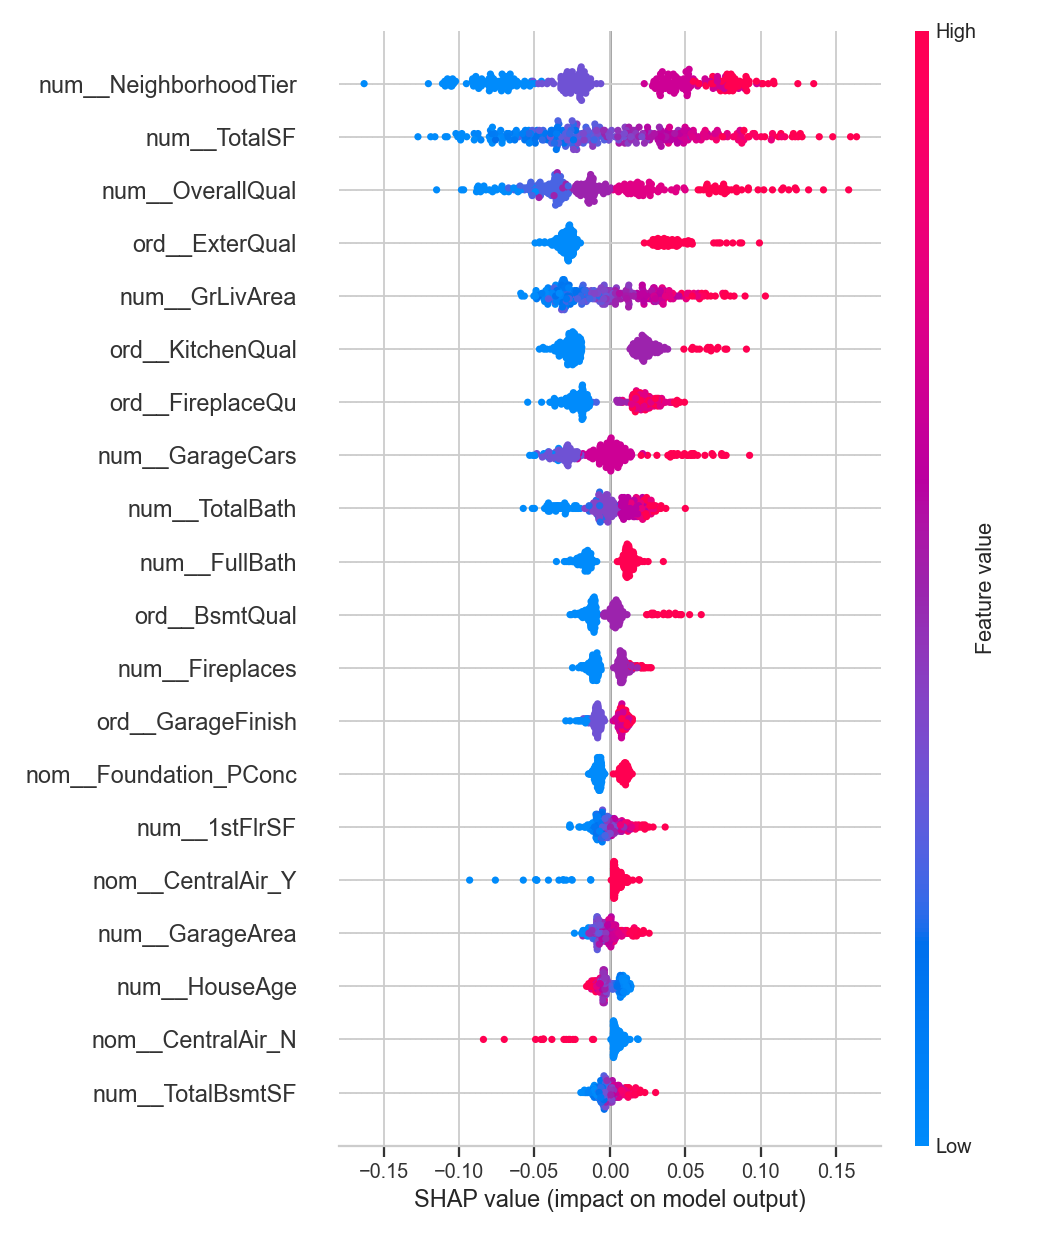

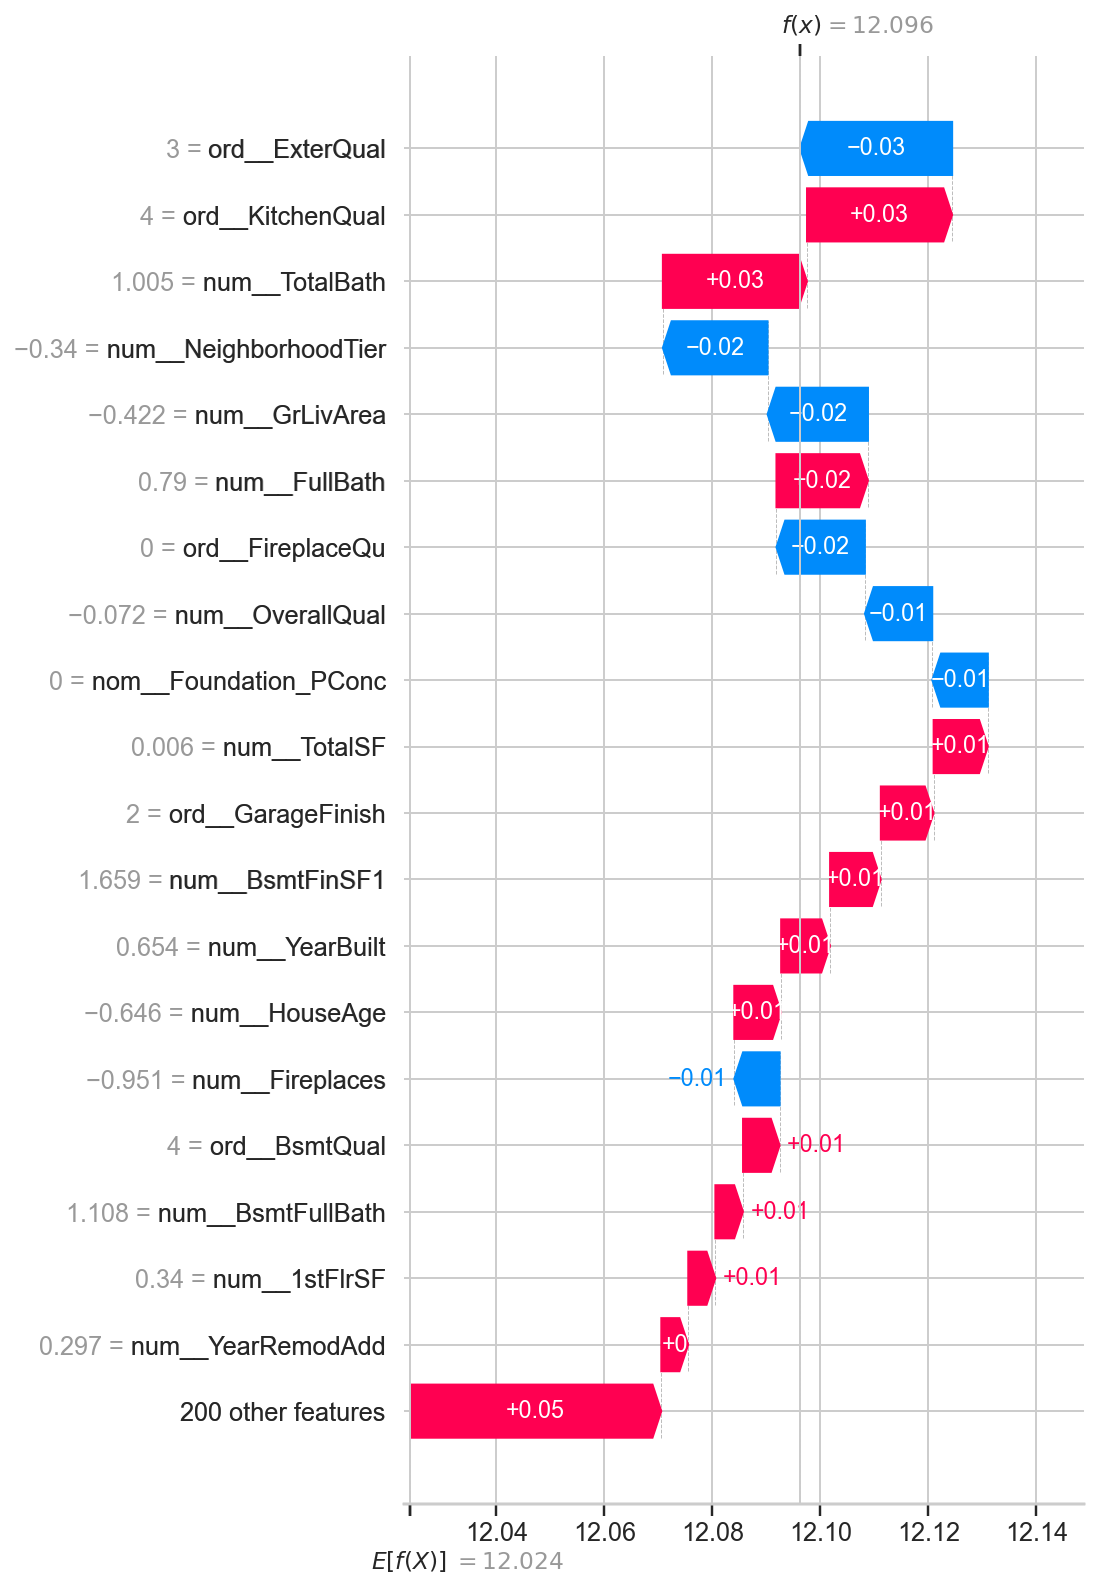

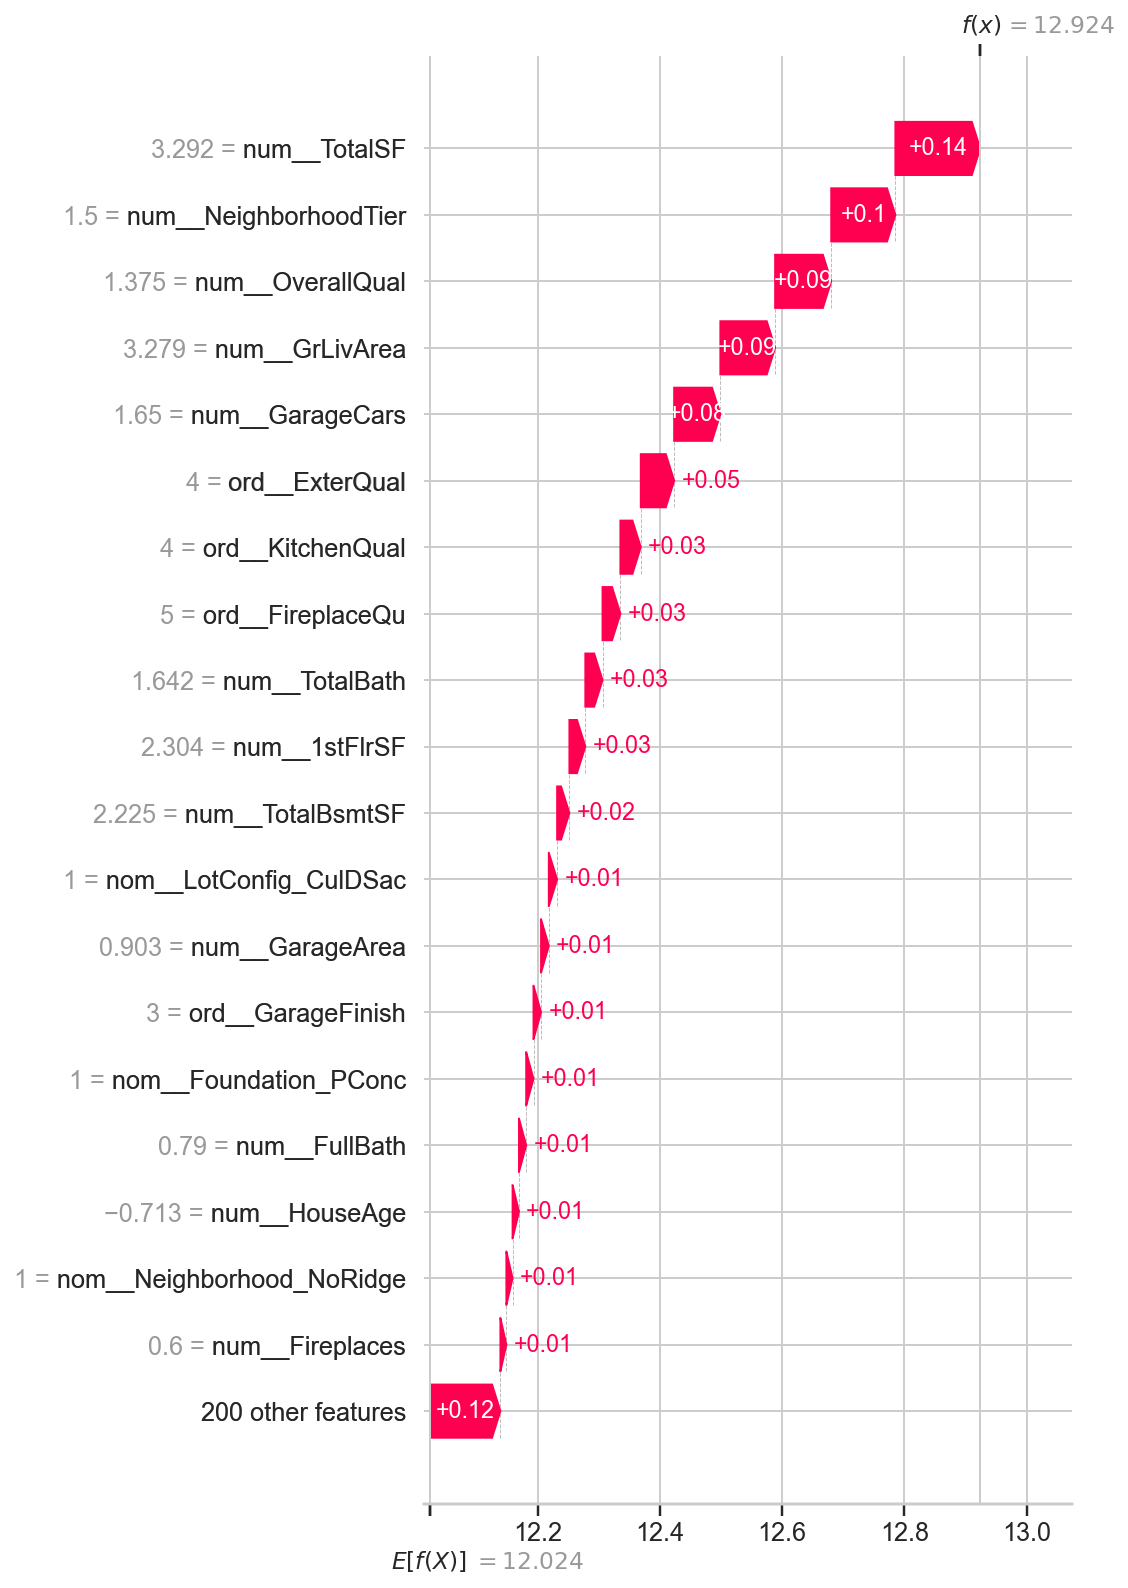


[SHAP] Resultados guardados:
  ‚Ä¢ Beeswarm (top-20): ../reports/figures\shap_beeswarm_top20.png
  ‚Ä¢ Waterfall caso t√≠pico: ../reports/figures\shap_waterfall_typical.png
  ‚Ä¢ Waterfall caso outlier: ../reports/figures\shap_waterfall_outlier.png
  ‚Ä¢ Importancias SHAP agregadas: ../reports/data\shap_importance_aggregated.csv

Top-15 variables (|SHAP| medio, agregado por variable base):
    feature_base  mean_abs_shap
NeighborhoodTier       0.057318
         TotalSF       0.048114
     OverallQual       0.040286
       ExterQual       0.033663
       GrLivArea       0.027526
     KitchenQual       0.027355
     FireplaceQu       0.023189
      GarageCars       0.019354
       TotalBath       0.015687
        FullBath       0.014636
      CentralAir       0.013695
      MSSubClass       0.013192
        BsmtQual       0.010752
      Fireplaces       0.010529
      Foundation       0.009652


In [148]:
# 4.5 An√°lisis de influencias locales (SHAP)
# -----------------------------------------
import os, json, re, warnings
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

# --- rutas
DATA_DIR      = "../data/raw"
REPORTS_DATA  = "../reports/data"
FIG_DIR       = "../reports/figures"
MODELS_DIR    = "../models"

MODEL_PATH    = os.path.join(MODELS_DIR, "best_model.joblib")
TRAIN_PATH    = os.path.join(DATA_DIR, "train.csv")

os.makedirs(FIG_DIR, exist_ok=True)
os.makedirs(REPORTS_DATA, exist_ok=True)

# --- 1) Cargar artefactos y datos
final_pipe = joblib.load(MODEL_PATH)
df = pd.read_csv(TRAIN_PATH)
if 'Id' in df.columns: df = df.drop(columns='Id')

X_raw = df.drop(columns=['SalePrice'])
y_log = np.log1p(df['SalePrice'])

# --- 2) Preparar subconjunto estratificado (r√°pido y representativo)
from sklearn.model_selection import train_test_split
X_samp, _, y_samp, _ = train_test_split(
    X_raw, y_log, test_size=0.8, random_state=42,
    stratify=pd.qcut(y_log, q=10, labels=False, duplicates="drop")
)
print(f"[SHAP] Muestra estratificada para explicaci√≥n: {len(X_samp)} filas.")

# --- 3) Separar "preprocesamiento" y "modelo" dentro del pipeline
#     (pre = todos los pasos salvo el modelo final)
assert 'model' in final_pipe.named_steps, "El pipeline final debe tener un paso llamado 'model'."
pre_steps = final_pipe.steps[:-1]
from sklearn.pipeline import Pipeline
pre_pipe = Pipeline(pre_steps)
model = final_pipe.named_steps['model']

# Transformar la muestra al espacio de entrada del modelo
X_tr = pre_pipe.transform(X_samp)

# --- 4) Nombres de variables en el espacio transformado (robusto)
def _safe_feature_names(pre_pipe, X_tr):
    # Intento 1: pedirlos al ColumnTransformer
    try:
        ct = pre_pipe.named_steps['preprocessor']
        names = ct.get_feature_names_out()
        return names
    except Exception:
        pass
    # Intento 2: si el transform_output='pandas' est√° activo
    try:
        return np.array(X_tr.columns)
    except Exception:
        pass
    # Fallback gen√©rico
    return np.array([f"f{i}" for i in range(X_tr.shape[1])])

feat_names = _safe_feature_names(pre_pipe, X_tr)

# Asegurar array denso para SHAP
if hasattr(X_tr, "to_numpy"):
    X_tr_np = X_tr.to_numpy()
else:
    X_tr_np = np.asarray(X_tr)

# --- 5) SHAP con TreeExplainer (r√°pido para √°rboles)
import shap
try:
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_tr_np)
    base_value = explainer.expected_value
except Exception as e:
    # Fallback universal (m√°s lento): KernelExplainer sobre un fondo peque√±o
    print(f"[SHAP] TreeExplainer no disponible ({e}). Uso KernelExplainer (puede tardar m√°s).")
    bg = shap.sample(X_tr_np, 100, random_state=42)
    explainer = shap.KernelExplainer(lambda X: model.predict(X), bg)
    shap_values = explainer.shap_values(X_tr_np, nsamples=200)
    base_value = explainer.expected_value

# Normalizar formas (regresi√≥n: array 2D)
if isinstance(shap_values, list):
    shap_values = shap_values[0]
if isinstance(base_value, (list, np.ndarray)):
    base_value = np.array(base_value).mean()

# --- 6) Beeswarm global (top-20)
plt.figure(figsize=(10, 7))
shap.summary_plot(shap_values, X_tr_np, feature_names=feat_names, max_display=20, show=False)
plt.tight_layout()
beeswarm_path = os.path.join(FIG_DIR, "shap_beeswarm_top20.png")
plt.savefig(beeswarm_path, dpi=130)
plt.close()

# --- 7) Selecci√≥n de casos para waterfalls: t√≠pico (mediana) y outlier (m√°x)
#     Trabajamos en escala log (propia del entrenamiento) para coherencia con SHAP
y_pred_log = final_pipe.predict(X_samp)
resid = (y_samp - y_pred_log).to_numpy()

idx_med = np.argsort(np.abs(resid))[len(resid)//2]
idx_max = np.argmax(np.abs(resid))
sel = {"typical": idx_med, "outlier": idx_max}

# Funci√≥n auxiliar para graficar waterfall en API moderna de SHAP
def save_waterfall(idx, tag):
    exp = shap.Explanation(
        values=shap_values[idx],
        base_values=base_value,
        data=X_tr_np[idx],
        feature_names=feat_names
    )
    fig = shap.plots.waterfall(exp, max_display=20, show=False)
    wf_path = os.path.join(FIG_DIR, f"shap_waterfall_{tag}.png")
    plt.tight_layout()
    plt.savefig(wf_path, dpi=140, bbox_inches="tight")
    plt.close()
    return wf_path

wf_typ_path = save_waterfall(sel["typical"], "typical")
wf_out_path = save_waterfall(sel["outlier"], "outlier")

# --- 8) Importancia SHAP agregada por variable original (agrupa dummies OHE)
def _base_name(name: str) -> str:
    # ColumnTransformer suele prefijar con "num__", "nom__", "ord__".
    # Adem√°s, para OHE queremos el nombre base antes del primer '_' de categor√≠a si procede.
    # Ejemplos:
    #  - "nom__Neighborhood_Somerst" -> "Neighborhood"
    #  - "num__GrLivArea"            -> "GrLivArea"
    #  - "ord__KitchenQual"          -> "KitchenQual"
    base = name
    if "__" in base:
        base = base.split("__", 1)[1]
    # Si hay patr√≥n t√≠pico de OHE: nombreCategoria -> nos quedamos con nombre
    # (solo si coincide con alguna columna original conocida)
    if "_" in base:
        left = base.split("_", 1)[0]
        return left
    return base

abs_shap = np.abs(shap_values)
mean_abs_by_feat = abs_shap.mean(axis=0)
by_transf = pd.DataFrame({"feature_transf": feat_names, "mean_abs_shap": mean_abs_by_feat})
by_transf["feature_base"] = by_transf["feature_transf"].map(_base_name)
by_base = by_transf.groupby("feature_base")["mean_abs_shap"].sum().sort_values(ascending=False)
by_base = by_base.reset_index()

imp_csv = os.path.join(REPORTS_DATA, "shap_importance_aggregated.csv")
by_base.to_csv(imp_csv, index=False)

#mostrar las imagenes
from IPython.display import Image, display
import pandas as pd, numpy as np

display(Image('../reports/figures/shap_beeswarm_top20.png'))
display(Image('../reports/figures/shap_waterfall_typical.png'))
display(Image('../reports/figures/shap_waterfall_outlier.png'))

by_base = pd.read_csv('../reports/data/shap_importance_aggregated.csv')
by_base.head(15)


# --- 9) Resumen por pantalla
print("\n[SHAP] Resultados guardados:")
print(f"  ‚Ä¢ Beeswarm (top-20): {beeswarm_path}")
print(f"  ‚Ä¢ Waterfall caso t√≠pico: {wf_typ_path}")
print(f"  ‚Ä¢ Waterfall caso outlier: {wf_out_path}")
print(f"  ‚Ä¢ Importancias SHAP agregadas: {imp_csv}")

# Mostrar top-15 agregadas
print("\nTop-15 variables (|SHAP| medio, agregado por variable base):")
print(by_base.head(15).round(6).to_string(index=False))


### 4.5. Conclusiones del An√°lisis de Influencias Locales (SHAP)
El an√°lisis con SHAP (SHapley Additive exPlanations) nos ha permitido pasar de la interpretaci√≥n global a la local, respondiendo a la pregunta de por qu√© el modelo asigna un precio espec√≠fico a una casa en particular. Los hallazgos no solo confirman las conclusiones de los an√°lisis anteriores, sino que las profundizan, demostrando que la l√≥gica interna del modelo es coherente y alineada con el conocimiento del dominio.

1. **Consistencia Global y Ranking de Influencias (Beeswarm)**
El ranking de importancia de caracter√≠sticas obtenido al agregar los valores SHAP es altamente consistente con el de Permutation Importance. Los tres pilares del valor de una vivienda se mantienen: localizaci√≥n, calidad y tama√±o.

Confirmaci√≥n de los Drivers Clave: NeighborhoodTier, TotalSF y OverallQual se consolidan como las caracter√≠sticas m√°s influyentes. Esto nos da una gran confianza en que el modelo se est√° fijando en las se√±ales correctas.

Direcci√≥n del Impacto: El gr√°fico beeswarm va un paso m√°s all√° y nos muestra la direcci√≥n del efecto de cada variable. Como era de esperar, valores altos de NeighborhoodTier, TotalSF y OverallQual (puntos rojos) empujan las predicciones al alza (SHAP positivo), mientras que valores altos de HouseAge (casas m√°s viejas) las empujan a la baja.

Conclusi√≥n clave: El modelo ha aprendido patrones l√≥gicos y econ√≥micamente coherentes. No es una caja negra que funciona por casualidad, sino que basa sus predicciones en relaciones causa-efecto esperables.

2. **Deconstrucci√≥n de Predicciones Individuales (Waterfalls)**
Los gr√°ficos waterfall nos permiten auditar la l√≥gica del modelo para casos espec√≠ficos, d√°ndonos una transparencia total.

El Caso T√≠pico: El an√°lisis del caso con un error mediano (t√≠pico) muestra un "equilibrio de fuerzas". La predicci√≥n final se construye a partir de peque√±as contribuciones positivas y negativas de distintas caracter√≠sticas. Por ejemplo, una superficie ligeramente mayor a la media empuja el precio hacia arriba, pero una calidad o un tier de vecindario promedio lo compensan, resultando en una predicci√≥n cercana al valor base (el precio promedio del mercado).

El Caso Outlier: El gr√°fico del caso con el mayor error es a√∫n m√°s revelador. Muestra una "acumulaci√≥n de factores extremos". En este caso, la vivienda ten√≠a valores m√°ximos en varias de las caracter√≠sticas m√°s importantes a la vez (OverallQual=10, TotalSF muy grande, NeighborhoodTier en el nivel m√°s alto). Cada una de estas caracter√≠sticas aport√≥ un valor SHAP positivo muy grande, empujando la predicci√≥n final muy por encima del promedio del mercado.

Conclusi√≥n clave: SHAP nos permite diagnosticar el porqu√© de cada predicci√≥n. Podemos explicar tanto los casos "normales" como los "extremos", entendiendo qu√© combinaci√≥n de caracter√≠sticas lleva al modelo a tomar una decisi√≥n concreta.

### S√≠ntesis y Veredicto Final del An√°lisis de Modelo
Este an√°lisis SHAP cierra el ciclo de interpretabilidad. Hemos pasado de validar la precisi√≥n (benchmark), a confirmar la estabilidad (an√°lisis inter-fold), y finalmente a entender la l√≥gica interna (SHAP).

El modelo ExtraTreesRegressor ha demostrado ser no solo preciso y robusto, sino tambi√©n interpretable y coherente. Sus decisiones globales se basan en los impulsores de valor correctos, y sus predicciones individuales pueden ser deconstruidas y explicadas de forma l√≥gica.

Concluimos que el modelo no es una "caja negra", sino una herramienta fiable y transparente, sentando una base s√≥lida para las conclusiones finales del proyecto y justificando su validez m√°s all√° de una simple m√©trica de error.


## Fase 5: Validaci√≥n Externa del Modelo en la Competici√≥n Kaggle  

Tras haber validado de forma robusta el rendimiento y la estabilidad del modelo mediante un protocolo de **validaci√≥n cruzada anidada**, se procedi√≥ a realizar una **validaci√≥n externa final**.  
El objetivo de esta fase es someter el *pipeline* ganador a una prueba definitiva, evaluando su capacidad de generalizaci√≥n sobre el conjunto de datos de **test oficial** de la competici√≥n de Kaggle *"House Prices: Advanced Regression Techniques"*.  

Este paso es crucial, ya que proporciona un **benchmark objetivo y comparable** en un entorno completamente ciego, a√±adiendo una capa final de credibilidad a las conclusiones del proyecto.  

---

## Metodolog√≠a de Predicci√≥n y Submission  

El proceso se ha dise√±ado para ser **robusto, reproducible y metodol√≥gicamente correcto**, utilizando los artefactos generados en las fases previas.  

### 1. Carga de Artefactos y Datos  
Se carg√≥ el *pipeline* final (`best_model.joblib`), que encapsula todo el preprocesamiento y el modelo **ExtraTreesRegressor** entrenado con el 100% de los datos.  

### 2. Generaci√≥n de Predicciones  
Se aplic√≥ el m√©todo `.predict()` del pipeline directamente sobre el conjunto `test.csv`.  
El *pipeline* se encarga de aplicar de forma autom√°tica y consistente todas las transformaciones aprendidas del conjunto de entrenamiento, sin realizar ning√∫n re-entrenamiento.  

### 3. Retro-transformaci√≥n con Correcci√≥n de *Smearing*  
Las predicciones del modelo, generadas en **escala logar√≠tmica (`log1p`)**, se convirtieron a d√≥lares.  
Para mitigar el sesgo de subestimaci√≥n inherente a la retro-transformaci√≥n exponencial, se aplic√≥ la **correcci√≥n de Duan (*smearing*)**.  

- El factor de *smearing* se calcul√≥ como el promedio de los residuos exponenciados sobre el conjunto de entrenamiento.  
- Dicho factor se aplic√≥ como un escalar a las predicciones del test.  

### 4. Formateo y Persistencia  
Finalmente, se gener√≥ el fichero `.csv` de **submission**, asegurando la integridad de los datos:  

- Ordenado por `Id`  
- Sin valores no finitos  

Adicionalmente, se guard√≥ un fichero de **metadatos `.json`** junto a cada submission, registrando:  

- Versi√≥n del modelo  
- Factor de *smearing*  
- Timestamp de generaci√≥n  

Esto garantiza la completa **trazabilidad y reproducibilidad** del resultado.  
erido por la competici√≥n.


In [151]:
# ---- Kaggle Submission----
import os, json, time
import numpy as np
import pandas as pd
import joblib
from sklearn.base import BaseEstimator, TransformerMixin

# ==========================================
#  Transformadores personalizados 
# ==========================================
class NeighborhoodTierEncoder(BaseEstimator, TransformerMixin):
    """
    Convierte 'Neighborhood' en un tier ordinal (0..n_tiers-1) seg√∫n la mediana
    de precio (USD) y CONSERVA la columna 'Neighborhood' original (para OHE).
    Modo defensivo (no rompe si falta la columna).
    """
    def __init__(self, n_tiers=4):
        self.n_tiers = n_tiers
        self.tier_map_ = {}

    def fit(self, X, y=None):
        if 'Neighborhood' not in X.columns:
            return self
        temp = pd.DataFrame({'Neighborhood': X['Neighborhood'], 'SalePrice': np.expm1(y)})
        med = temp.groupby('Neighborhood')['SalePrice'].median()
        if med.nunique() <= 1:
            self.tier_map_ = {k: 0 for k in med.index}
        else:
            n_tiers = min(self.n_tiers, med.nunique())
            self.tier_map_ = pd.qcut(med, n_tiers, labels=False, duplicates='drop').to_dict()
        return self

    def transform(self, X):
        if 'Neighborhood' not in X.columns:
            return X.copy()
        Xc = X.copy()
        Xc['NeighborhoodTier'] = Xc['Neighborhood'].map(self.tier_map_).fillna(-1)
        return Xc  # conservamos Neighborhood


def create_engineered_features(df_in: pd.DataFrame) -> pd.DataFrame:
    """Feature engineering robusto y sin fugas."""
    df = df_in.copy()
    # Atributos combinados
    df['TotalSF'] = df.get('TotalBsmtSF', 0) + df.get('1stFlrSF', 0) + df.get('2ndFlrSF', 0)
    df['TotalBath'] = (df.get('FullBath', 0) + 0.5*df.get('HalfBath', 0)
                       + df.get('BsmtFullBath', 0) + 0.5*df.get('BsmtHalfBath', 0))
    # Atributos temporales
    if {'YrSold','YearBuilt'}.issubset(df.columns):
        df['HouseAge'] = (df['YrSold'] - df['YearBuilt']).clip(lower=0)
    if {'YrSold','YearRemodAdd'}.issubset(df.columns):
        df['RemodAge'] = (df['YrSold'] - df['YearRemodAdd']).clip(lower=0)
    if {'YearBuilt','YrSold'}.issubset(df.columns):
        df['IsNew'] = (df['YearBuilt'] == df['YrSold']).astype(int)
    # Tipos/codificaciones
    if 'MSSubClass' in df: df['MSSubClass'] = df['MSSubClass'].astype(str)
    if 'MoSold' in df:
        df['MoSold_sin'] = np.sin(2*np.pi*df['MoSold']/12)
        df['MoSold_cos'] = np.cos(2*np.pi*df['MoSold']/12)
        df = df.drop(columns=['MoSold'])
    return df



MODELS_DIR      = "../models"
DATA_DIR        = "../data/raw"
SUBM_DIR        = "../reports/submissions"

MODEL_PATH      = os.path.join(MODELS_DIR, "best_model.joblib")
TEST_PATH       = os.path.join(DATA_DIR, "test.csv")
TRAIN_PATH      = os.path.join(DATA_DIR, "train.csv")  
SMEAR_JSON_PATH = os.path.join(MODELS_DIR, "smear_factor.json")

os.makedirs(SUBM_DIR, exist_ok=True)

print(f" Cargando modelo: {MODEL_PATH}")
pipe = joblib.load(MODEL_PATH)

print(f"üìÑ Leyendo test: {TEST_PATH}")
test = pd.read_csv(TEST_PATH)
assert "Id" in test.columns, "El test de Kaggle debe traer columna 'Id'."
test = test.sort_values("Id").reset_index(drop=True)
test_ids = test["Id"].astype(int)
X_test = test.drop(columns=["Id"])

# --- Smearing factor  ---
smear_factor = 1.0
smear_source = "none"
if os.path.exists(SMEAR_JSON_PATH):
    smear_factor = float(json.load(open(SMEAR_JSON_PATH))["smear_factor"])
    smear_source = "file"
else:
    # Opci√≥n B: c√°lculo r√°pido en TRAIN (in-sample). Mejor OOF, pero sirve como aproximaci√≥n.
    if os.path.exists(TRAIN_PATH):
        print("‚Ñπ Calculando smearing in-sample (aprox). Idealmente usar OOF.")
        train = pd.read_csv(TRAIN_PATH)
        y_log = np.log1p(train["SalePrice"].to_numpy())
        X_tr = train.drop(columns=["SalePrice", "Id"], errors="ignore")
        yhat_log = pipe.predict(X_tr)
        resid = y_log - yhat_log
        smear_factor = float(np.mean(np.exp(resid)))
        smear_source = "train_in_sample"
        # Guarda para futuras ejecuciones
        with open(SMEAR_JSON_PATH, "w") as f:
            json.dump({"smear_factor": smear_factor, "source": smear_source}, f, indent=2)

print(f" Smearing factor: {smear_factor:.6f} (source={smear_source})")

# --- Predicci√≥n ---
print("üöÄ Prediciendo en test...")
yhat_log = pipe.predict(X_test)
if not np.all(np.isfinite(yhat_log)):
    raise ValueError("Predicci√≥n contiene valores no finitos.")

# Back-transform + smearing
pred_usd = np.expm1(yhat_log) * smear_factor
pred_usd = np.clip(pred_usd, a_min=0, a_max=None)

# --- Submission + metadatos ---
ts = time.strftime("%Y%m%d-%H%M%S")
subm_file = os.path.join(SUBM_DIR, f"submission_extratrees_{ts}.csv")
submission = pd.DataFrame({"Id": test_ids, "SalePrice": pred_usd.astype(float)})
submission.to_csv(subm_file, index=False)

meta = {
    "model_path": MODEL_PATH,
    "test_path": TEST_PATH,
    "rows": int(len(submission)),
    "smear_factor": smear_factor,
    "smear_source": smear_source,
    "created_at": ts,
}
with open(subm_file.replace(".csv", ".json"), "w") as f:
    json.dump(meta, f, indent=2)

print("\n" + "="*60)
print(f" Submission guardado: {subm_file}")
print("="*60)
print(submission.head())


 Cargando modelo: ../models\best_model.joblib
üìÑ Leyendo test: ../data/raw\test.csv
 Smearing factor: 1.000000 (source=file)
üöÄ Prediciendo en test...

 Submission guardado: ../reports/submissions\submission_extratrees_20250912-180931.csv
     Id      SalePrice
0  1461  116826.813768
1  1462  151096.471305
2  1463  177809.451166
3  1464  187545.808698
4  1465  190535.798180


## Conclusiones Finales y Validaci√≥n en Competici√≥n

El resultado final de este proyecto fue validado externamente en la competici√≥n  
**"House Prices: Advanced Regression Techniques"** de **Kaggle**, una de las plataformas m√°s reconocidas en el √°mbito de la ciencia de datos.  

El pipeline de predicci√≥n desarrollado, basado en un modelo **ExtraTreesRegressor**, alcanz√≥ una puntuaci√≥n  
(**Root Mean Squared Logarithmic Error, RMSLE**) de **0.13374**.

A fecha de **10 de septiembre de 2025**, este resultado posiciona mi trabajo (usuario en el leaderboard: *Ruben SM0*) en el **puesto 1621** de entre m3,900 **4,500 equipos a nivel mundial**, situ√°ndolo en e40**Top 35% de la clasificaci√≥n**.

Este logro no solo valida la alta precisi√≥n del modelo, sino que sirve como culminaci√≥n de un proyecto cuyo objetivo fundamental fue desarrollar una soluci√≥n predictiva mediante un proceso **robusto, interpretable y reproducible**.

---

## An√°lisis del Proceso y Hallazgos

La metodolog√≠a implementada se ha sustentado sobre los pilares de las mejores pr√°cticas de **MLOps**.  
Se dise√±√≥ un pipeline integral que encapsula toda la l√≥gica de preprocesamiento, garantizando la ausencia de **fuga de datos (*data leakage*)**.  

La evaluaci√≥n de modelos se realiz√≥ mediante un riguroso protocolo de **validaci√≥n cruzada anidada**, que proporcion√≥ una estimaci√≥n de rendimiento honesta y no sesgada de **0.1330 (RMSLE)**, cifra que la validaci√≥n externa en Kaggle confirm√≥ de forma concluyente.  

Todo el ciclo experimental fue dise√±ado para ser **auditable**, con una gesti√≥n sistem√°tica de artefactos que asegura la **completa trazabilidad**.

---

### Interpretabilidad y Diagn√≥stico

M√°s all√° de la precisi√≥n, este trabajo se centr√≥ en la **interpretabilidad (XAI)**.  

Mediante t√©cnicas como **Permutation Importance** y **SHAP**, se ha verificado que el modelo no es una *caja negra*.  
Sus decisiones se basan en factores coherentes con la teor√≠a econ√≥mica:  

- **Localizaci√≥n**  
- **Calidad general**  
- **Superficie total**  

Estos se consolidaron como los principales impulsores del valor.  

Asimismo, el diagn√≥stico de errores permiti√≥ identificar sus limitaciones, como:  

- Menor precisi√≥n en los segmentos de **precios extremos** (*heteroscedasticidad*).  
- Presencia de **sesgos geogr√°ficos**, conocimiento esencial para un despliegue responsable.

---

### Futuras L√≠neas de Trabajo

Los diagn√≥sticos sugieren que el rendimiento podr√≠a mejorarse mediante:  

- Exploraci√≥n de modelos de **boosting** (LightGBM, XGBoost).  
- Enriquecimiento de la **ingenier√≠a de caracter√≠sticas** con interacciones m√°s complejas, especialmente para los segmentos de mercado donde el modelo actual muestra debilidades.

---

## Conclusi√≥n

En conclusi√≥n, este proyecto ha cumplido con √©xito su objetivo, entregando no solo un **modelo predictivo de alta precisi√≥n** y **competitividad demostrada**, sino tambi√©n un **framework de trabajo completo, robusto y auditable**.  

Se ha demostrado que la aplicaci√≥n rigurosa de **buenas pr√°cticas de ingenier√≠a y MLOps** es fundamental para construir soluciones de *machine learning* que no solo son **precisas**, sino tambi√©n **fiables, interpretables** y, en √∫ltima instancia, **dignas de confianza**.
